# Swarm analysis

In [277]:
import os
import numpy as np
from specvae.vae import BaseVAE
import specvae.dataset as dt
import specvae.utils as utils
import matplotlib.pyplot as plt
import seaborn as sns

In [278]:
# Parameters
dataset = "MoNA"
# model_name = "jointvae_20-800-200-50-3-50-200-800-20_01 (11-01-2022_23-10-10)"
# model_name = "betavae_capacity_20-800-200-50-3-50-200-800-20_01 (24-12-2021_01-50-12)"
# model_name = "betavae_capacity_100-400-100-3-400-100_01 (24-12-2021_11-06-17)"
# model_dir = "D:\\Workspace\\SpecVAE\\.model\\MoNA\\jointvae\\jointvae_20-800-200-50-3-50-200-800-20_01 (11-01-2022_23-10-10)"
# model_dir = "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\betavae_capacity_20-800-200-50-3-50-200-800-20_01 (24-12-2021_01-50-12)"
# model_dir = "d:\\Workspace\\SpecVAE\\.model\\HMDB\\betavae_capacity_nextron\\betavae_capacity_20-1600-2-1600-20_02 (24-12-2021_18-27-38)"
model_dirs = [
    # MoNA
    ## BetaVAE
    ### Best
    "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\best\\betavae_capacity_20-800-200-50-3-50-200-800-20_01 (24-12-2021_01-50-12)",
    "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\best\\betavae_capacity_20-400-100-3-400-20_02 (24-12-2021_03-34-34)",
    "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\best\\betavae_capacity_20-1600-3-1600-20_03 (24-12-2021_00-17-31)",
    "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\best\\betavae_capacity_20-800-3-800-20_04 (24-12-2021_00-25-10)",
    "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\best\\betavae_capacity_20-100-3-90-100-20_05 (24-12-2021_03-01-19)",
    "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\best\\betavae_capacity_50-400-3-100-400-50_06 (24-12-2021_06-19-49)",
    ### Beta
    "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\beta\\betavae_capacity_100-1600-200-50-3-50-200-1600-100_01 (24-12-2021_09-13-36)",
    "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\beta\\betavae_capacity_100-1600-200-50-3-50-200-1600-100_02 (24-12-2021_09-15-11)",
    "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\beta\\betavae_capacity_100-1600-200-50-3-50-200-1600-100_03 (24-12-2021_09-29-26)",
    "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\beta\\betavae_capacity_100-1600-200-50-3-50-200-1600-100_04 (24-12-2021_09-29-36)",
    "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\beta\\betavae_capacity_100-1600-200-50-3-50-200-1600-100_05 (24-12-2021_09-06-14)",
    "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\beta\\betavae_capacity_100-1600-200-50-3-50-200-1600-100_06 (24-12-2021_09-05-10)",
    ### BetaVAE Score
    "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\betavae_score\\betavae_capacity_100-400-100-3-400-100_01 (24-12-2021_11-06-17)",
    "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\betavae_score\\betavae_capacity_100-800-100-3-800-100_02 (24-12-2021_10-59-29)",
    "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\betavae_score\\betavae_capacity_100-400-200-50-3-50-200-400-100_03 (24-12-2021_09-47-19)",
    "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\betavae_score\\betavae_capacity_100-1600-3-1600-100_04 (24-12-2021_08-02-44)",
    "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\betavae_score\\betavae_capacity_100-400-100-3-400-100_05 (24-12-2021_10-57-01)",
    "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\betavae_score\\betavae_capacity_100-400-100-3-100-400-100_06 (24-12-2021_08-41-33)",
    ### FactorVAE Score
    "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\factorvae_score\\betavae_capacity_100-100-90-50-3-50-90-100-100_01 (24-12-2021_09-48-37)",
    "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\factorvae_score\\betavae_capacity_100-1600-100-3-1600-100_02 (24-12-2021_10-51-41)",
    "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\factorvae_score\\betavae_capacity_100-800-100-3-800-100_03 (24-12-2021_11-16-41)",
    "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\factorvae_score\\betavae_capacity_100-1600-3-1600-100_04 (24-12-2021_08-02-44)",
    "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\factorvae_score\\betavae_capacity_100-400-200-50-3-50-200-400-100_05 (24-12-2021_09-23-23)",
    "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\factorvae_score\\betavae_capacity_100-1600-100-3-100-1600-100_06 (24-12-2021_08-25-38)",
]


## Load model

In [279]:
device, cpu = utils.device(use_cuda=True)

GPU device count: 1
Device in use:  cuda:0


In [280]:
# print("Load model: %s..." % model_name)
def load_model(path, device):
    model_path = os.path.join(path, 'model.pth')
    model = BaseVAE.load(model_path, device)
    model.eval()
    return model

## Load and transform data

In [281]:
# labels = ['ionization_mode_id', 'collision_energy', 'total_exact_mass', 'precursor_mz', 'instrument_type_id', 'precursor_type_id', 'superclass_id', 'class_id']
if dataset == 'MoNA':
    labels = ['collision_energy', 'total_exact_mass']
    base_path = utils.get_project_path() / '.data' / 'MoNA'
    metadata_path = base_path / 'MoNA_meta.npy'
elif dataset == 'HMDB':
    labels = ['collision_energy']
    base_path = utils.get_project_path() / '.data' / 'HMDB'
    metadata_path = base_path / 'HMDB_meta.npy'

metadata = None
if os.path.exists(metadata_path):
    metadata = np.load(metadata_path, allow_pickle=True).item()

In [282]:
# metadata['precursor_type_id']

In [283]:
def load_data(target_column):
    # data_path = base_path / ('visualization_%s.csv' % target_column)
    data_path = base_path / ('%s_full.csv' % dataset)
    df = dt.Spectra.open(data_path)
    return df

def preload_data_as_tensor(df, input_columns, types, transform):
    # columns = model.config['input_columns']
    columns = input_columns
    # types = model.config['types']
    data = dt.Spectra.preload_tensor(
        device=device, data_frame=df[columns + ['id']], transform=transform, limit=-1, types=types, do_print=False)
    return data

def evaluate_model(model, df, data):
    print("Encode N=%d instances from %s dataset..." % (data['id'].shape[0], dataset))
    X, ids = data['spectrum'], data['id'] # TODO: handle the case for concatanated input
    Xrecon, z, latent_dist = model.forward_(X)
    print(z.shape)
    data_np = {}
    data_np['X'] = X.data.cpu().numpy()
    data_np['Xrecon'] = Xrecon.data.cpu().numpy()
    data_np['z'] = z.data.cpu().numpy()
    data_np['ids'] = ids
    data_np['ionization_mode_id'] = df['ionization_mode_id'].to_numpy()
    data_np['collision_energy'] = df['collision_energy'].to_numpy()
    # data_np['images'] = df['images'].to_numpy()
    return data_np


## Load training logs

In [284]:
# import json
# import pandas as pd
# import plotly.express as px

# n_dim = model.latent_dim
# with open(os.path.join(model_dir, 'history.json')) as history:
#     history_logs = json.load(history)

# steps = np.array(history_logs['kldiv_cont_0'])[:,0]
# colors = ['kldiv_cont_%d' % dim for dim in range(n_dim)]
# kldivs = dict(zip(colors, [np.array(history_logs['kldiv_cont_%d' % dim])[:,1] for dim in range(n_dim)]))
# kldivs['steps'] = steps
# df = pd.DataFrame(data=kldivs)
# fig = px.line(df, x='steps', y=colors, title='KL Divergence per each cont. dimension')
# fig.show()

In [285]:
df = load_data("")
df = df[
    (df['collision_energy'] == 35) & 
    (df['total_exact_mass'] <= 800) & 
    (df['instrument_type_id'] == metadata['instrument_type_id']['labels'].index('ESI-QFT')) &
    (df['ionization_mode_id'] == 1) & 
    (df['precursor_type_id'] == 2)
]
# df.groupby('precursor_mz')['precursor_mz'].value_counts()

-------------------------------------------
d:\Workspace\SpecVAE\.model\MoNA\betavae_capacity_nextron\best\betavae_capacity_20-800-200-50-3-50-200-800-20_01 (24-12-2021_01-50-12)
Encode N=2020 instances from MoNA dataset...
torch.Size([2020, 3])
collision_energy
r^2 -4.147547416621933e-09
RMSE 0.664303077446825
explained variance -1.0188360821672404e-08
Pearson nan
Spearman nan
-----------------
r^2 1.1425840718004565e-08
RMSE 0.7824517928029603
explained variance 4.7832540928105516e-08
Pearson nan
Spearman nan
-----------------


d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:187: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double

r^2 -2.584761493729104e-08
RMSE 0.5377247045512953
explained variance -1.39494702455778e-08
Pearson nan
Spearman nan
-----------------


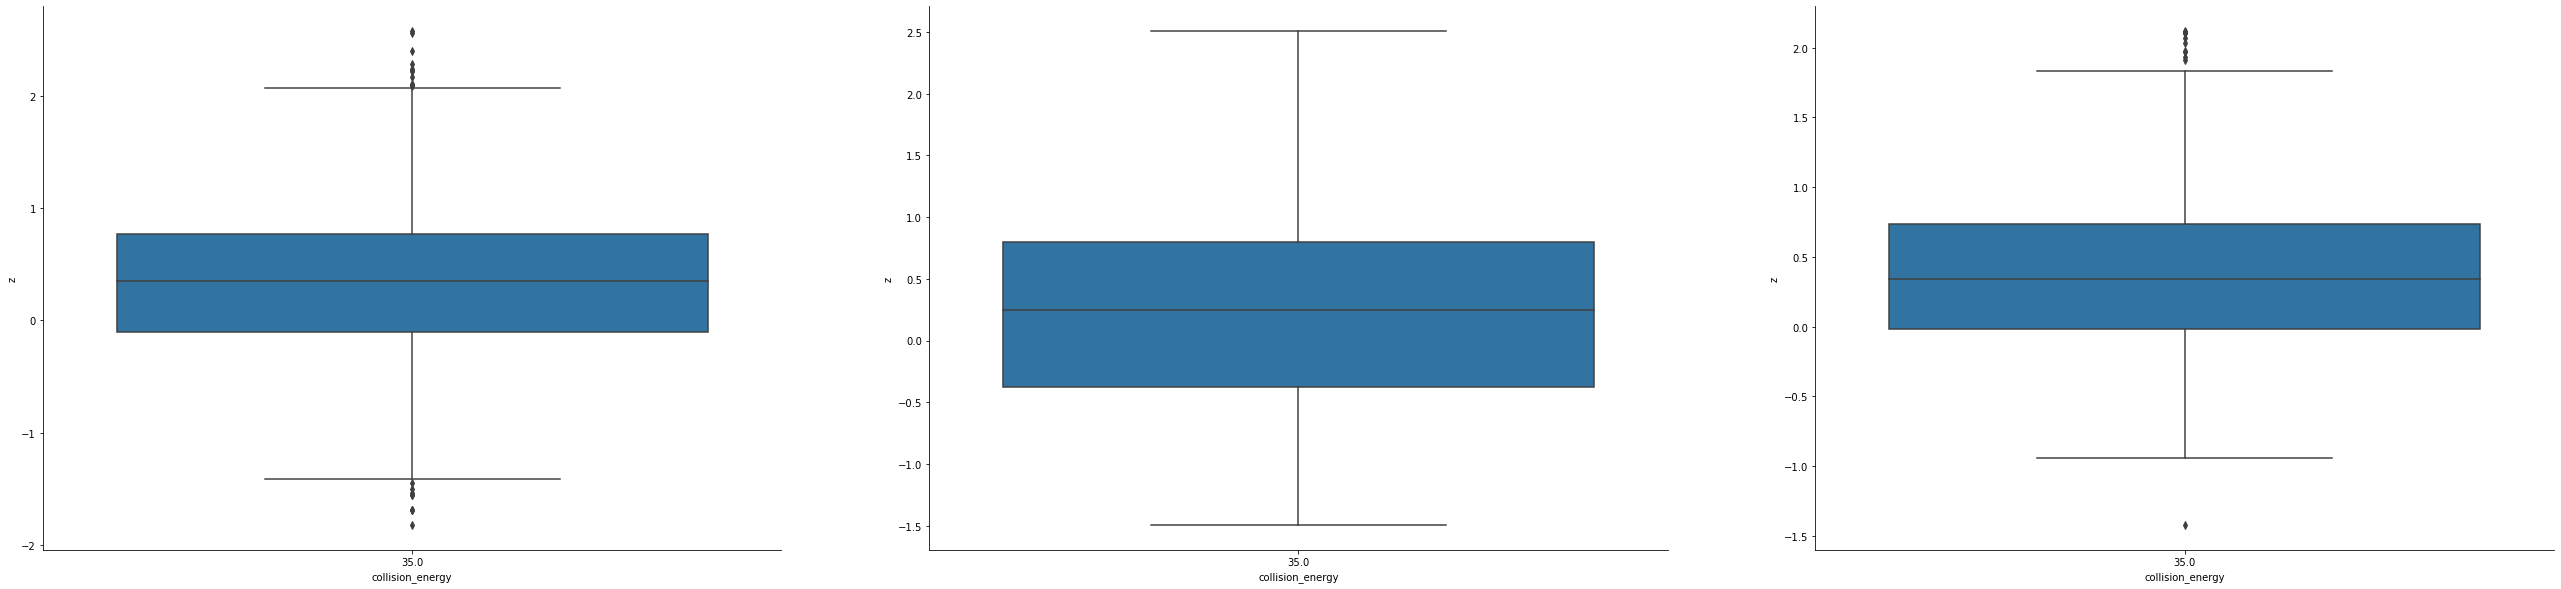

total_exact_mass
r^2 0.04287237338309713
RMSE 0.649906962198283
explained variance 0.04287236760126767
Pearson 0.20705645933616637
Spearman 0.23250008050801355
-----------------
r^2 0.006660683118936417
RMSE 0.7798416118681303
explained variance 0.00666071928314349
Pearson -0.08161293873644945
Spearman -0.07078925190482395
-----------------
r^2 0.04715755133557631
RMSE 0.5248926993316515
explained variance 0.04715756267263316
Pearson 0.2171579516487489
Spearman 0.24839934157367277
-----------------


<Figure size 432x288 with 0 Axes>

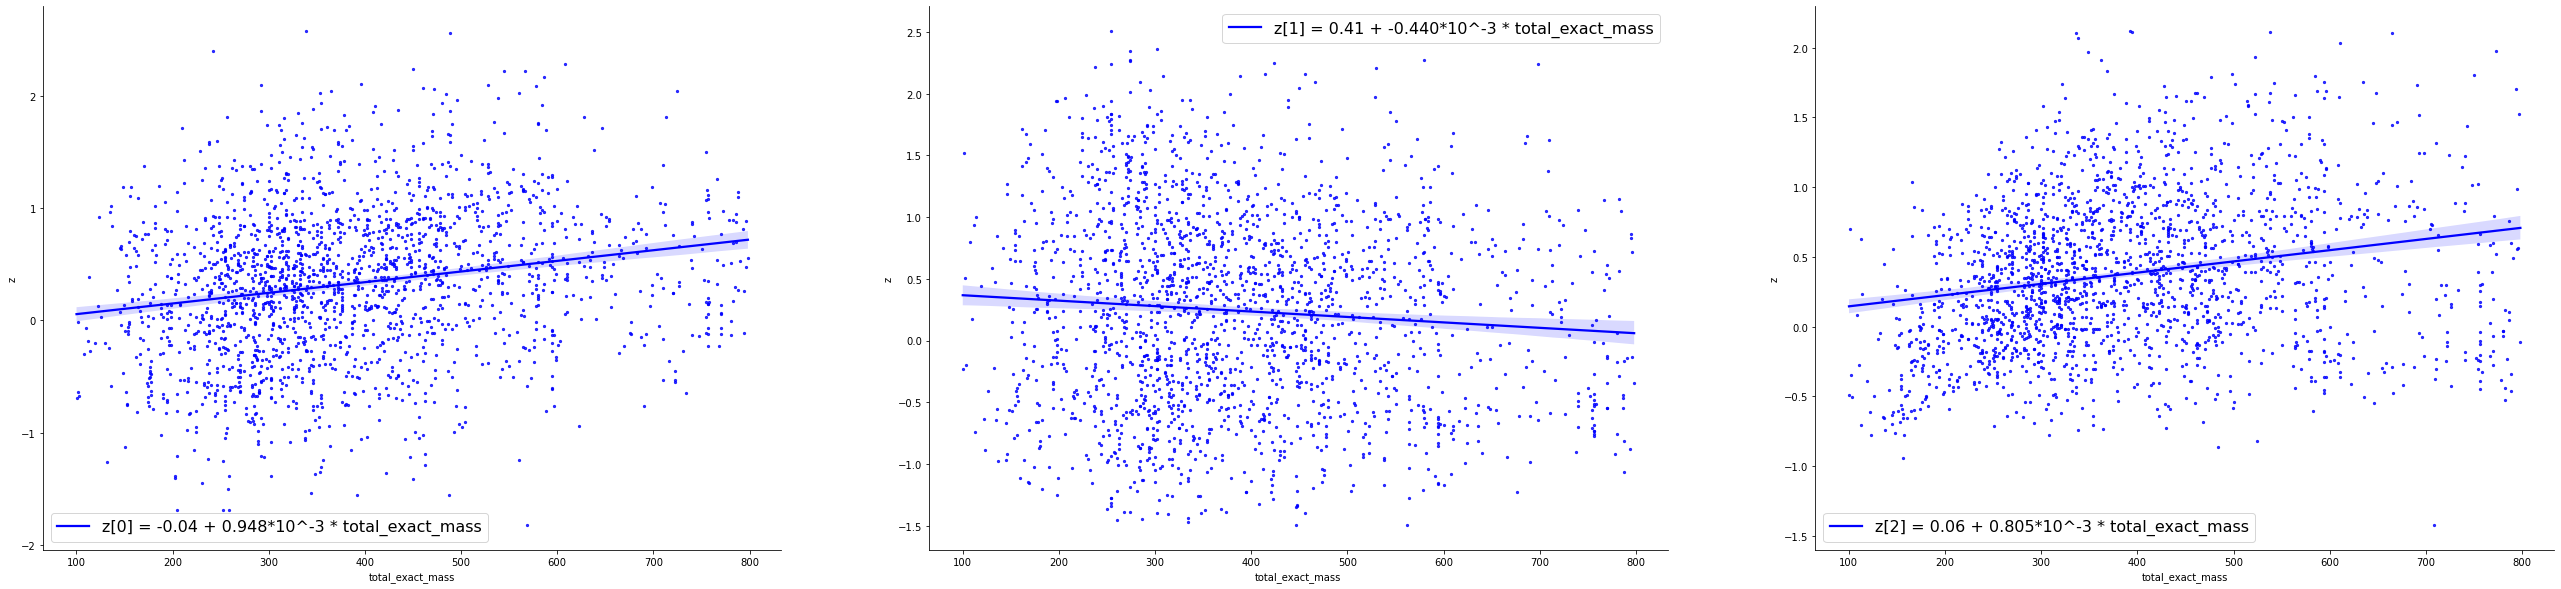

-------------------------------------------
d:\Workspace\SpecVAE\.model\MoNA\betavae_capacity_nextron\best\betavae_capacity_20-400-100-3-400-20_02 (24-12-2021_03-34-34)
Encode N=2020 instances from MoNA dataset...
torch.Size([2020, 3])
collision_energy
r^2 -3.6947340742443657e-09
RMSE 0.575849561488775
explained variance -7.4977525965636e-08
Pearson nan
Spearman nan
-----------------
r^2 4.1068646261521735e-09
RMSE 0.4373118601582907
explained variance 1.9030944597986377e-08
Pearson nan
Spearman nan
-----------------
r^2 -2.7252179624071005e-08
RMSE 0.7190397377663857
explained variance 1.0537313255287728e-07
Pearson nan
Spearman nan
-----------------


d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:187: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double

<Figure size 432x288 with 0 Axes>

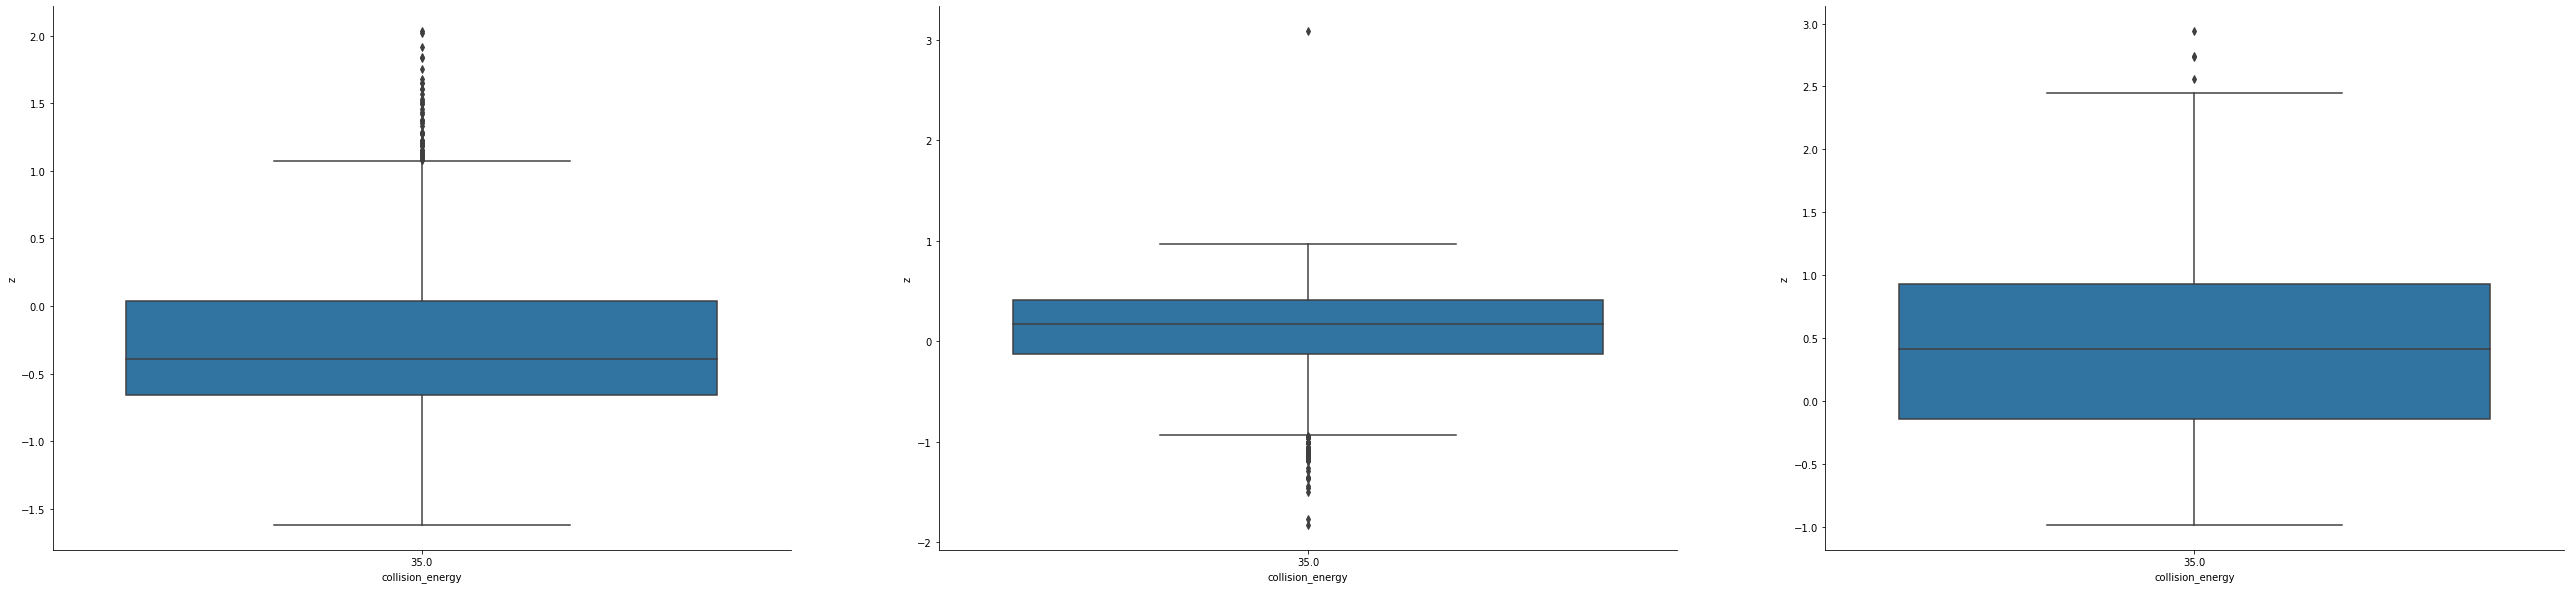

total_exact_mass
r^2 0.06311685877862572
RMSE 0.5573804754653673
explained variance 0.06311679199497988
Pearson -0.25123069525867997
Spearman -0.2774695072394187
-----------------
r^2 0.06681632977168328
RMSE 0.4224495209425519
explained variance 0.06681634369859091
Pearson -0.2584885412145461
Spearman -0.2732499067394259
-----------------
r^2 0.0017724804542273986
RMSE 0.7184022034116205
explained variance 0.0017726128444601752
Pearson 0.042101159818969565
Spearman 0.059668841438603265
-----------------


<Figure size 432x288 with 0 Axes>

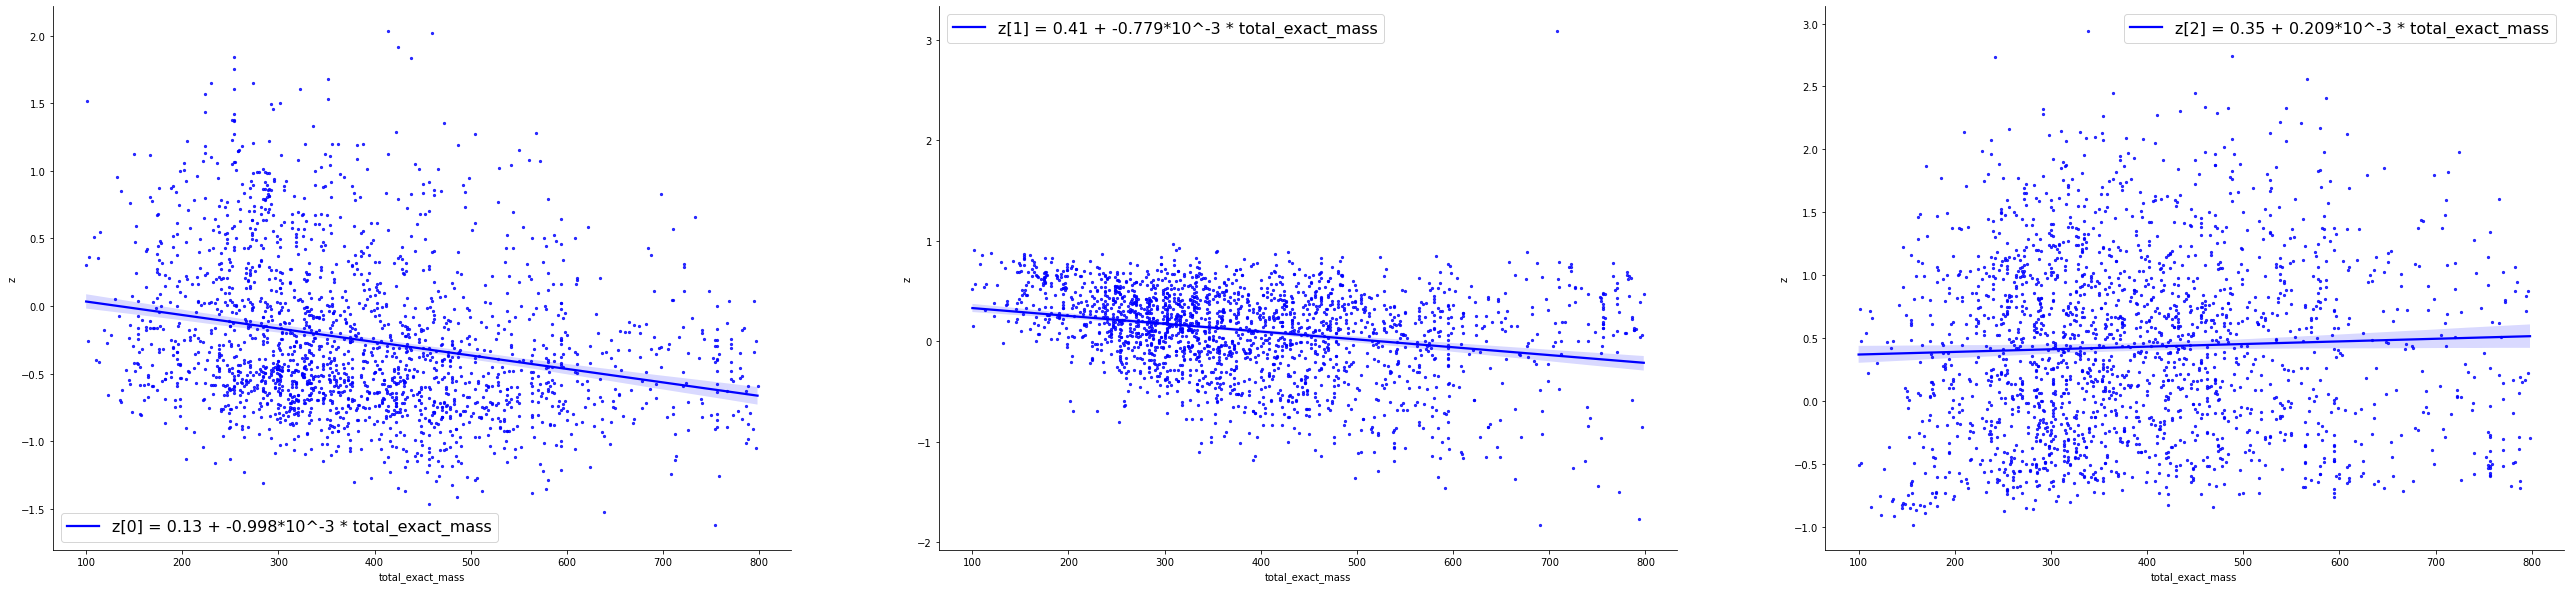

-------------------------------------------
d:\Workspace\SpecVAE\.model\MoNA\betavae_capacity_nextron\best\betavae_capacity_20-1600-3-1600-20_03 (24-12-2021_00-17-31)
Encode N=2020 instances from MoNA dataset...
torch.Size([2020, 3])
collision_energy
r^2 -5.0956425745596334e-09
RMSE 0.1810380104357133
explained variance 2.948580490880204e-09
Pearson nan
Spearman nan
-----------------
r^2 -5.004691994159316e-09
RMSE 0.3394804898056683
explained variance 6.728290591340169e-09
Pearson nan
Spearman nan
-----------------
r^2 -2.3316085062674574e-08
RMSE 0.708820351174095
explained variance 7.17245546288936e-08
Pearson nan
Spearman nan
-----------------


d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:187: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double

<Figure size 432x288 with 0 Axes>

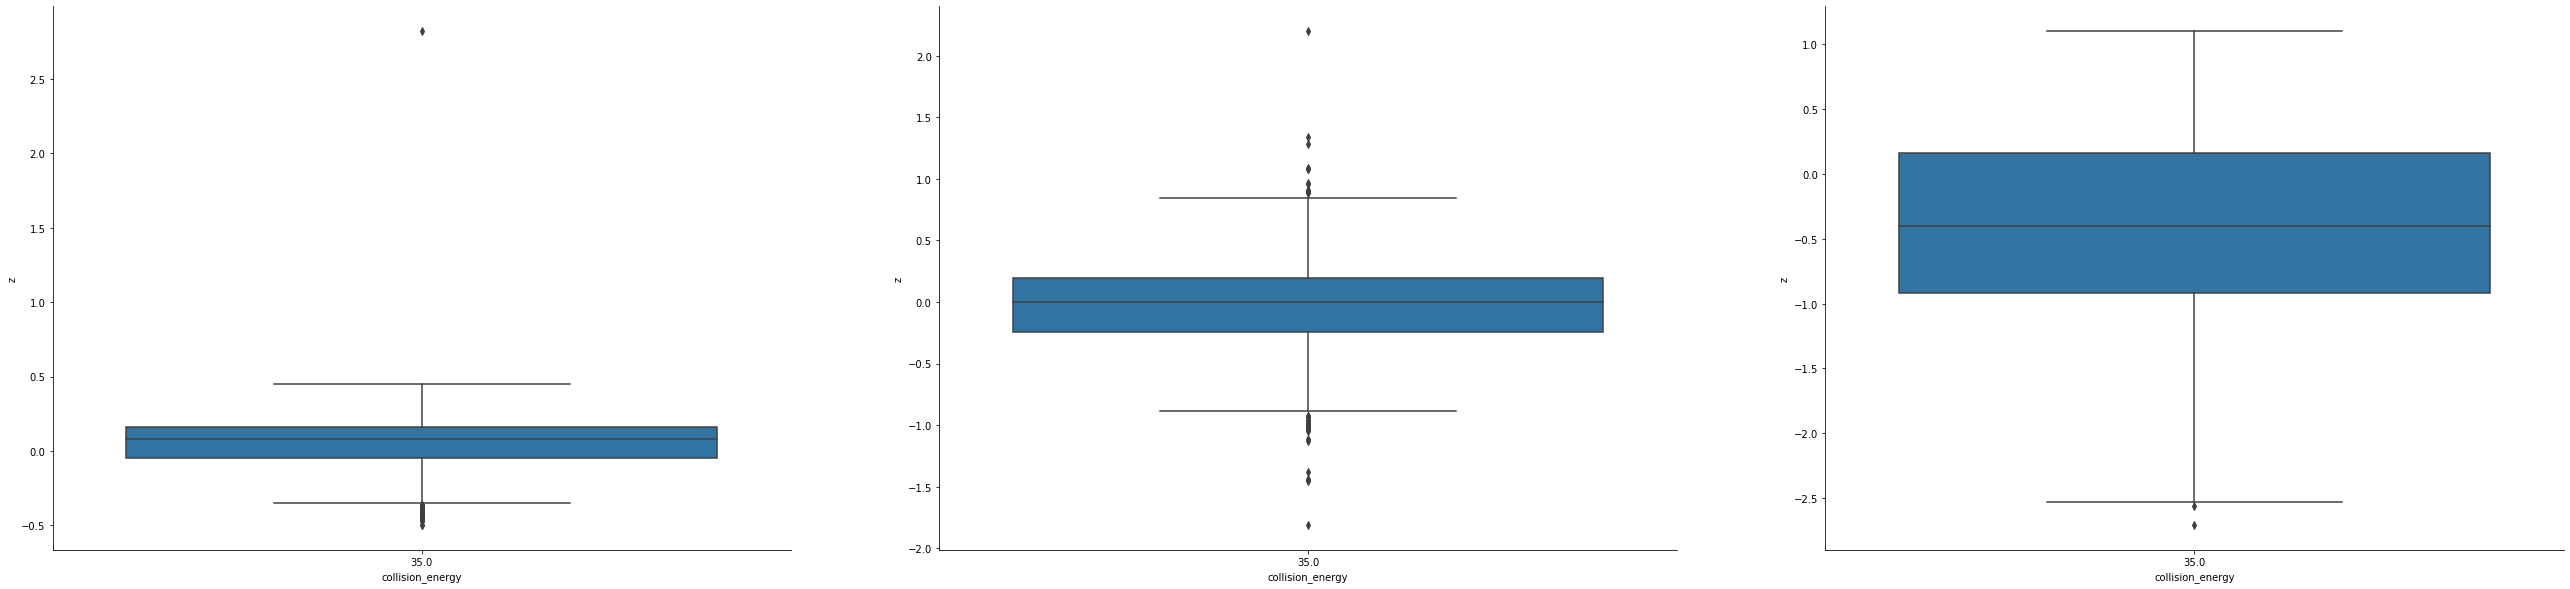

total_exact_mass
r^2 0.007111834738948497
RMSE 0.18039310511013892
explained variance 0.007111842725962436
Pearson 0.08433172474431977
Spearman 0.070228965303993
-----------------
r^2 0.12035317428627468
RMSE 0.3183970160323094
explained variance 0.1203531846071555
Pearson -0.3469195565093383
Spearman -0.3782896853472856
-----------------
r^2 0.002379715358625134
RMSE 0.7079764452242554
explained variance 0.0023798101730929666
Pearson -0.04878256470527226
Spearman -0.06634862149862297
-----------------


<Figure size 432x288 with 0 Axes>

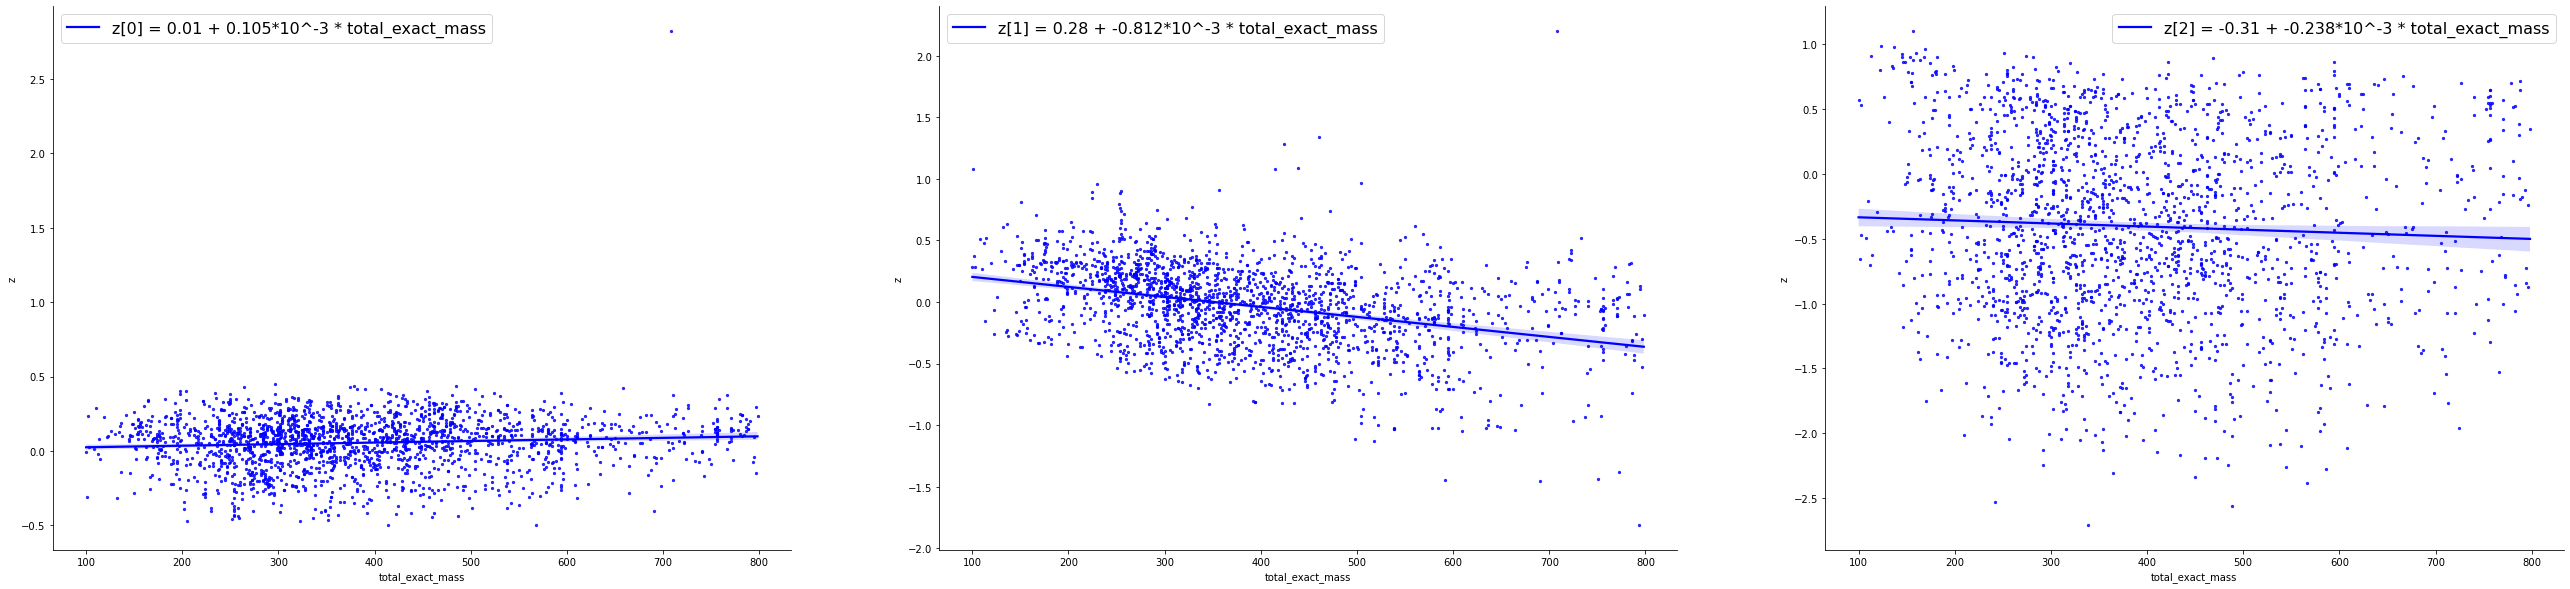

-------------------------------------------
d:\Workspace\SpecVAE\.model\MoNA\betavae_capacity_nextron\best\betavae_capacity_20-800-3-800-20_04 (24-12-2021_00-25-10)
Encode N=2020 instances from MoNA dataset...
torch.Size([2020, 3])
collision_energy
r^2 2.859744774319495e-09
RMSE 0.0023546095092869743
explained variance 1.493976620192683e-08
Pearson nan
Spearman nan
-----------------
r^2 -8.66963434376089e-09
RMSE 0.012484113214707335
explained variance -2.752501893077408e-08
Pearson nan
Spearman nan
-----------------
r^2 2.22394405113846e-08
RMSE 0.7131784626591761
explained variance -7.629237197548377e-08
Pearson nan
Spearman nan
-----------------


d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:187: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double

<Figure size 432x288 with 0 Axes>

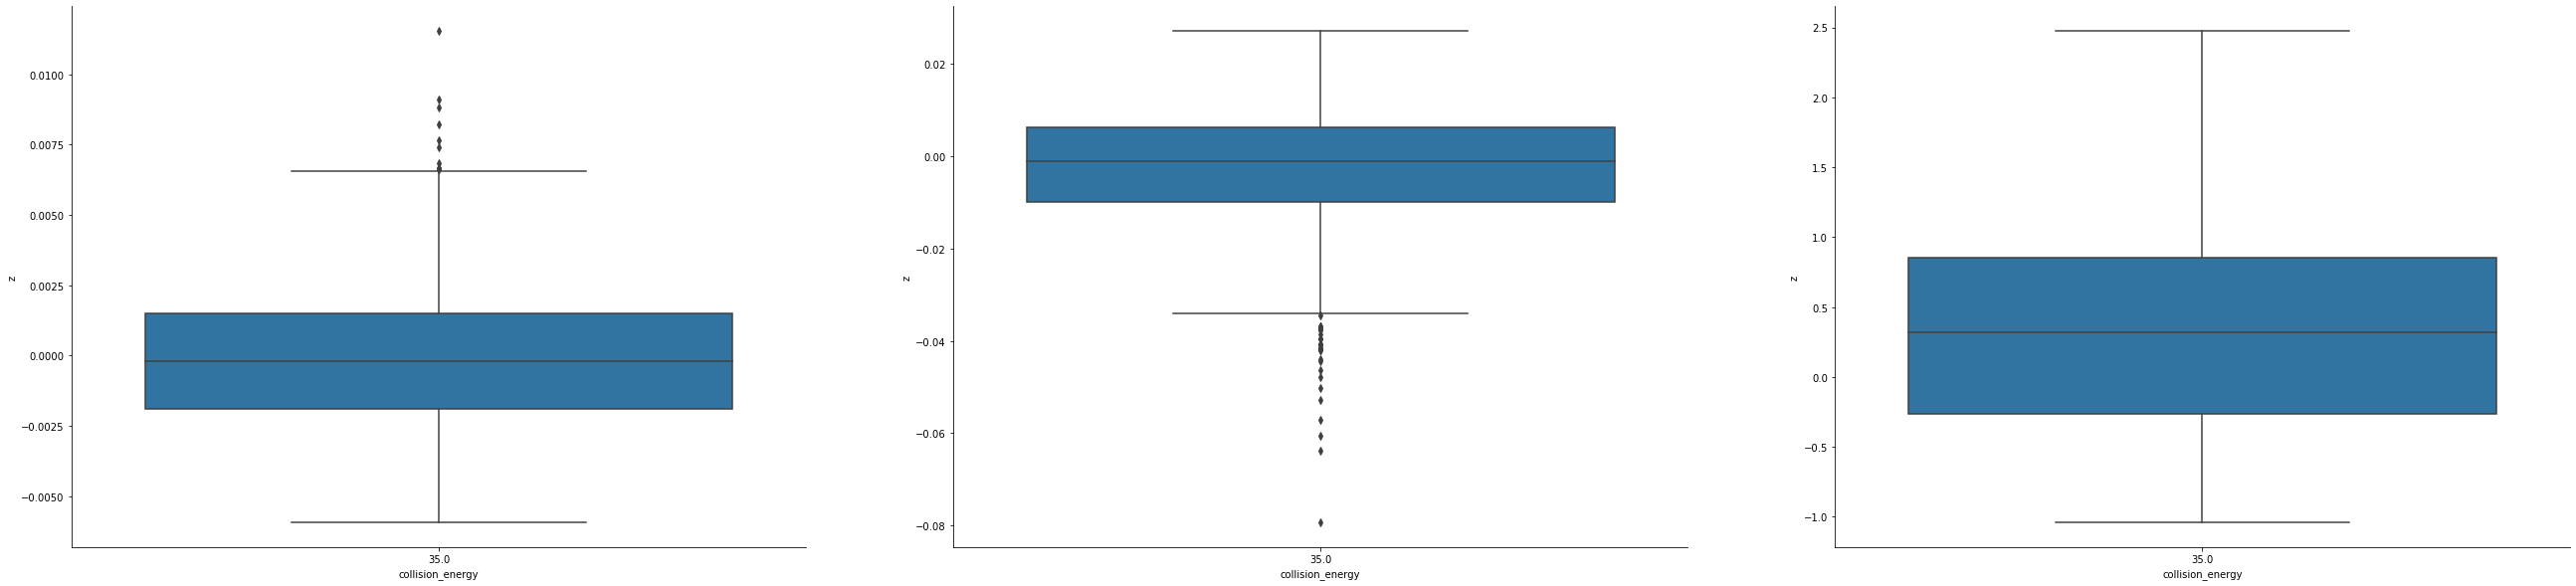

total_exact_mass
r^2 0.07353929011424976
RMSE 0.002266378268854203
explained variance 0.07353930130591513
Pearson 0.27118128155314947
Spearman 0.2707745925024175
-----------------
r^2 0.1650553695347171
RMSE 0.011407396436600974
explained variance 0.16505535379151526
Pearson -0.4062700786095155
Spearman -0.4381335171663226
-----------------
r^2 0.0021208490822246517
RMSE 0.7124217972266675
explained variance 0.002120750759381118
Pearson 0.046052436308517214
Spearman 0.06496462222308022
-----------------


<Figure size 432x288 with 0 Axes>

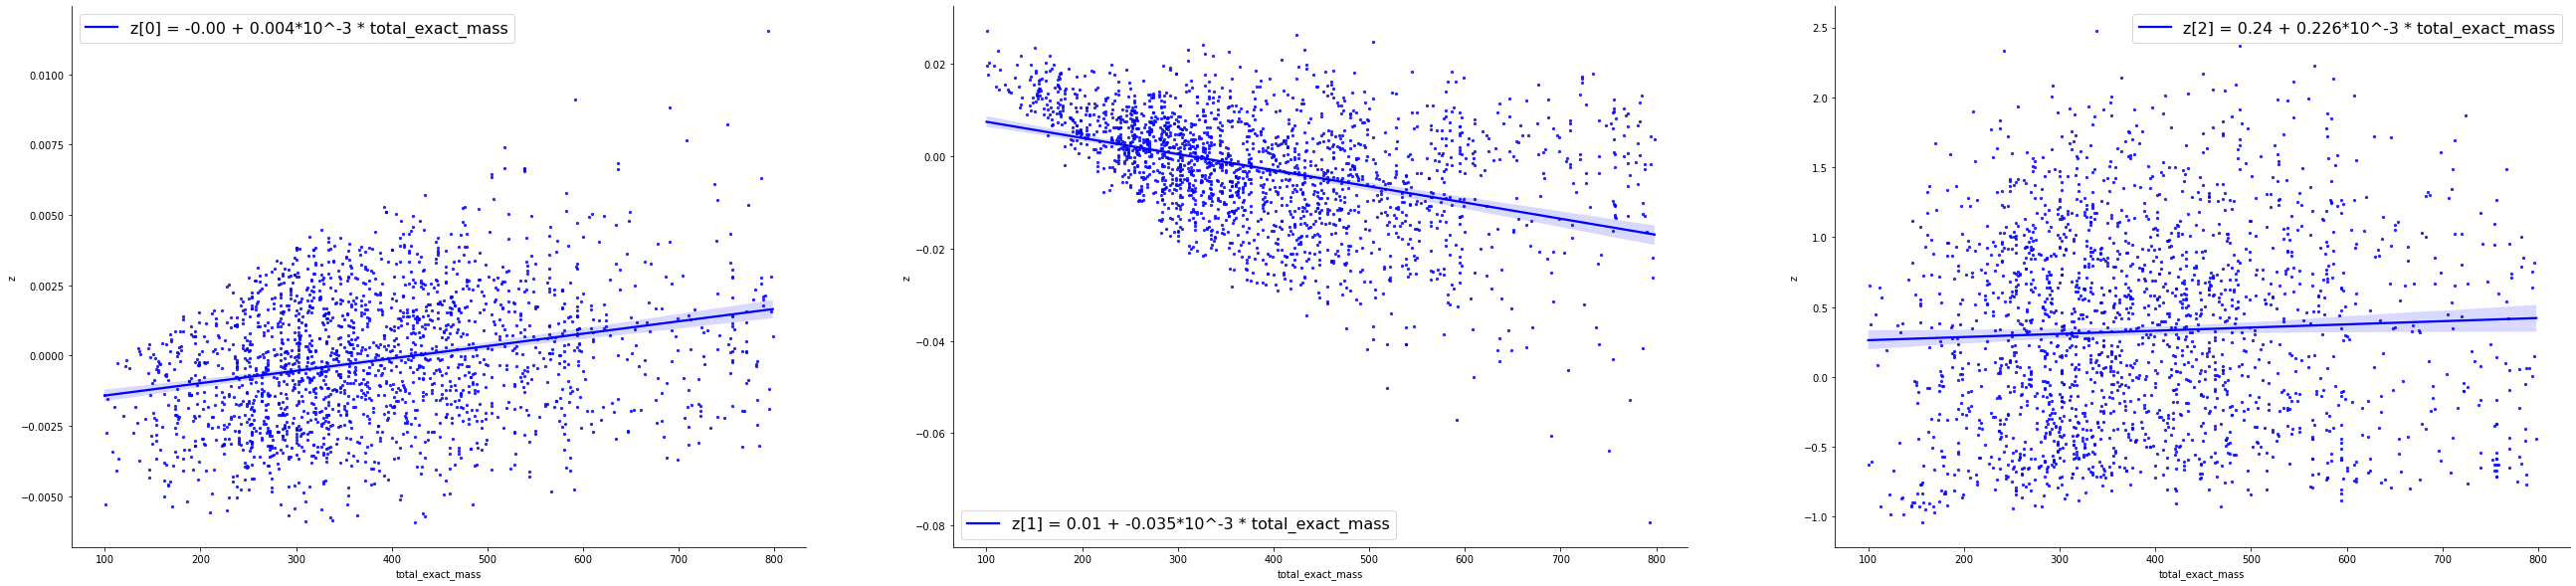

-------------------------------------------
d:\Workspace\SpecVAE\.model\MoNA\betavae_capacity_nextron\best\betavae_capacity_20-100-3-90-100-20_05 (24-12-2021_03-01-19)
Encode N=2020 instances from MoNA dataset...
torch.Size([2020, 3])
collision_energy
r^2 1.882175981737788e-08
RMSE 0.00634819113618062
explained variance 1.2186476683329062e-07
Pearson nan
Spearman nan
-----------------
r^2 1.8071816265674556e-09
RMSE 0.008549702921341109
explained variance 1.0827333851715082e-07
Pearson nan
Spearman nan
-----------------
r^2 2.830468859293944e-09
RMSE 0.6567552876814632
explained variance 3.223405131702606e-08
Pearson nan
Spearman nan
-----------------


d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:187: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double

<Figure size 432x288 with 0 Axes>

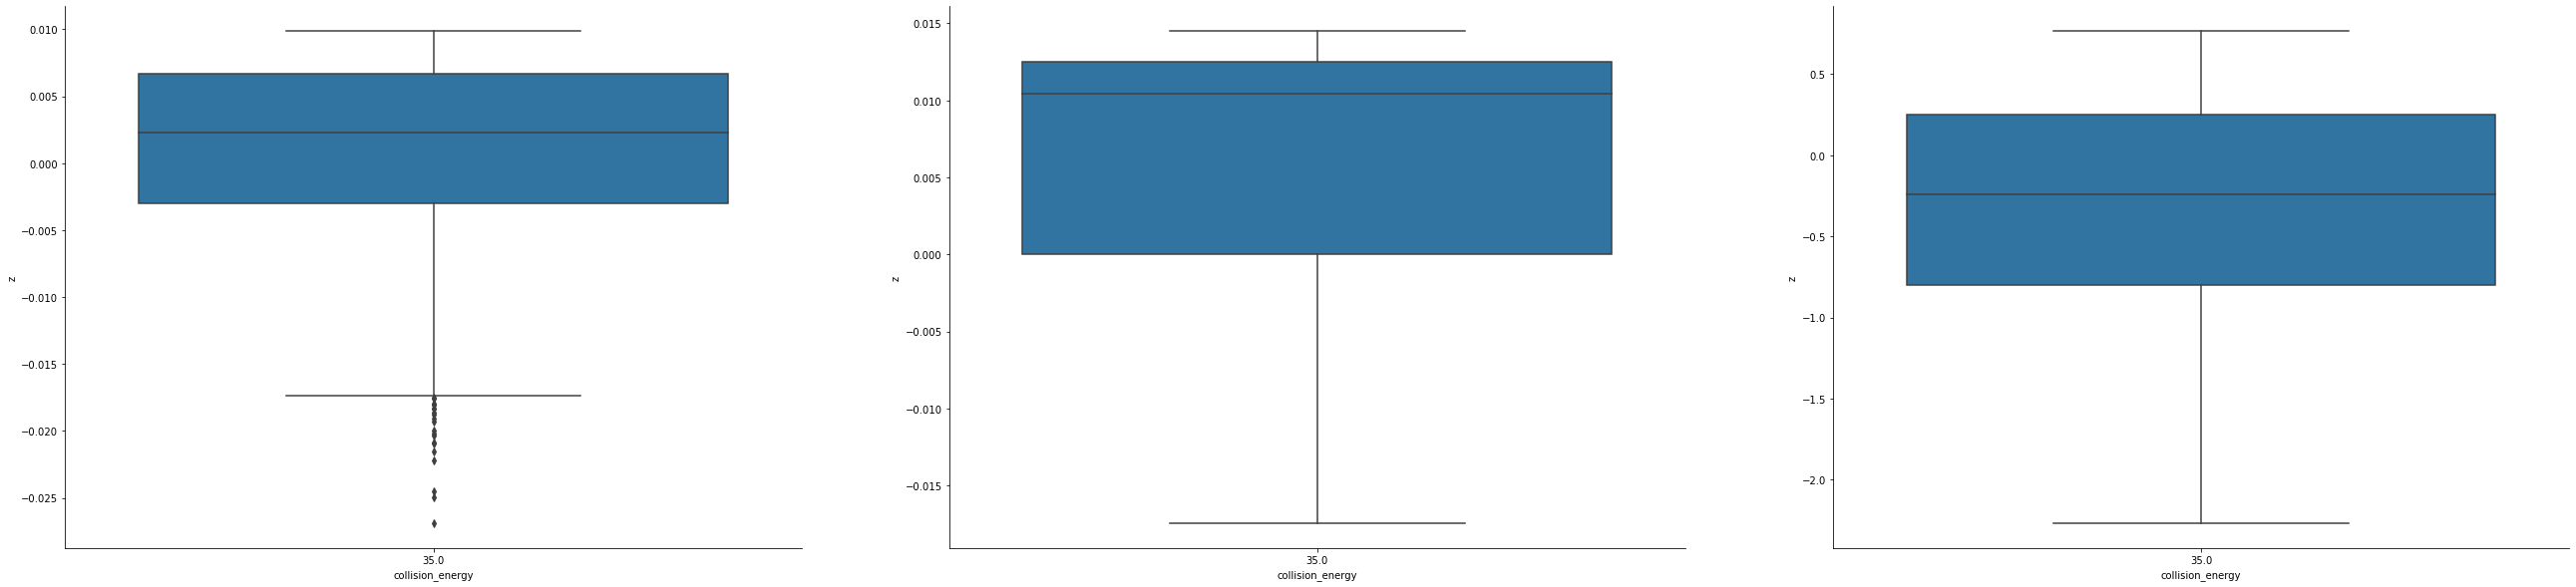

total_exact_mass
r^2 0.0023579715834474158
RMSE 0.006340702351473486
explained variance 0.002358074383483899
Pearson -0.04855875622447877
Spearman -0.04525085703624098
-----------------
r^2 0.0012794480958832066
RMSE 0.008544231727910459
explained variance 0.0012795544258225044
Pearson 0.03576934848461674
Spearman 0.05369028262639267
-----------------
r^2 0.00231299275992336
RMSE 0.6559953137886534
explained variance 0.002313022095495665
Pearson -0.048093553996364925
Spearman -0.06976256159914165
-----------------


<Figure size 432x288 with 0 Axes>

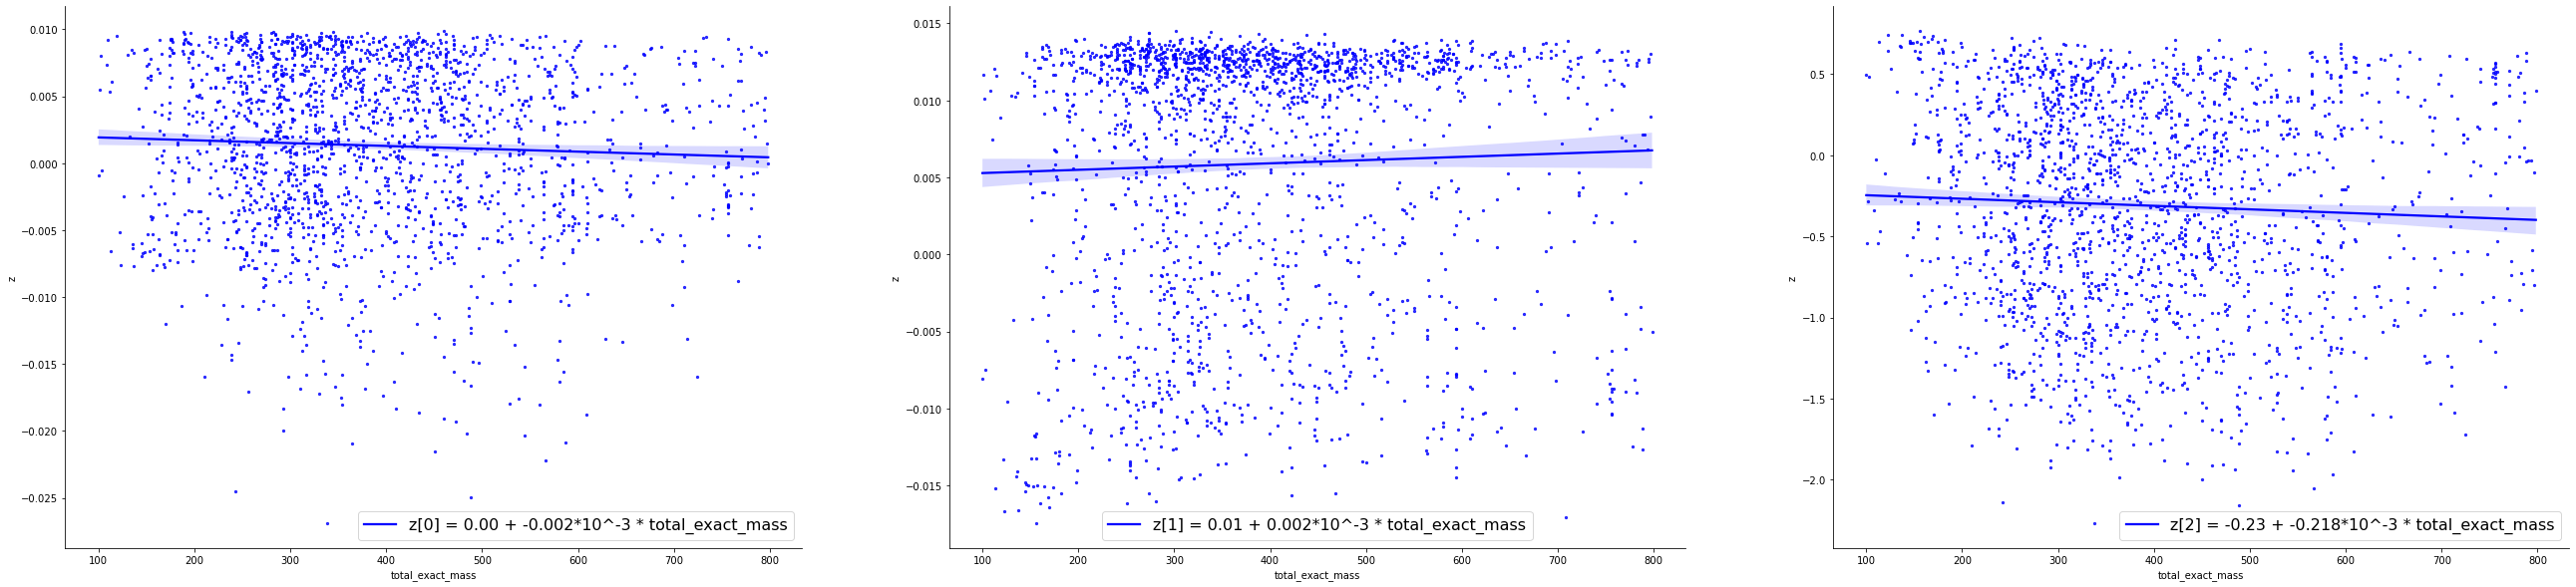

-------------------------------------------
d:\Workspace\SpecVAE\.model\MoNA\betavae_capacity_nextron\best\betavae_capacity_50-400-3-100-400-50_06 (24-12-2021_06-19-49)
Encode N=2020 instances from MoNA dataset...
torch.Size([2020, 3])
collision_energy
r^2 -2.733259152343237e-08
RMSE 0.5892847459574868
explained variance -1.0607890121860919e-09
Pearson nan
Spearman nan
-----------------
r^2 -1.6614223108391002e-08
RMSE 0.0049758850112530915
explained variance -3.640402179705404e-08
Pearson nan
Spearman nan
-----------------
r^2 -1.4110319579430097e-09
RMSE 0.014748428844789836
explained variance -1.6228465904433165e-08
Pearson nan
Spearman nan
-----------------


d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:187: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double

<Figure size 432x288 with 0 Axes>

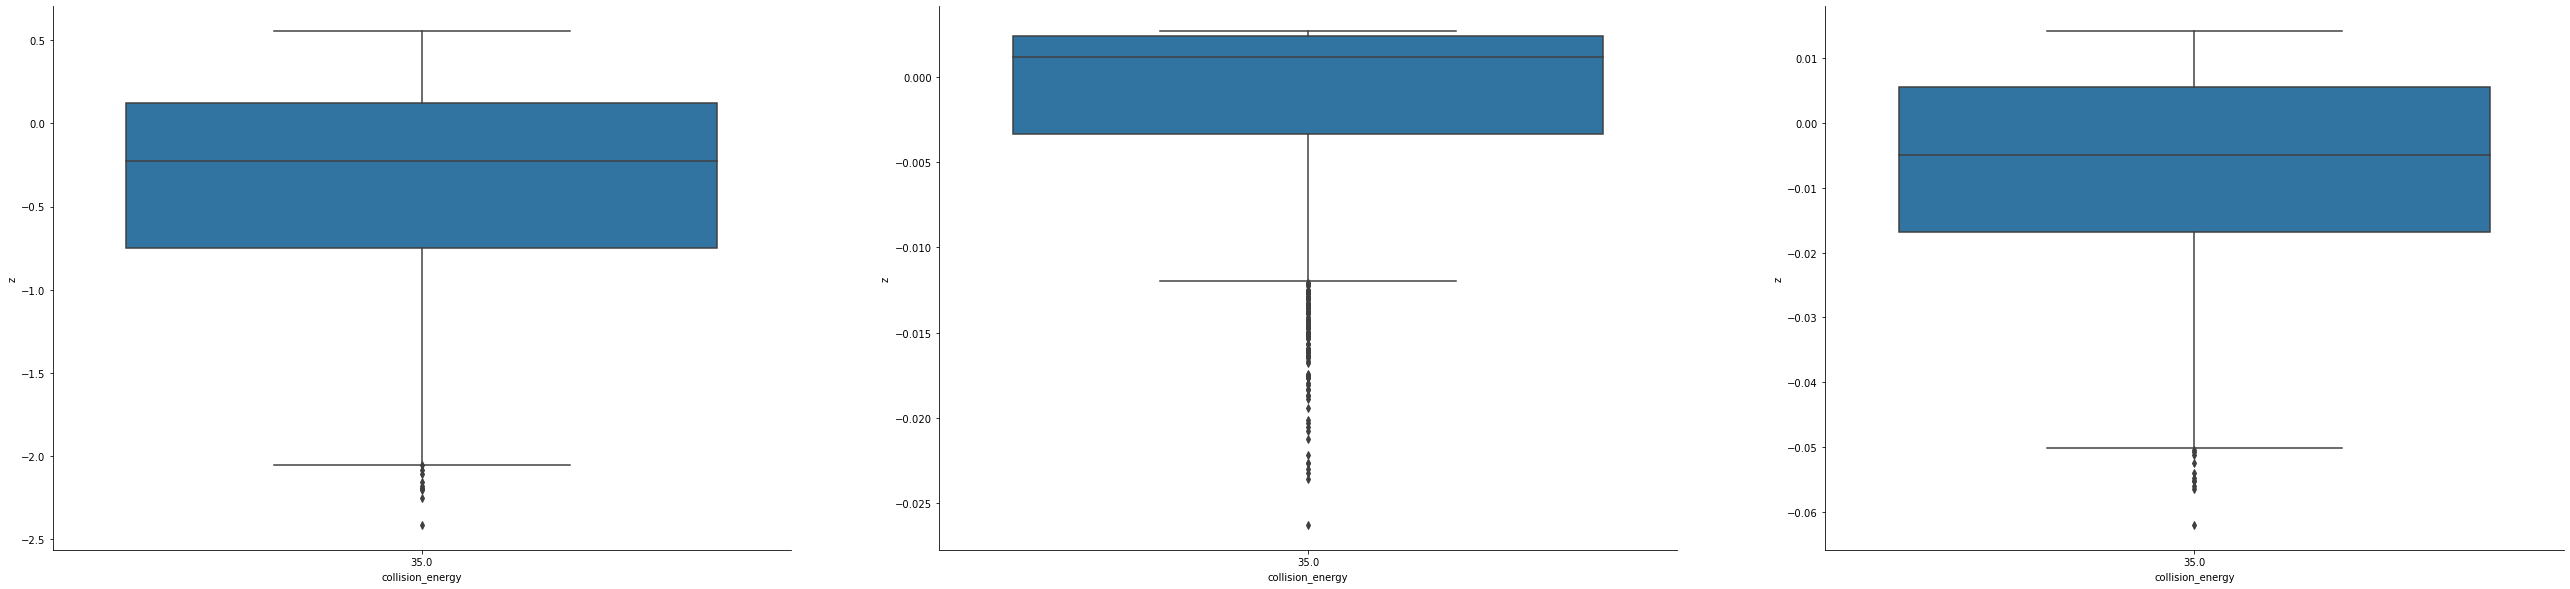

total_exact_mass
r^2 0.013888136867141965
RMSE 0.585178397152903
explained variance 0.013888162774077228
Pearson -0.11784805395140716
Spearman -0.1540552931844876
-----------------
r^2 0.006890891974887903
RMSE 0.004958711190204801
explained variance 0.006890872321458796
Pearson -0.08301149603894645
Spearman -0.05015945695414182
-----------------
r^2 0.008643231990494993
RMSE 0.014684553466487534
explained variance 0.0086432173011316
Pearson -0.09296899154735017
Spearman -0.12188042508109714
-----------------


<Figure size 432x288 with 0 Axes>

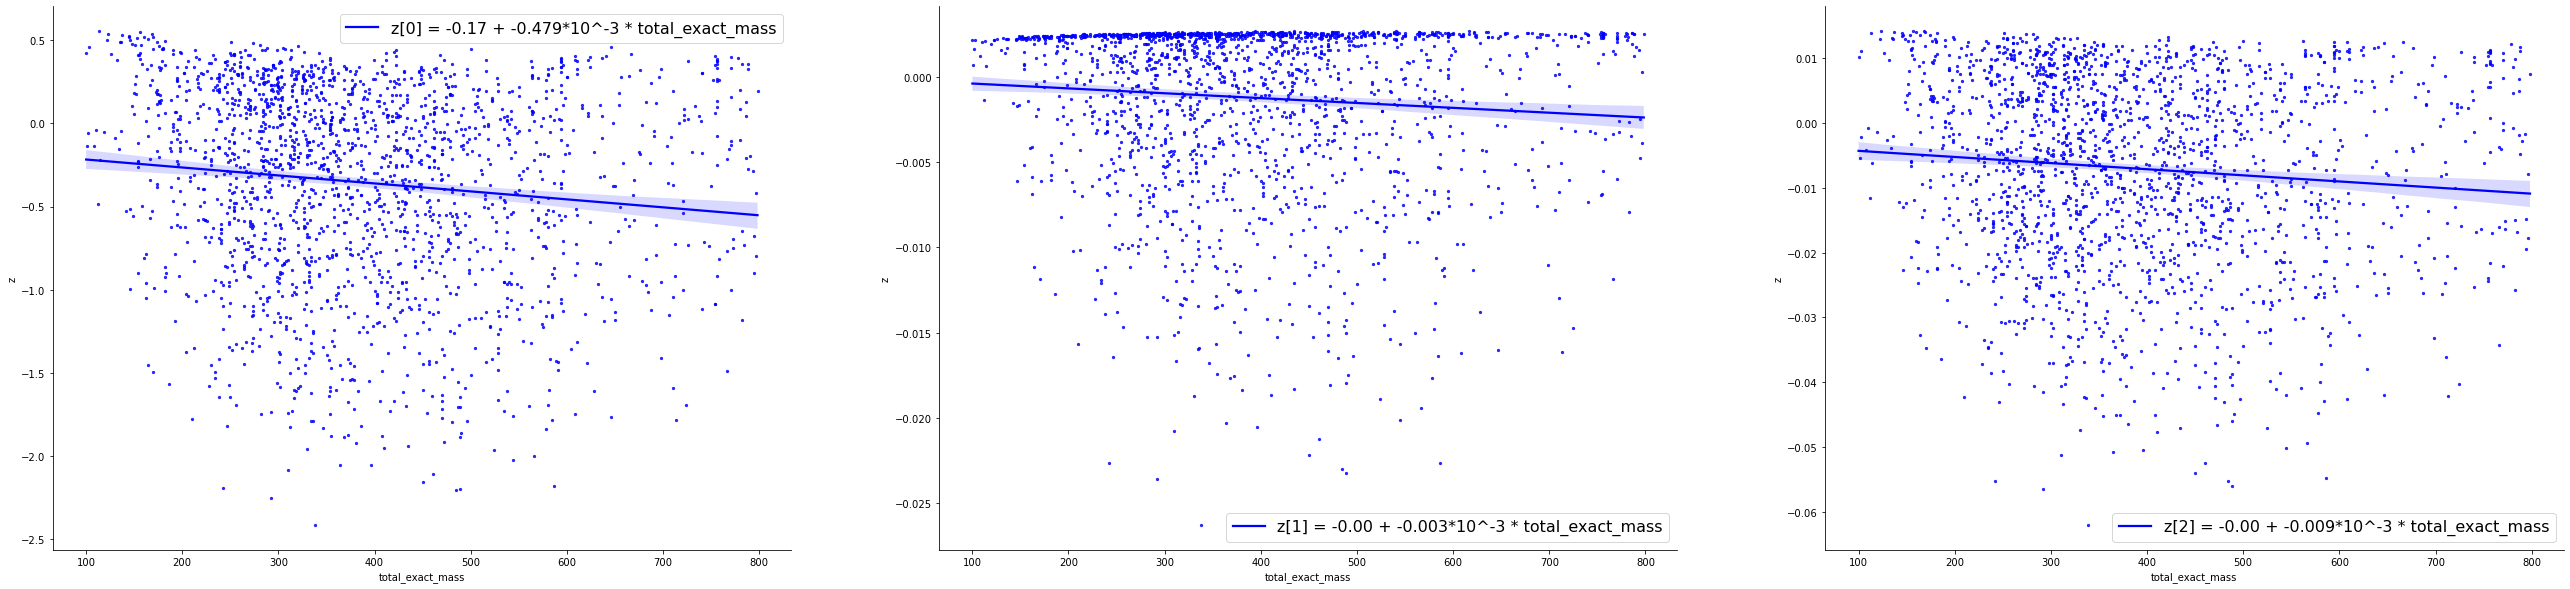

-------------------------------------------
d:\Workspace\SpecVAE\.model\MoNA\betavae_capacity_nextron\beta\betavae_capacity_100-1600-200-50-3-50-200-1600-100_01 (24-12-2021_09-13-36)
Encode N=2020 instances from MoNA dataset...
torch.Size([2020, 3])
collision_energy
r^2 -6.824412146499981e-10
RMSE 0.4024398033006996
explained variance 3.1536797617803813e-08
Pearson nan
Spearman nan
-----------------
r^2 2.5174451412368626e-09
RMSE 1.0143814892126788
explained variance -3.979500728945595e-08
Pearson nan
Spearman nan
-----------------
r^2 2.4464935632906304e-09
RMSE 0.6332436434900612
explained variance 1.863486664976932e-08
Pearson nan
Spearman nan
-----------------


d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:187: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double

<Figure size 432x288 with 0 Axes>

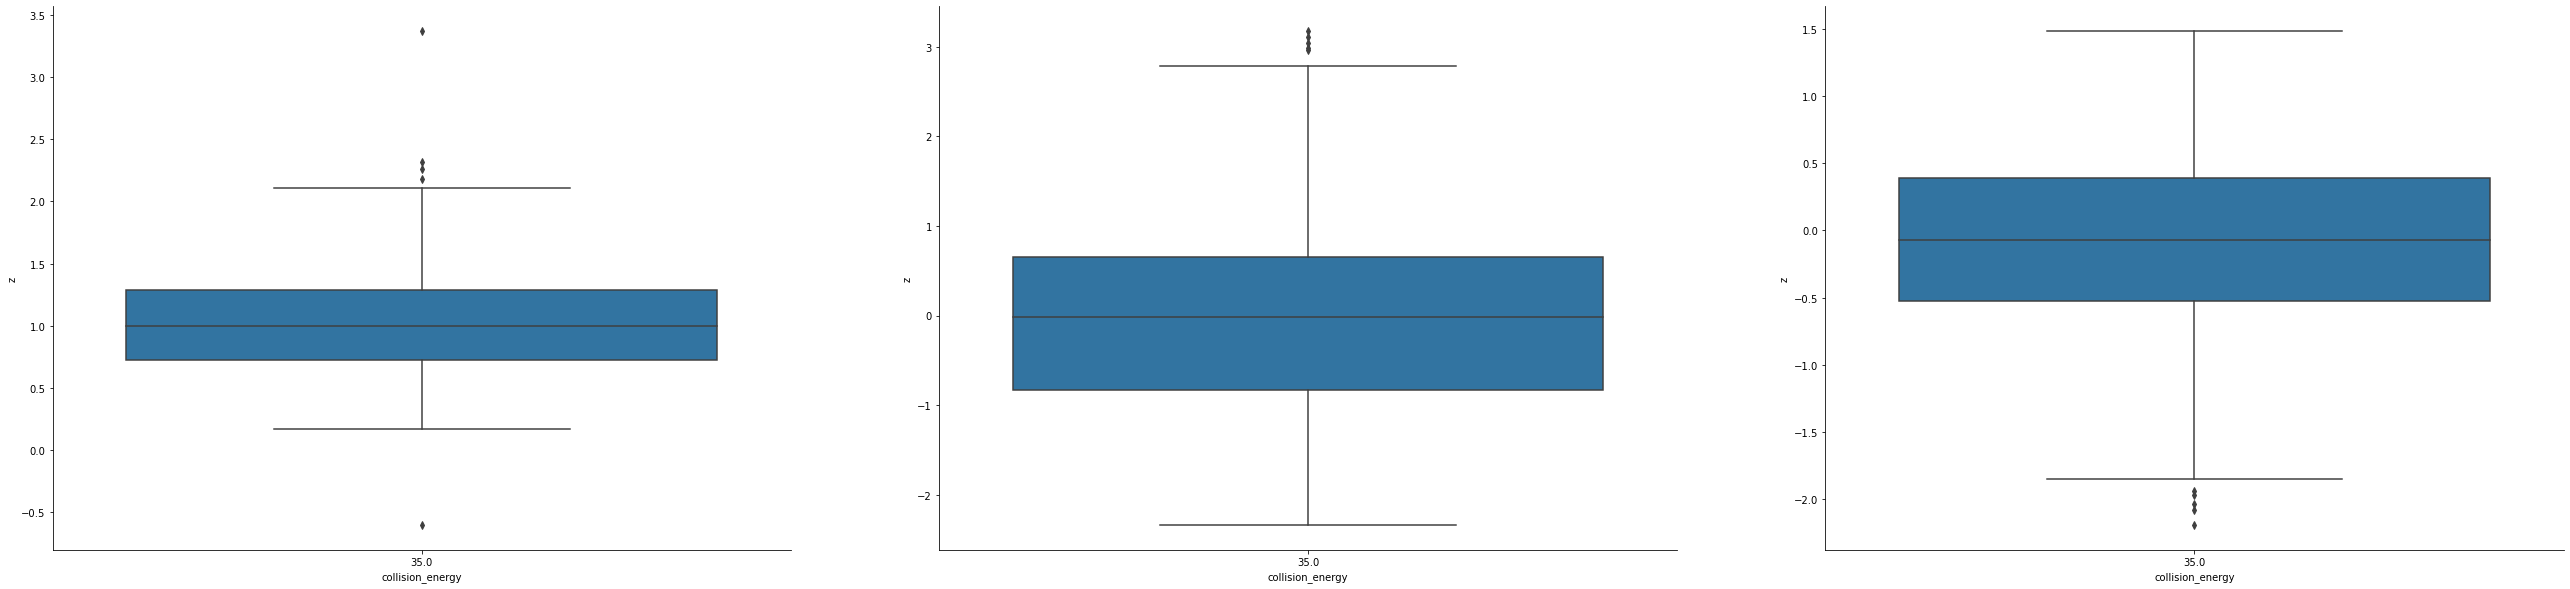

total_exact_mass
r^2 0.2670899785614136
RMSE 0.3445293762951458
explained variance 0.2670900021752167
Pearson 0.5168074874279414
Spearman 0.5659422522190873
-----------------
r^2 0.0007131036771842458
RMSE 1.014019746402275
explained variance 0.0007130613949047904
Pearson 0.02670395404306305
Spearman 0.05375438059538423
-----------------
r^2 0.054966001338144554
RMSE 0.6155942520567964
explained variance 0.05496601663670764
Pearson -0.2344482864644673
Spearman -0.24551323625446897
-----------------


<Figure size 432x288 with 0 Axes>

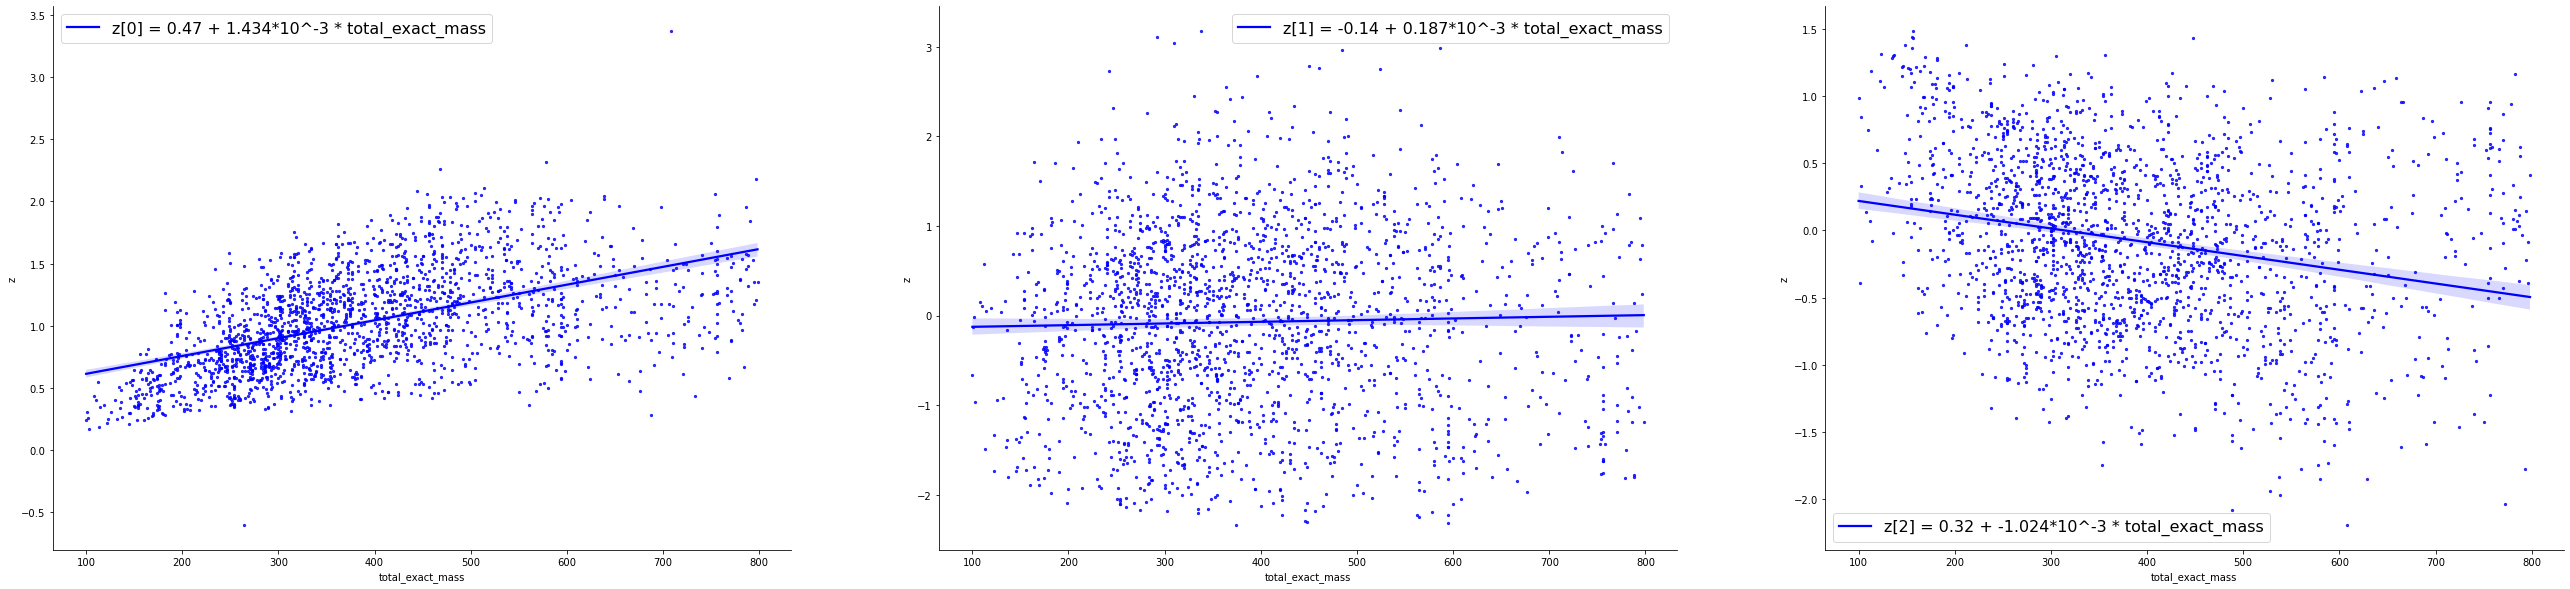

-------------------------------------------
d:\Workspace\SpecVAE\.model\MoNA\betavae_capacity_nextron\beta\betavae_capacity_100-1600-200-50-3-50-200-1600-100_02 (24-12-2021_09-15-11)
Encode N=2020 instances from MoNA dataset...
torch.Size([2020, 3])
collision_energy
r^2 -7.850753380722608e-10
RMSE 0.9537015085757884
explained variance -8.023315700711464e-08
Pearson nan
Spearman nan
-----------------
r^2 3.38479577699502e-10
RMSE 0.452179005294942
explained variance -8.090827630091724e-08
Pearson nan
Spearman nan
-----------------
r^2 -3.833569017785976e-10
RMSE 0.4303479616769854
explained variance -1.6737302654945552e-08
Pearson nan
Spearman nan
-----------------


d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:187: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double

<Figure size 432x288 with 0 Axes>

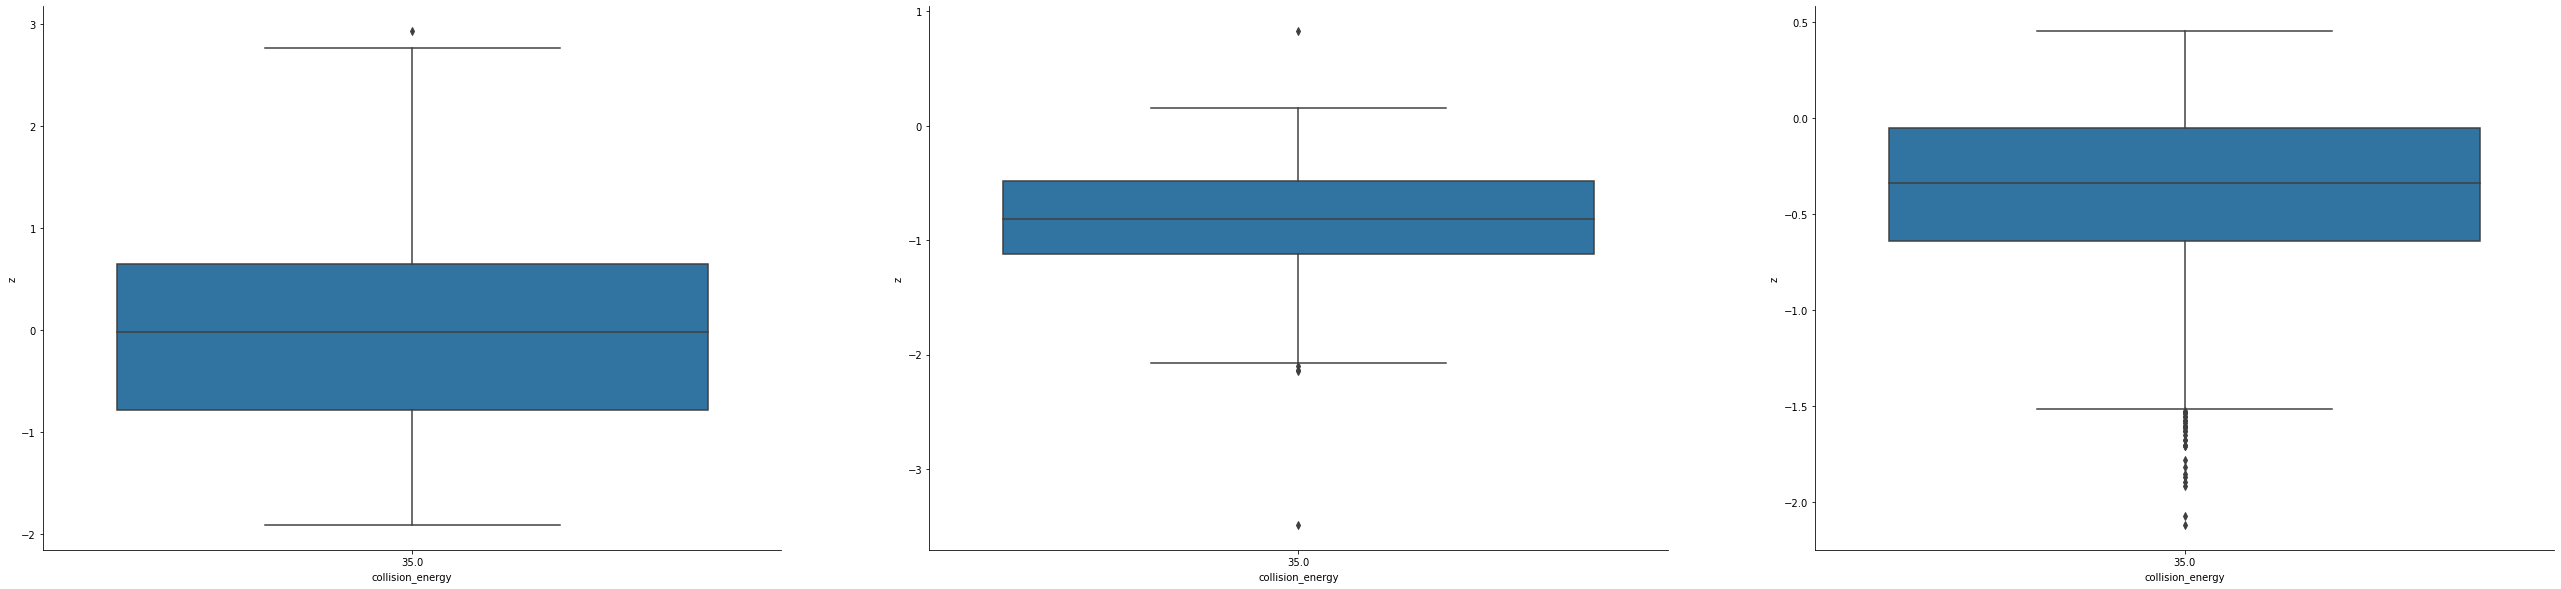

total_exact_mass
r^2 0.0029151828843919647
RMSE 0.9523103864611251
explained variance 0.0029151036679159192
Pearson 0.053992440833683514
Spearman 0.07621237187666009
-----------------
r^2 0.17041973521768983
RMSE 0.41185050247228044
explained variance 0.17041966781698448
Pearson -0.4128192521393519
Spearman -0.45361834359281705
-----------------
r^2 0.175064644395154
RMSE 0.3908676330152114
explained variance 0.175064630904206
Pearson -0.4184072713414512
Spearman -0.44827118328662136
-----------------


<Figure size 432x288 with 0 Axes>

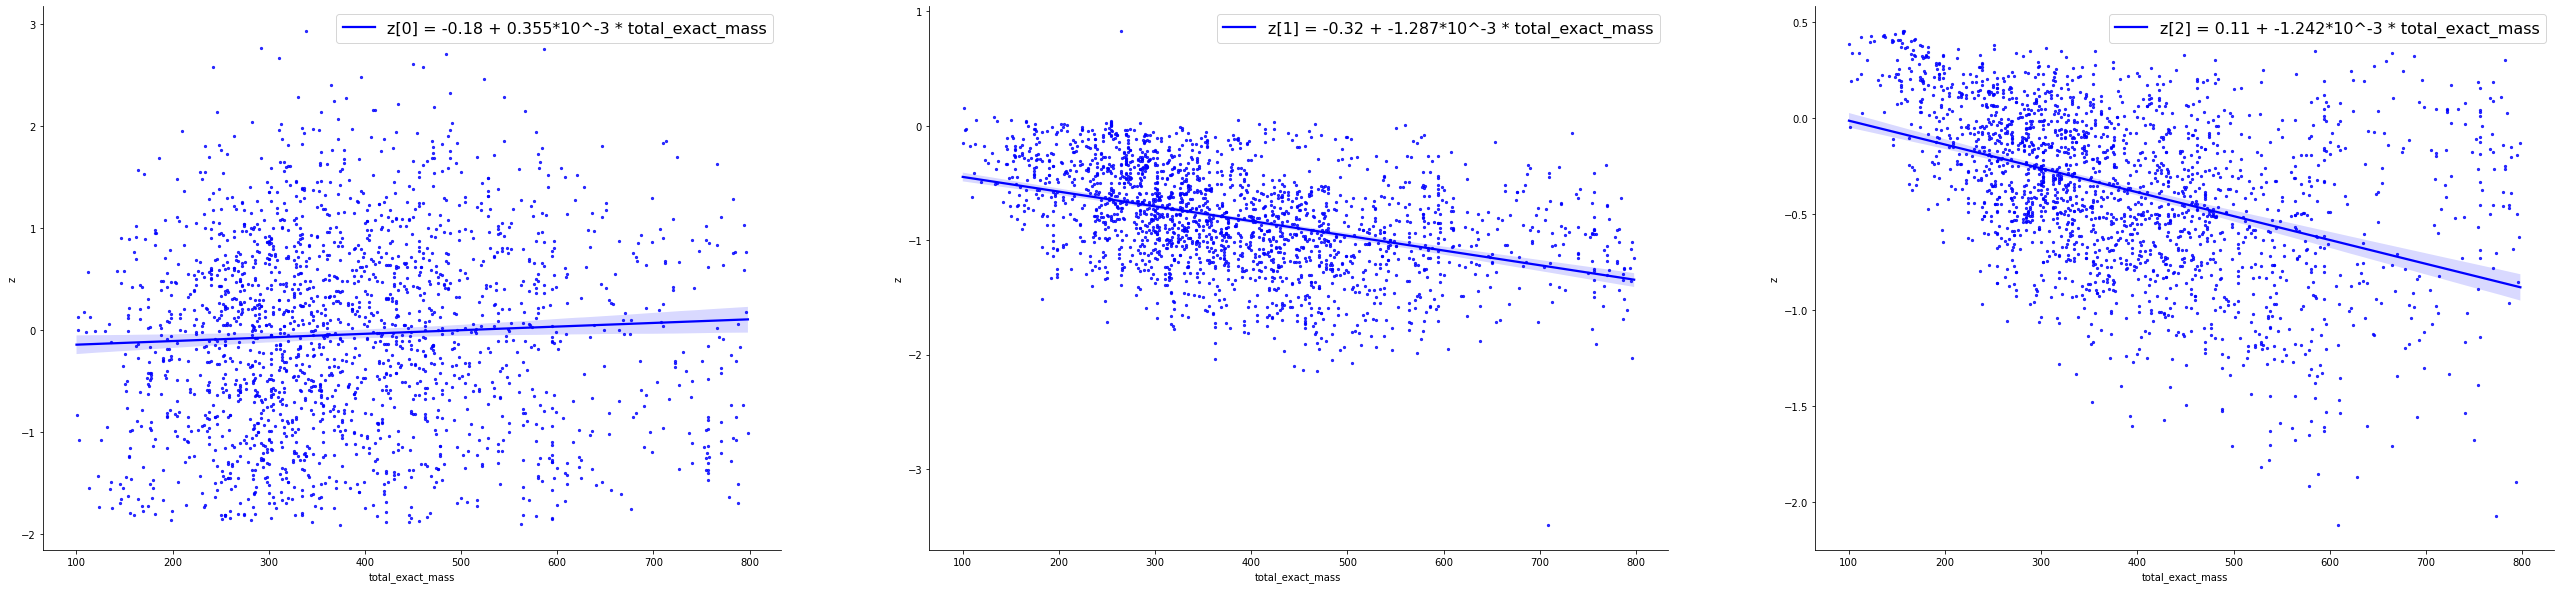

-------------------------------------------
d:\Workspace\SpecVAE\.model\MoNA\betavae_capacity_nextron\beta\betavae_capacity_100-1600-200-50-3-50-200-1600-100_03 (24-12-2021_09-29-26)
Encode N=2020 instances from MoNA dataset...
torch.Size([2020, 3])
collision_energy
r^2 -9.73681135718607e-10
RMSE 0.40851198808033
explained variance 5.1606942830240143e-08
Pearson nan
Spearman nan
-----------------
r^2 4.991126067999119e-09
RMSE 0.9485616663277566
explained variance 1.306082231256056e-08
Pearson nan
Spearman nan
-----------------
r^2 -2.0062480565741225e-09
RMSE 0.3815903135936529
explained variance -3.2584164255666792e-09
Pearson nan
Spearman nan
-----------------


d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:187: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double

<Figure size 432x288 with 0 Axes>

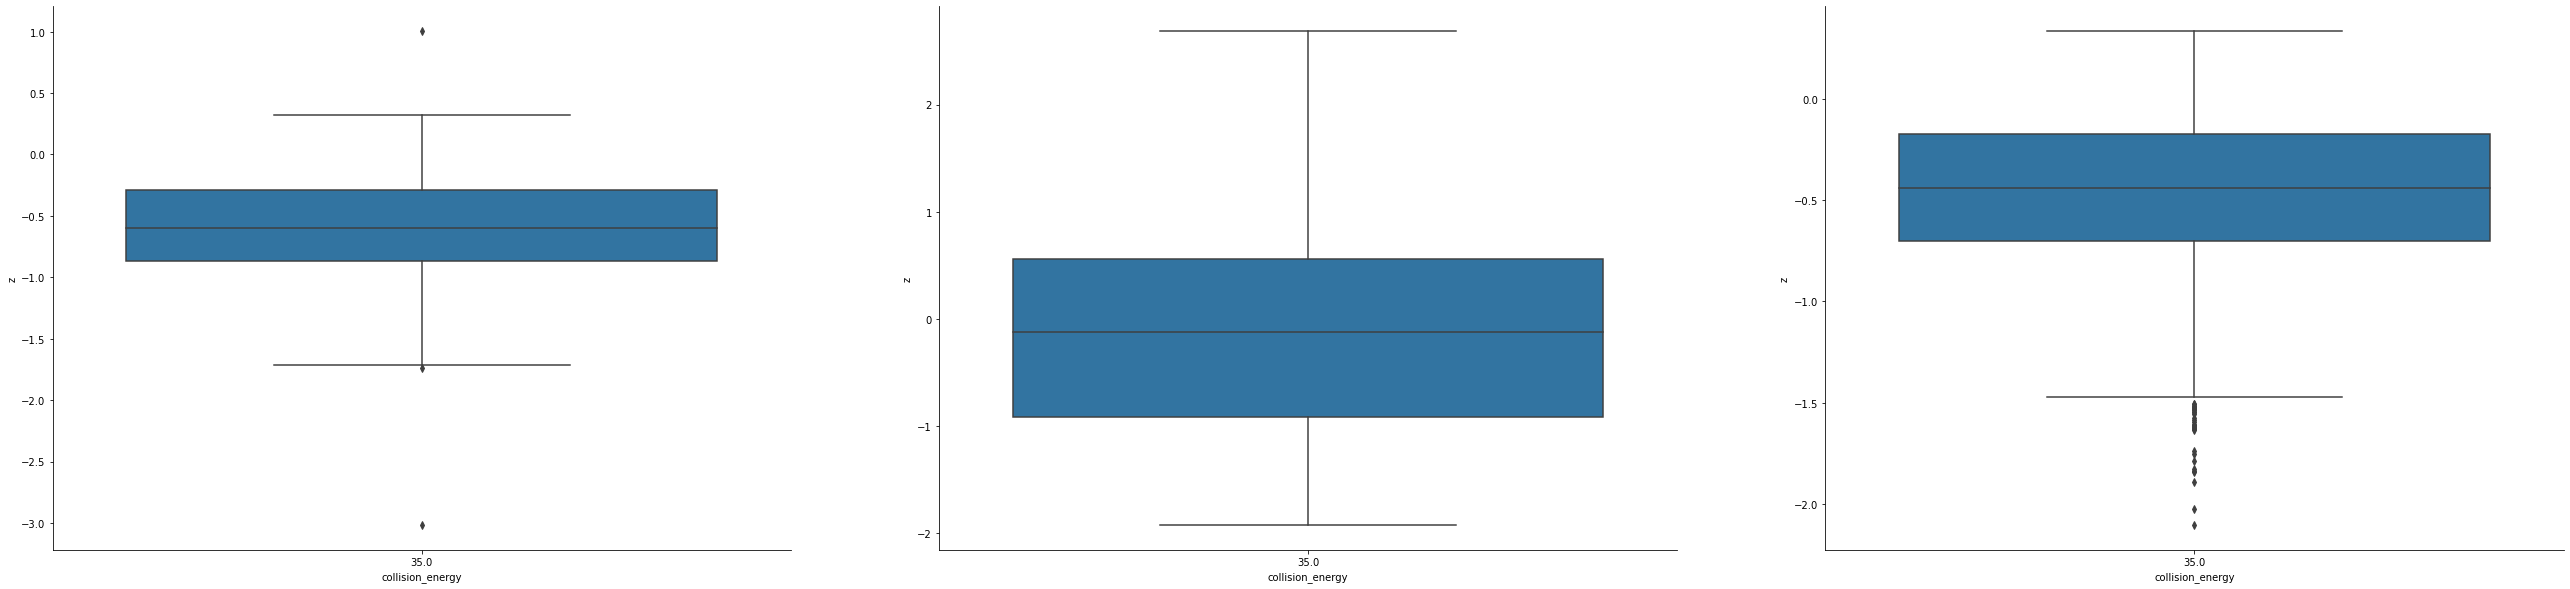

total_exact_mass
r^2 0.2012375842965174
RMSE 0.3651014993080108
explained variance 0.20123762629594344
Pearson -0.4485951237744981
Spearman -0.49040442207097285
-----------------
r^2 0.0018718121840319846
RMSE 0.9476734882291372
explained variance 0.0018718202386232008
Pearson 0.04326438722839299
Spearman 0.06587630834700443
-----------------
r^2 0.15234064702051275
RMSE 0.3513241633042105
explained variance 0.15234064595910035
Pearson -0.3903084020631989
Spearman -0.41299442342653214
-----------------


<Figure size 432x288 with 0 Axes>

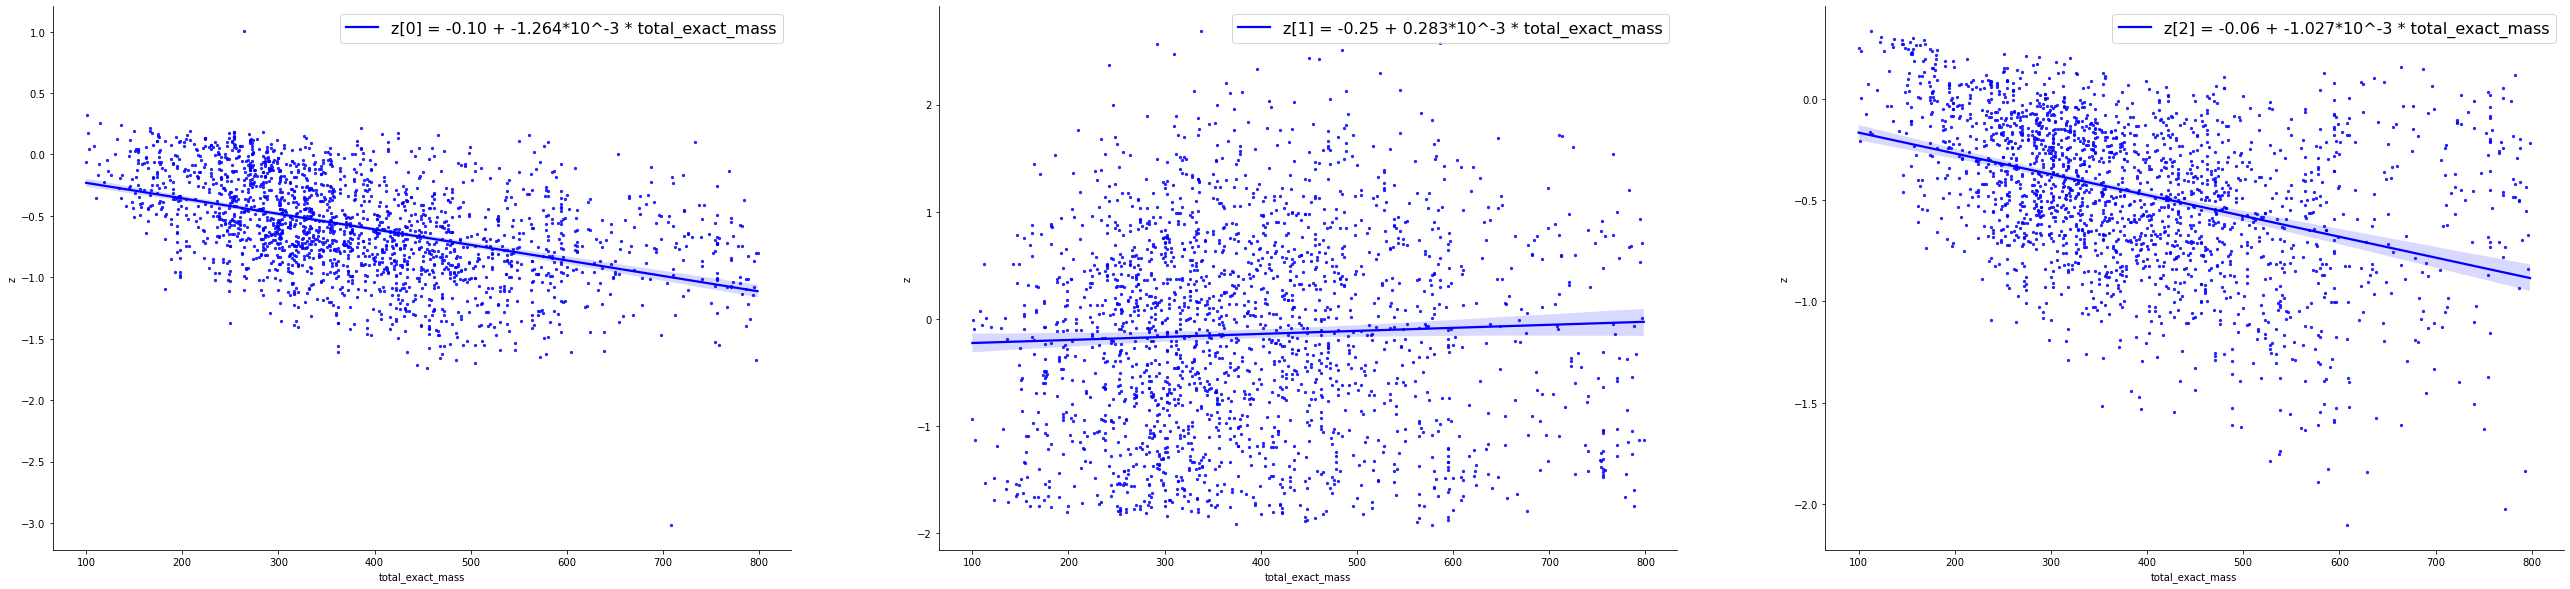

-------------------------------------------
d:\Workspace\SpecVAE\.model\MoNA\betavae_capacity_nextron\beta\betavae_capacity_100-1600-200-50-3-50-200-1600-100_04 (24-12-2021_09-29-36)
Encode N=2020 instances from MoNA dataset...
torch.Size([2020, 3])
collision_energy
r^2 1.7235308957808115e-08
RMSE 0.5241724901717993
explained variance 7.117885525431689e-08
Pearson nan
Spearman nan
-----------------
r^2 2.4960227773540566e-08
RMSE 0.06892836718321015
explained variance -8.394730244276616e-09
Pearson nan
Spearman nan
-----------------
r^2 -4.6642461004609e-09
RMSE 0.5223800269311212
explained variance -3.852154728534174e-08
Pearson nan
Spearman nan
-----------------


d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:187: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double

<Figure size 432x288 with 0 Axes>

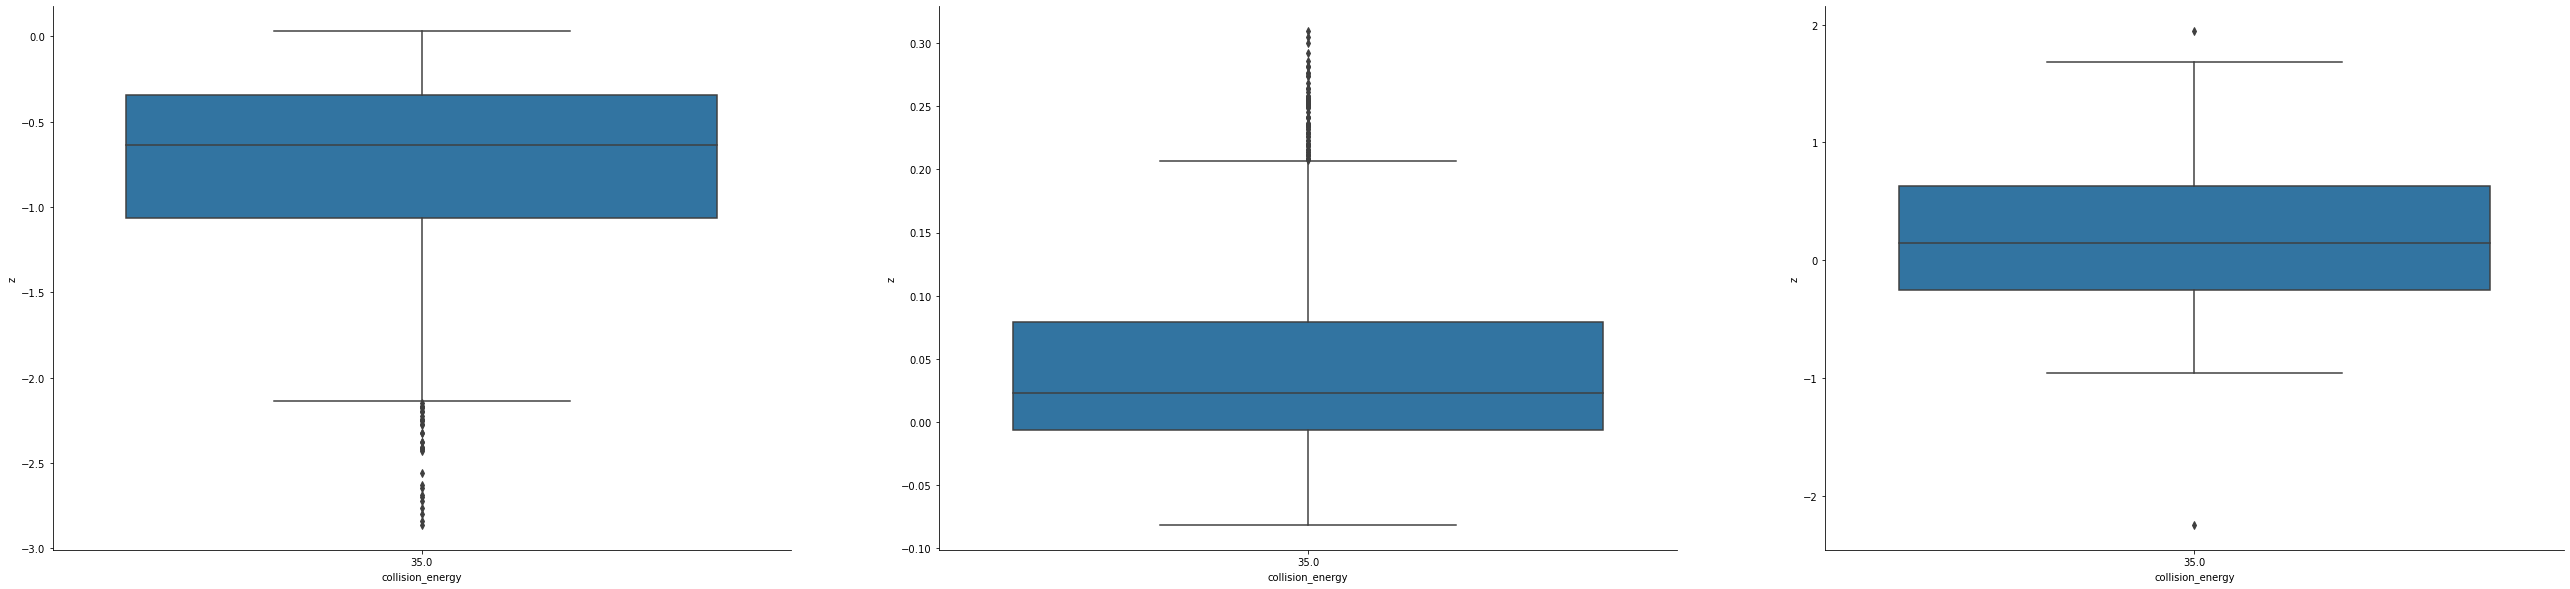

total_exact_mass
r^2 0.03018724788962268
RMSE 0.5162002057642239
explained variance 0.03018730020476279
Pearson -0.17374472991892523
Spearman -0.22705569366166364
-----------------
r^2 0.12815479191202195
RMSE 0.06436024499868441
explained variance 0.12815476283166094
Pearson -0.35798710891674074
Spearman -0.4016548487737466
-----------------
r^2 0.06390183378625969
RMSE 0.5054139906124394
explained variance 0.06390180209250218
Pearson 0.25278812897850256
Spearman 0.24818640631073888
-----------------


<Figure size 432x288 with 0 Axes>

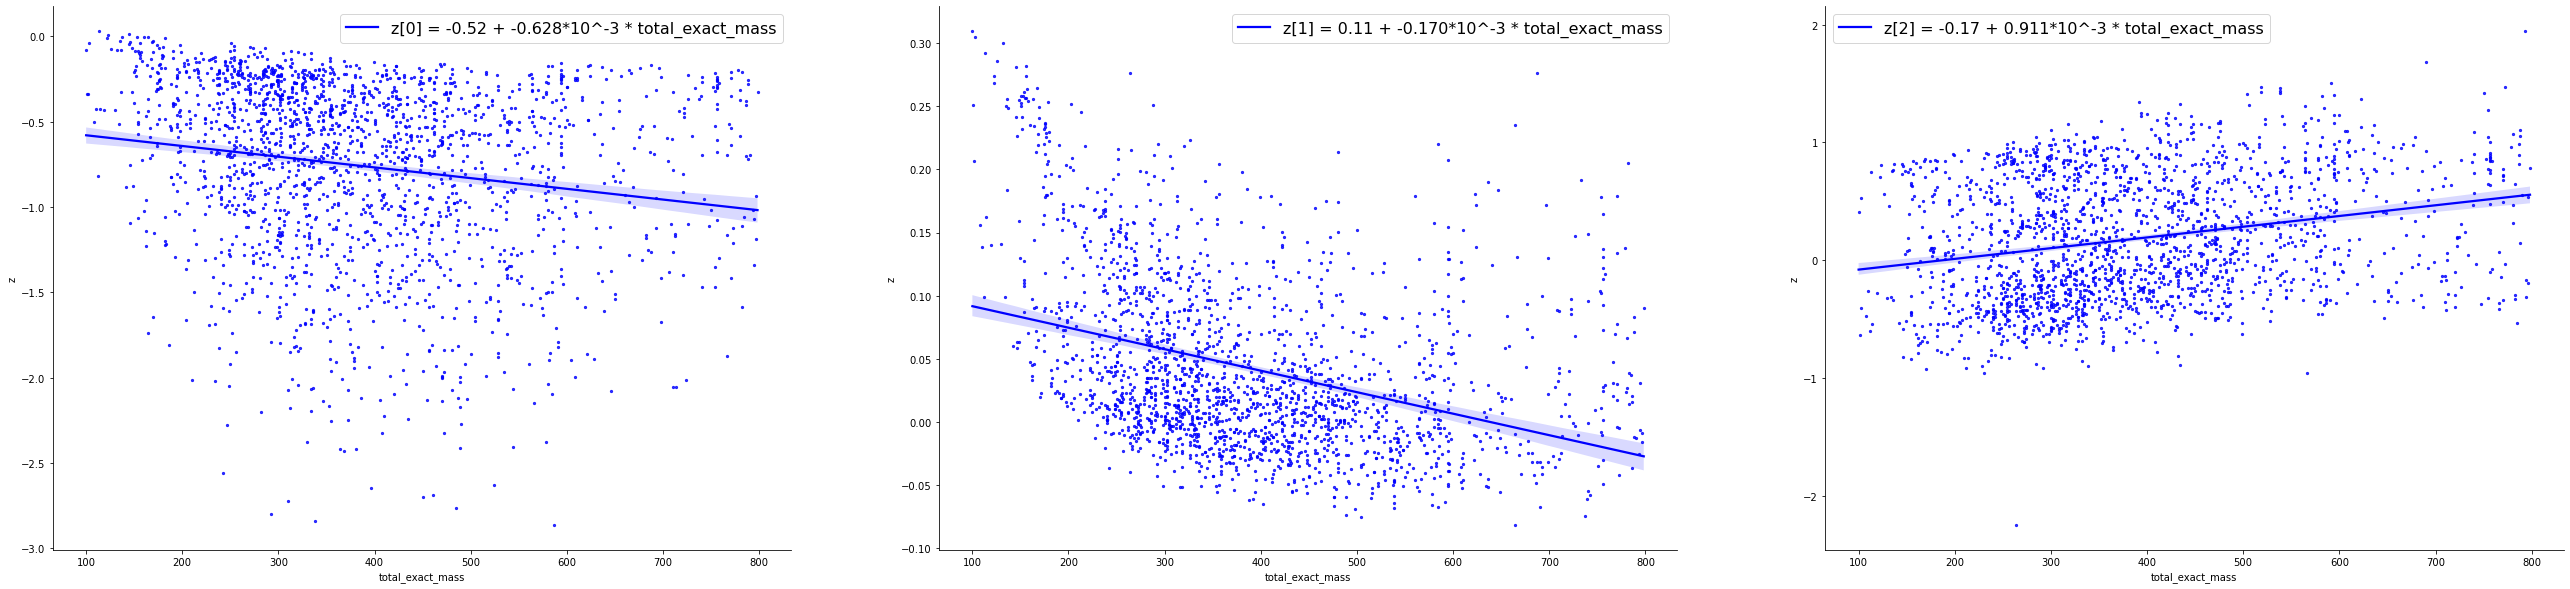

-------------------------------------------
d:\Workspace\SpecVAE\.model\MoNA\betavae_capacity_nextron\beta\betavae_capacity_100-1600-200-50-3-50-200-1600-100_05 (24-12-2021_09-06-14)
Encode N=2020 instances from MoNA dataset...
torch.Size([2020, 3])
collision_energy
r^2 -2.731850301529448e-09
RMSE 0.5167635207564404
explained variance -8.22594830029999e-08
Pearson nan
Spearman nan
-----------------
r^2 5.337601471921971e-09
RMSE 0.266386036198035
explained variance -2.895975015348995e-09
Pearson nan
Spearman nan
-----------------
r^2 -8.072156276739406e-10
RMSE 0.005022425340842254
explained variance -3.11676371378411e-08
Pearson nan
Spearman nan
-----------------


d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:187: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double

<Figure size 432x288 with 0 Axes>

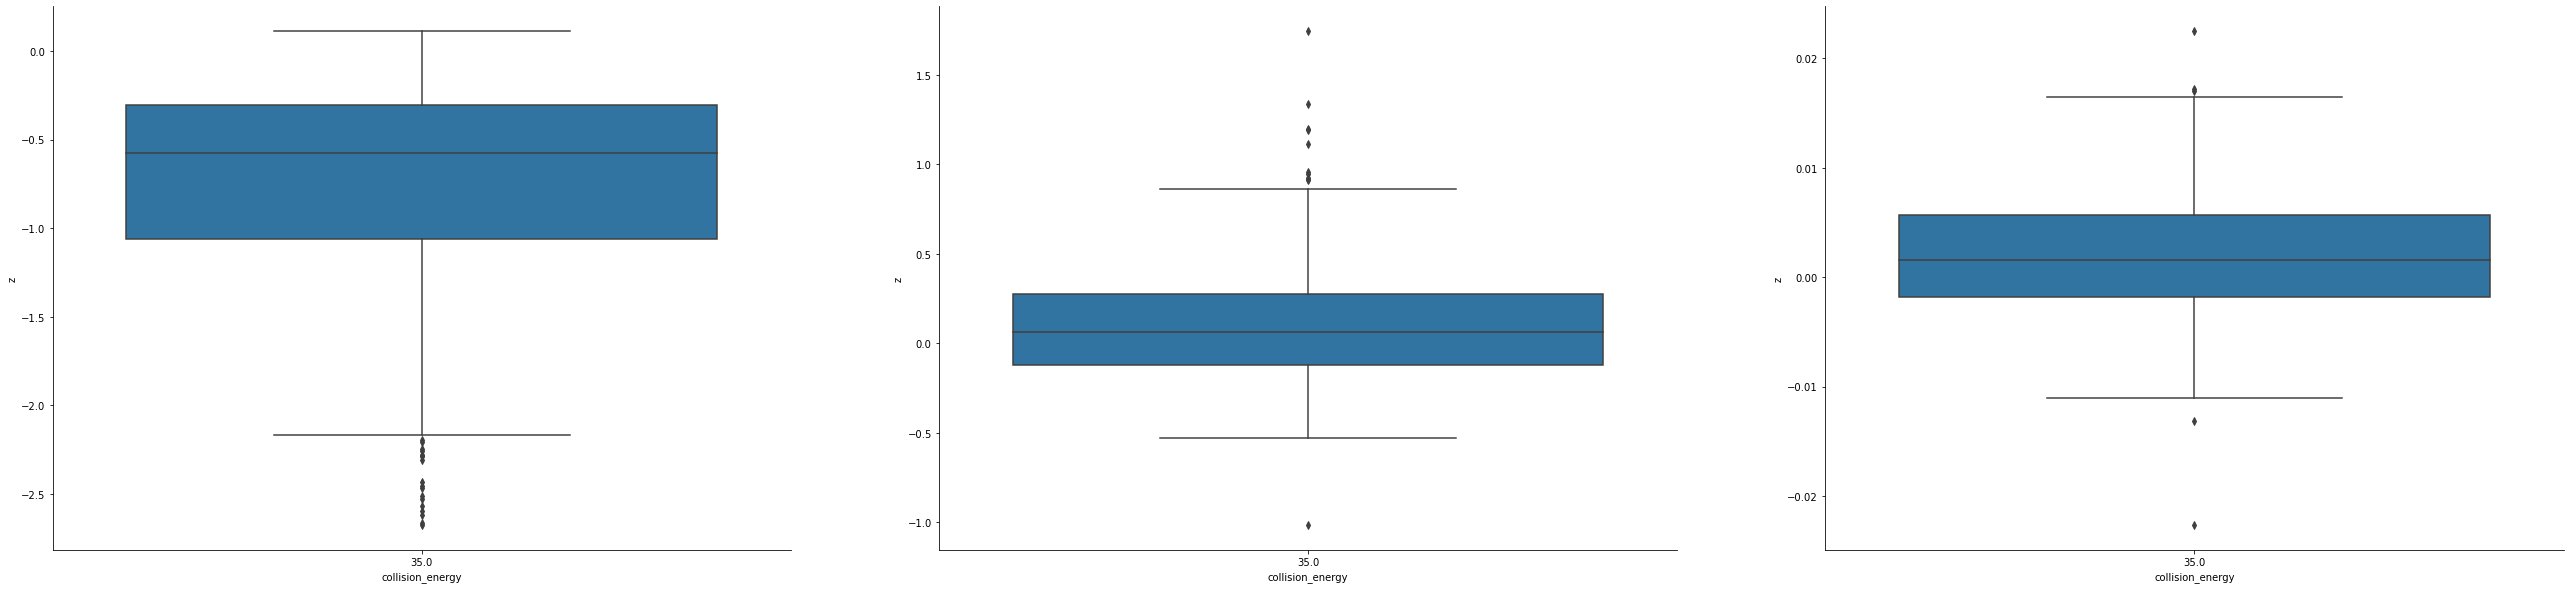

total_exact_mass
r^2 0.024464701193467553
RMSE 0.5104031454496698
explained variance 0.024464623611455072
Pearson -0.15641196839910965
Spearman -0.21851025947328
-----------------
r^2 0.12950171891125006
RMSE 0.24853949738025646
explained variance 0.129501711743936
Pearson 0.3598634661435875
Spearman 0.3492616966477554
-----------------
r^2 0.10282884595637709
RMSE 0.0047571970429824365
explained variance 0.10282881871788285
Pearson 0.32066937284466046
Spearman 0.30847730182702554
-----------------


<Figure size 432x288 with 0 Axes>

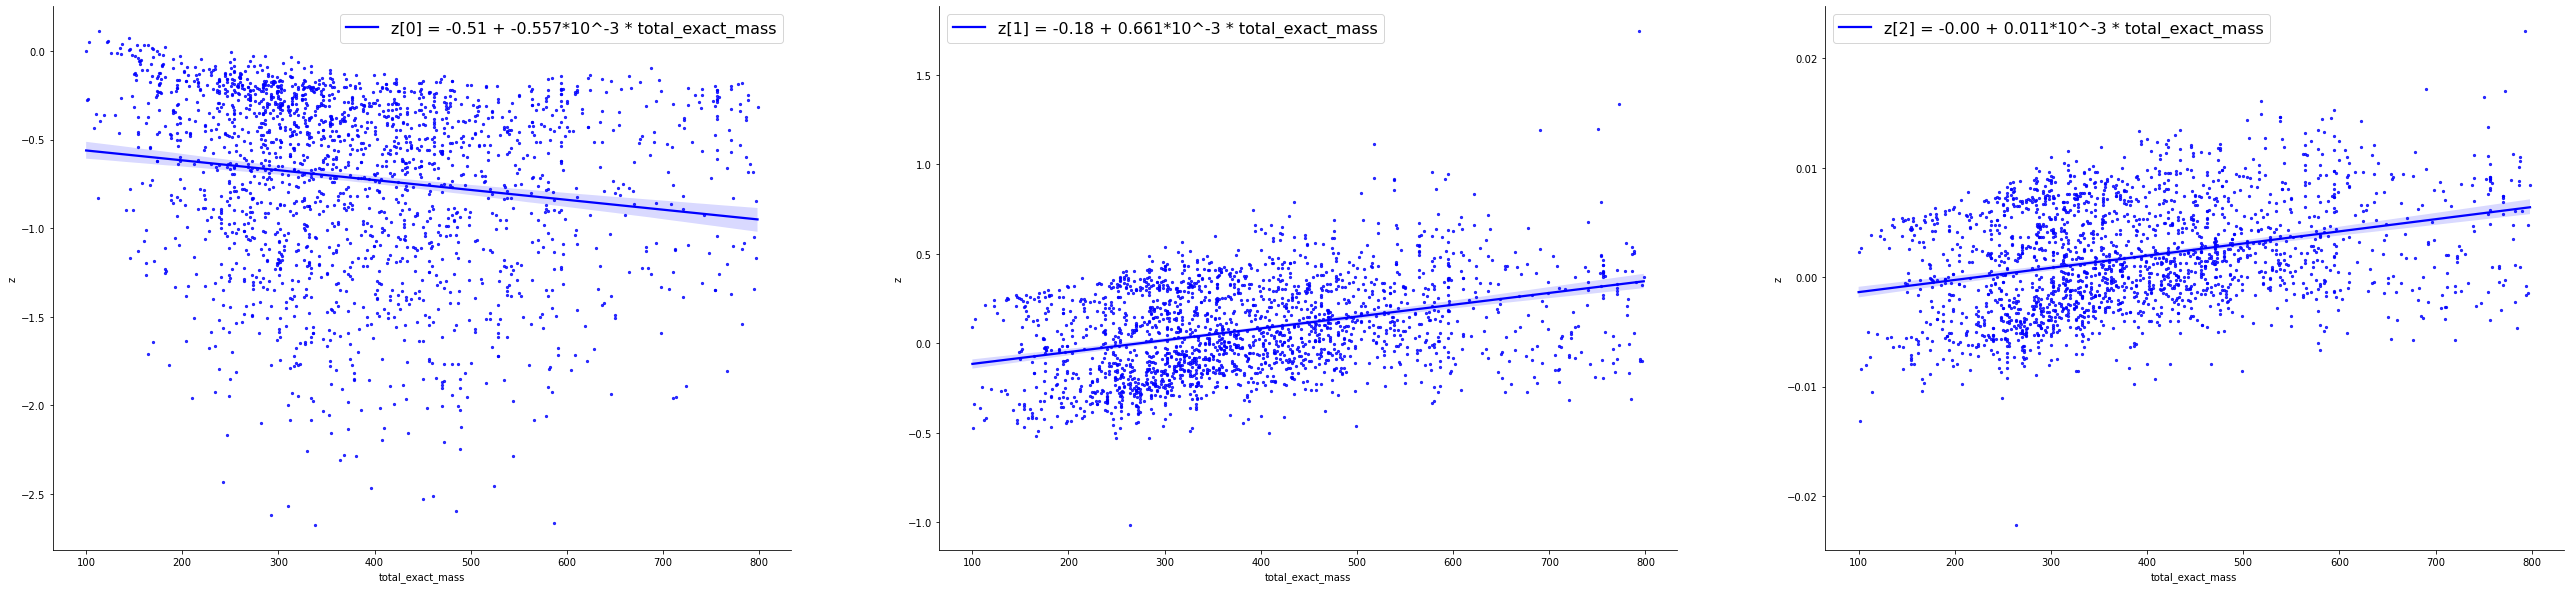

-------------------------------------------
d:\Workspace\SpecVAE\.model\MoNA\betavae_capacity_nextron\beta\betavae_capacity_100-1600-200-50-3-50-200-1600-100_06 (24-12-2021_09-05-10)
Encode N=2020 instances from MoNA dataset...
torch.Size([2020, 3])
collision_energy
r^2 -2.5925022351103166e-08
RMSE 0.006721220655493831
explained variance -3.400042025702987e-08
Pearson nan
Spearman nan
-----------------
r^2 4.7443513562228645e-09
RMSE 0.002071929663549238
explained variance 5.2055799781847156e-08
Pearson nan
Spearman nan
-----------------
r^2 2.4442340373909133e-09
RMSE 0.5322316435398884
explained variance -5.060269914203275e-08
Pearson nan
Spearman nan
-----------------


d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:187: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double

<Figure size 432x288 with 0 Axes>

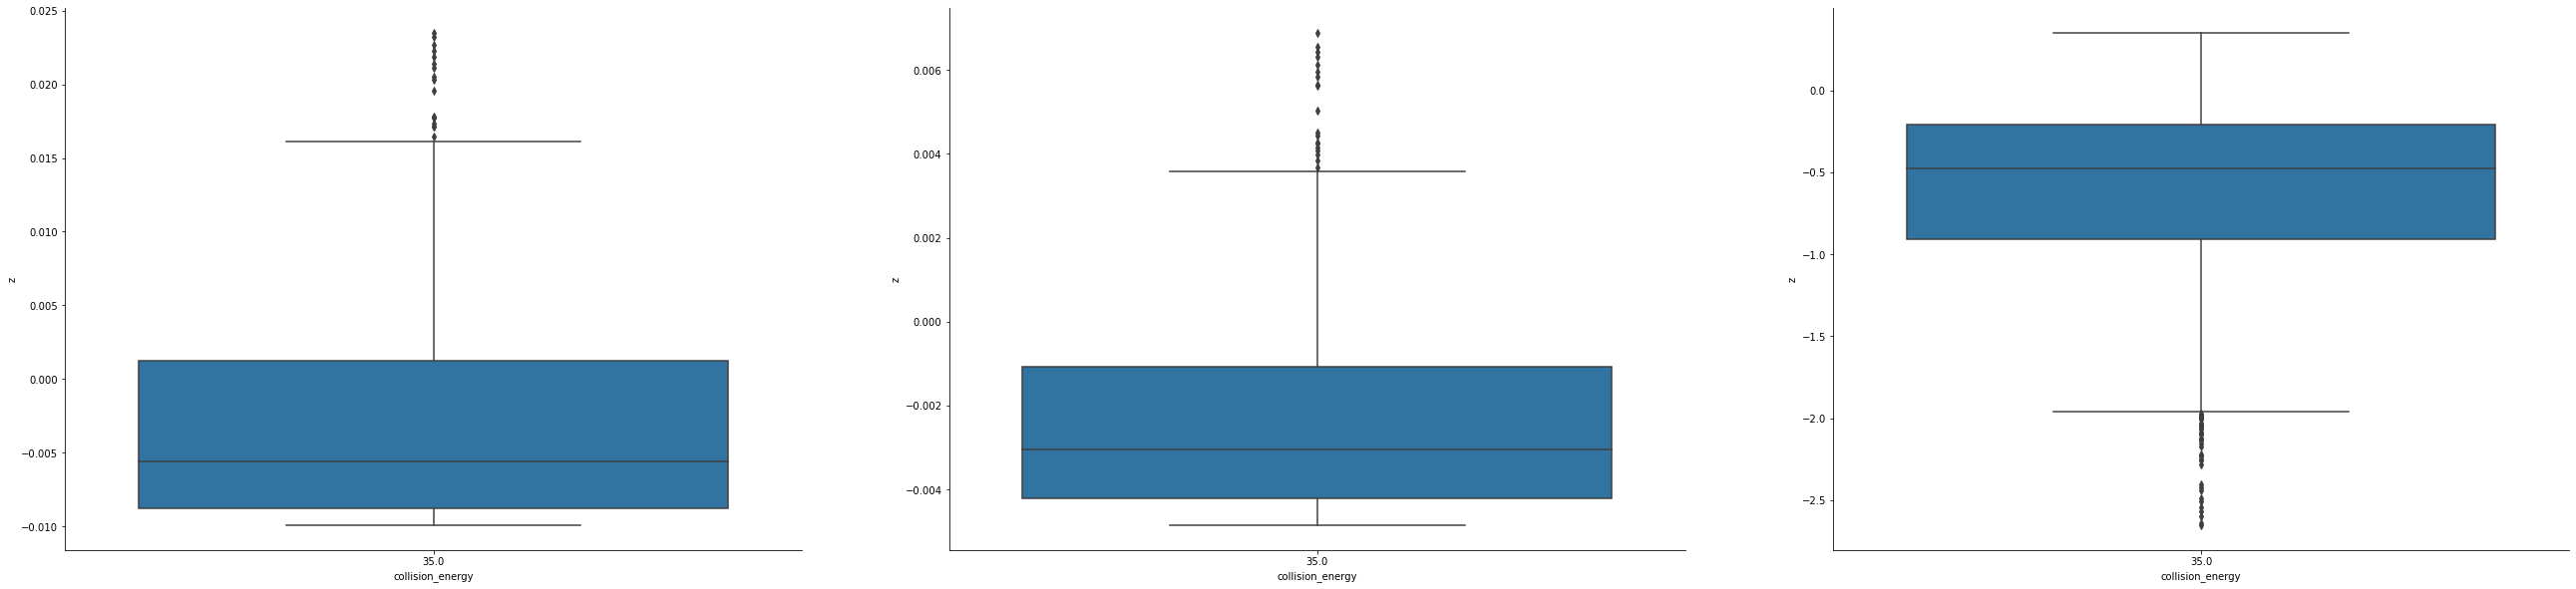

total_exact_mass
r^2 0.013215037885437986
RMSE 0.006676662276681685
explained variance 0.013215029916756937
Pearson 0.11495678956833985
Spearman 0.1338472294911072
-----------------
r^2 0.020762989878398308
RMSE 0.002050307115159944
explained variance 0.020763036207519625
Pearson 0.14409366825975967
Spearman 0.18793065998725328
-----------------
r^2 0.03029183636575683
RMSE 0.5241085181002526
explained variance 0.030291784925712495
Pearson -0.17404549403981423
Spearman -0.2397147572213658
-----------------


<Figure size 432x288 with 0 Axes>

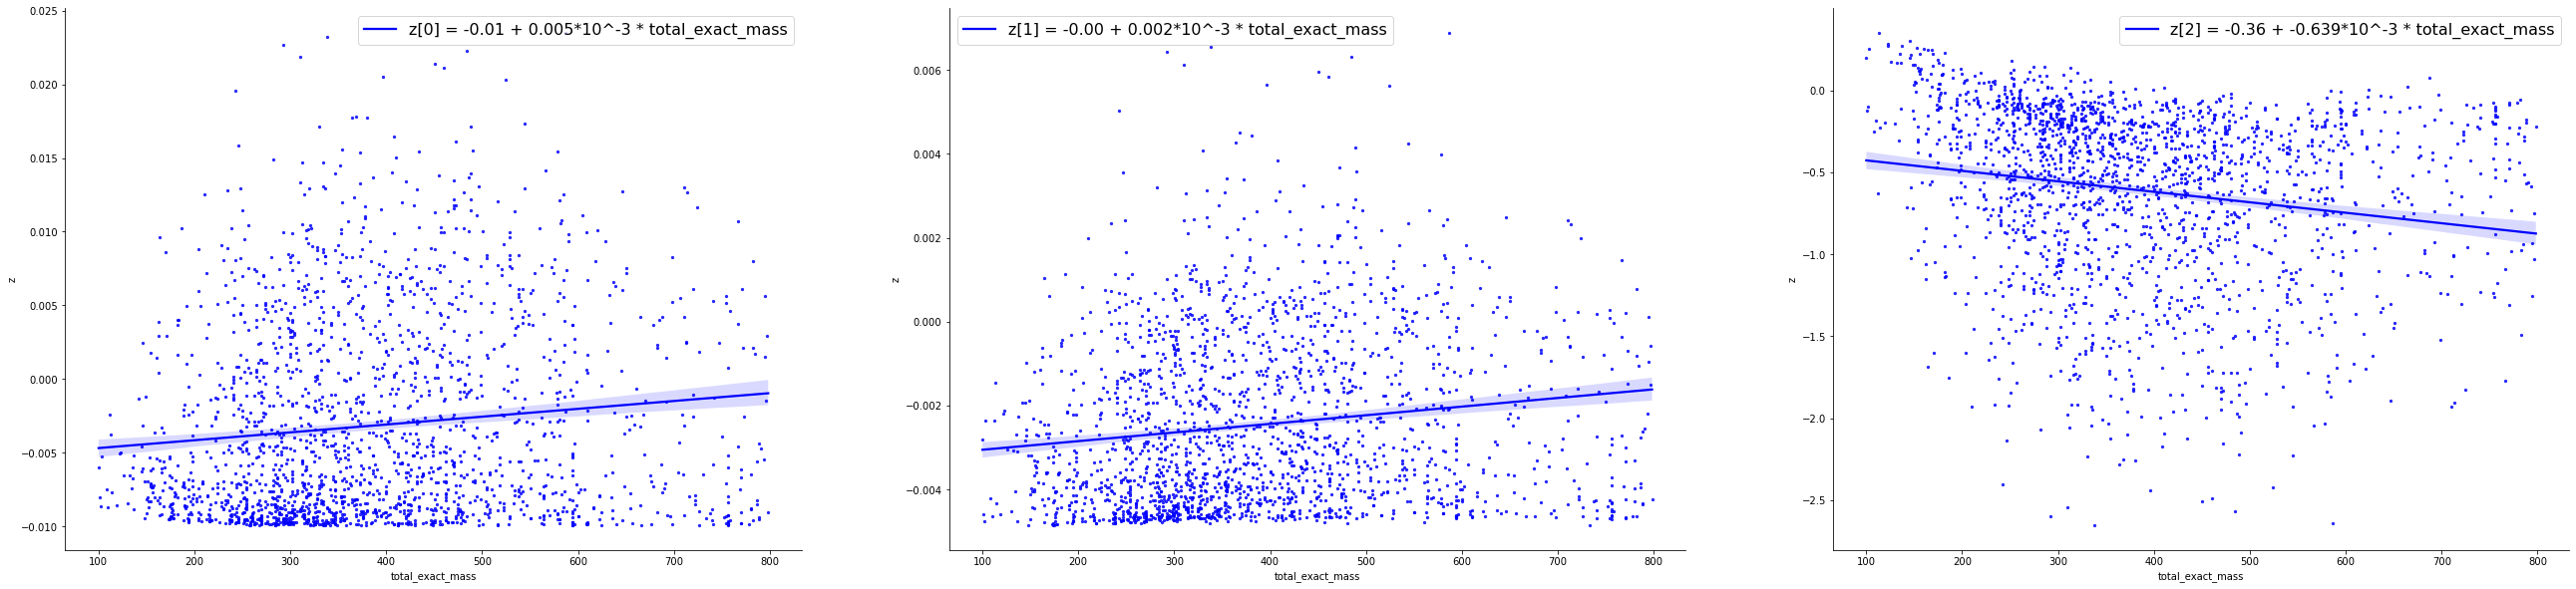

-------------------------------------------
d:\Workspace\SpecVAE\.model\MoNA\betavae_capacity_nextron\betavae_score\betavae_capacity_100-400-100-3-400-100_01 (24-12-2021_11-06-17)
Encode N=2020 instances from MoNA dataset...
torch.Size([2020, 3])
collision_energy
r^2 1.1448291203919325e-09
RMSE 0.9496722590600737
explained variance -6.206346281345532e-08
Pearson nan
Spearman nan
-----------------
r^2 -2.589102043870639e-08
RMSE 0.34657070373220583
explained variance 3.457135111517573e-08
Pearson nan
Spearman nan
-----------------
r^2 -1.0922913684652258e-09
RMSE 0.3791727176699963
explained variance -1.2725853637540752e-07
Pearson nan
Spearman nan
-----------------


d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:187: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double

<Figure size 432x288 with 0 Axes>

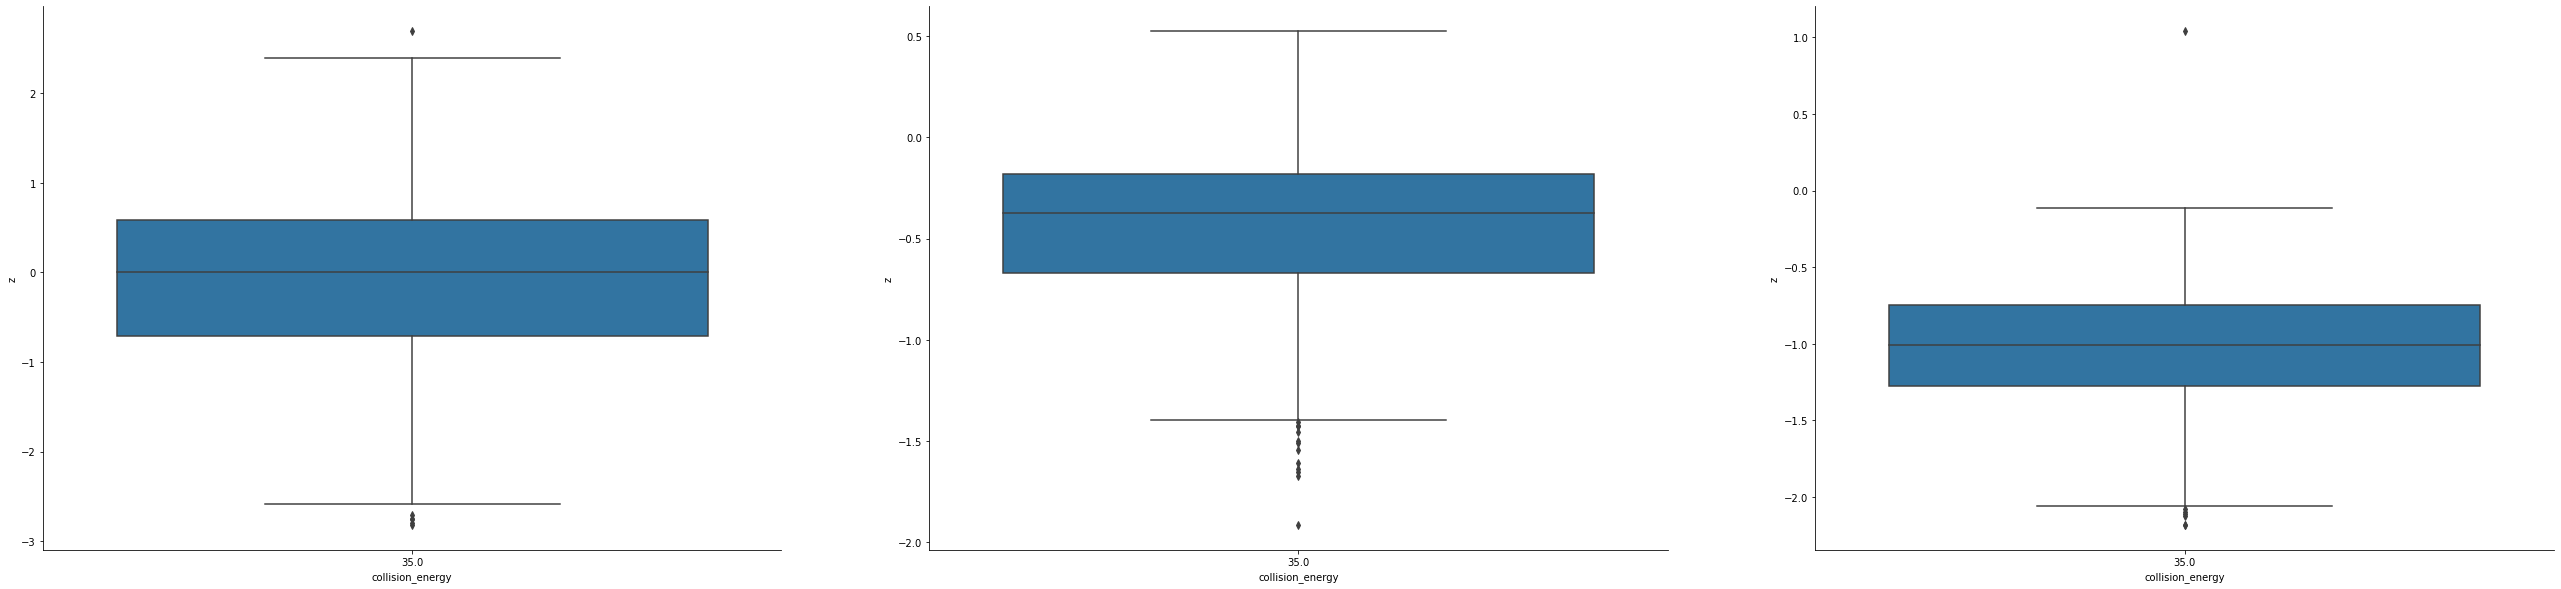

total_exact_mass
r^2 0.01578798552932592
RMSE 0.9421457282766297
explained variance 0.01578792331896539
Pearson 0.12565024632913124
Spearman 0.1430118110780733
-----------------
r^2 0.2971785514771361
RMSE 0.29054562879285933
explained variance 0.2971785939713868
Pearson 0.5451408714028882
Spearman 0.5890722585364071
-----------------
r^2 0.016989219875928163
RMSE 0.3759379954238541
explained variance 0.016989095853149228
Pearson 0.13034270577850643
Spearman 0.1317327161697762
-----------------


<Figure size 432x288 with 0 Axes>

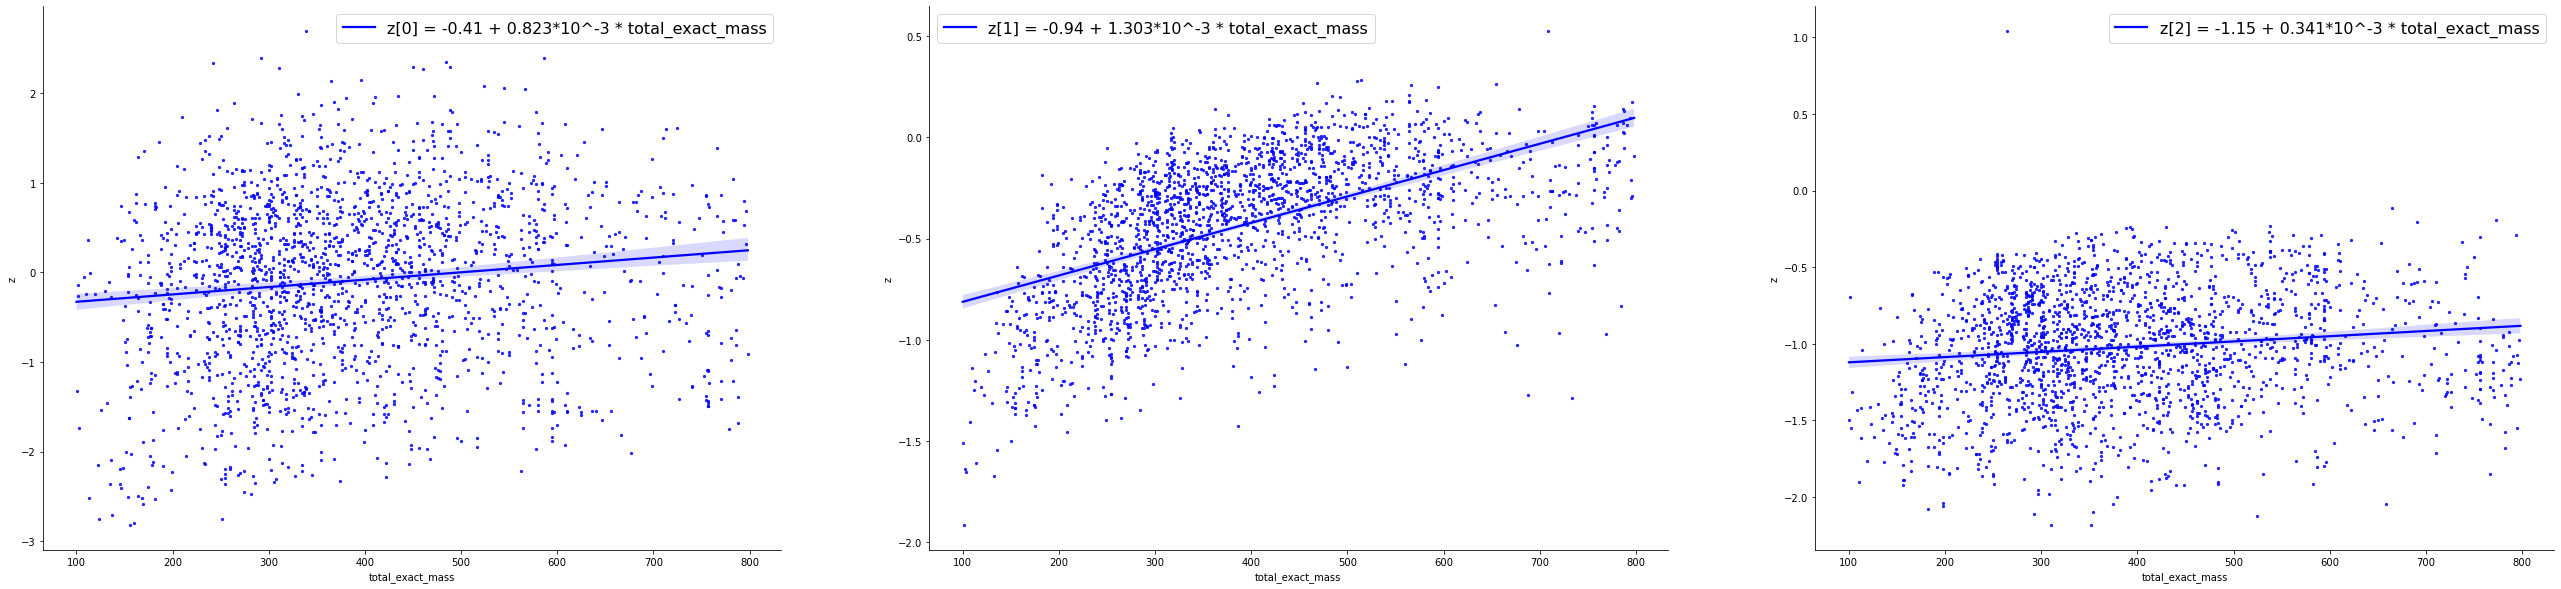

-------------------------------------------
d:\Workspace\SpecVAE\.model\MoNA\betavae_capacity_nextron\betavae_score\betavae_capacity_100-800-100-3-800-100_02 (24-12-2021_10-59-29)
Encode N=2020 instances from MoNA dataset...
torch.Size([2020, 3])
collision_energy
r^2 -7.644120669780818e-09
RMSE 0.37896445211905744
explained variance -1.56231303449772e-08
Pearson nan
Spearman nan
-----------------
r^2 -5.618870035917212e-09
RMSE 0.9716767595767878
explained variance 2.918713060129363e-08
Pearson nan
Spearman nan
-----------------
r^2 5.40974087748225e-09
RMSE 0.7172091485612855
explained variance -8.5350509326787e-08
Pearson nan
Spearman nan
-----------------


d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:187: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double

<Figure size 432x288 with 0 Axes>

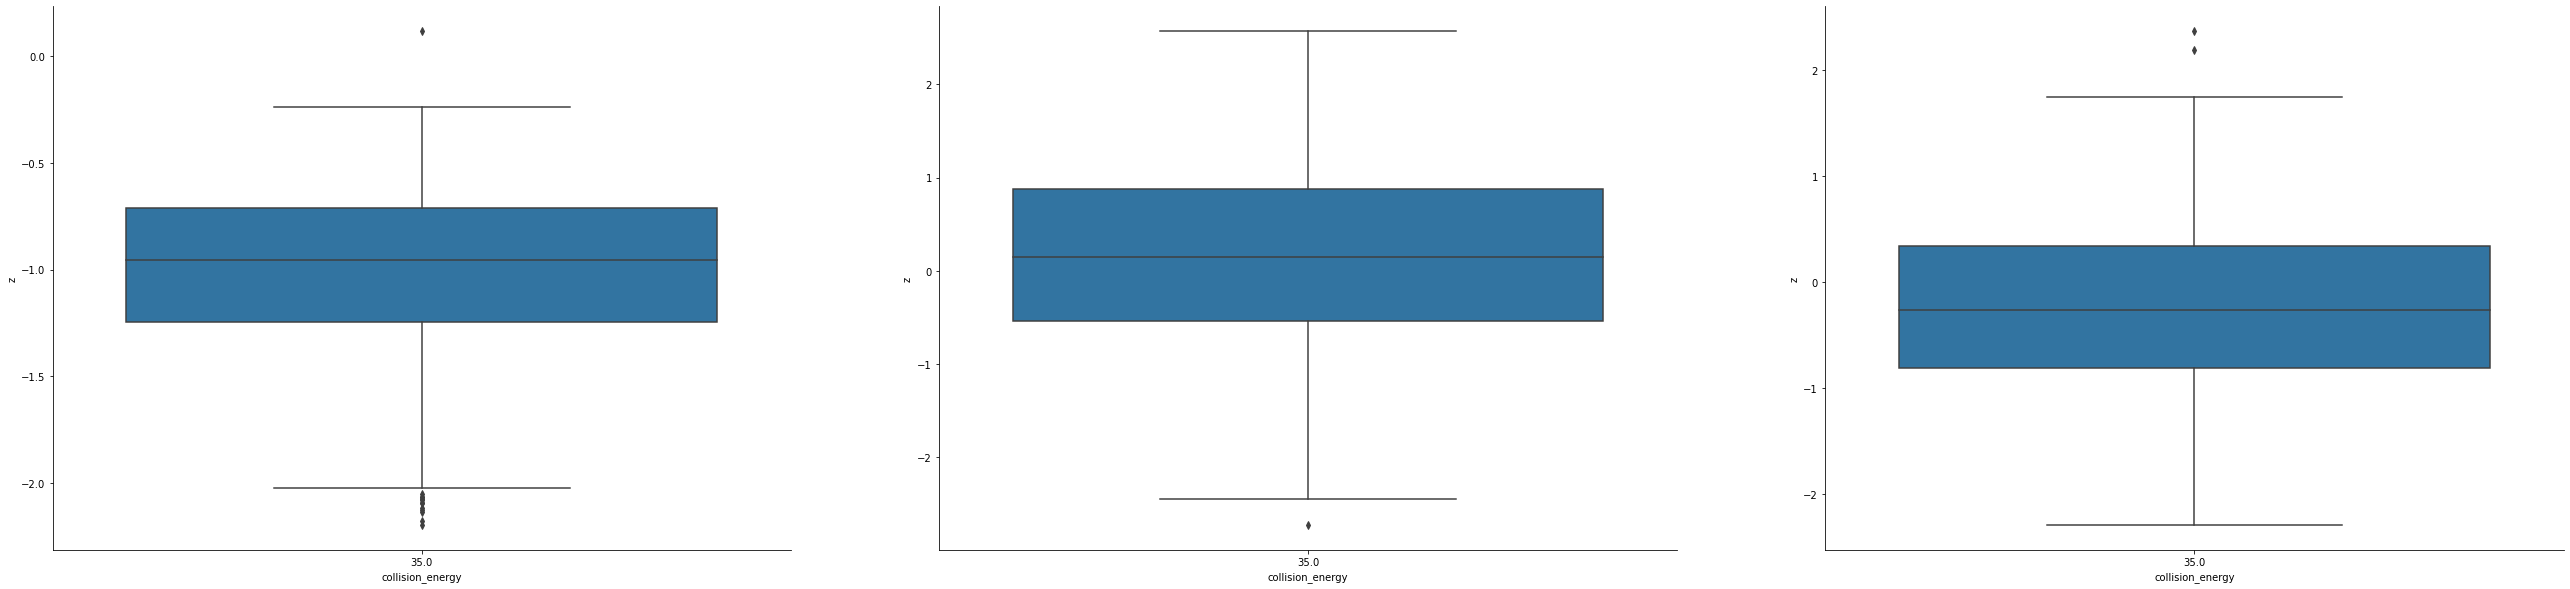

total_exact_mass
r^2 0.037214440958276085
RMSE 0.3718461215426054
explained variance 0.037214433276200776
Pearson 0.19291046710307125
Spearman 0.20194821669958188
-----------------
r^2 0.031071879941588887
RMSE 0.9564617225089959
explained variance 0.031071913666101403
Pearson -0.17627219118700996
Spearman -0.1950614938993849
-----------------
r^2 0.17556303169250265
RMSE 0.651215232699109
explained variance 0.17556295686639667
Pearson -0.4190024191248926
Spearman -0.43618821289674525
-----------------


<Figure size 432x288 with 0 Axes>

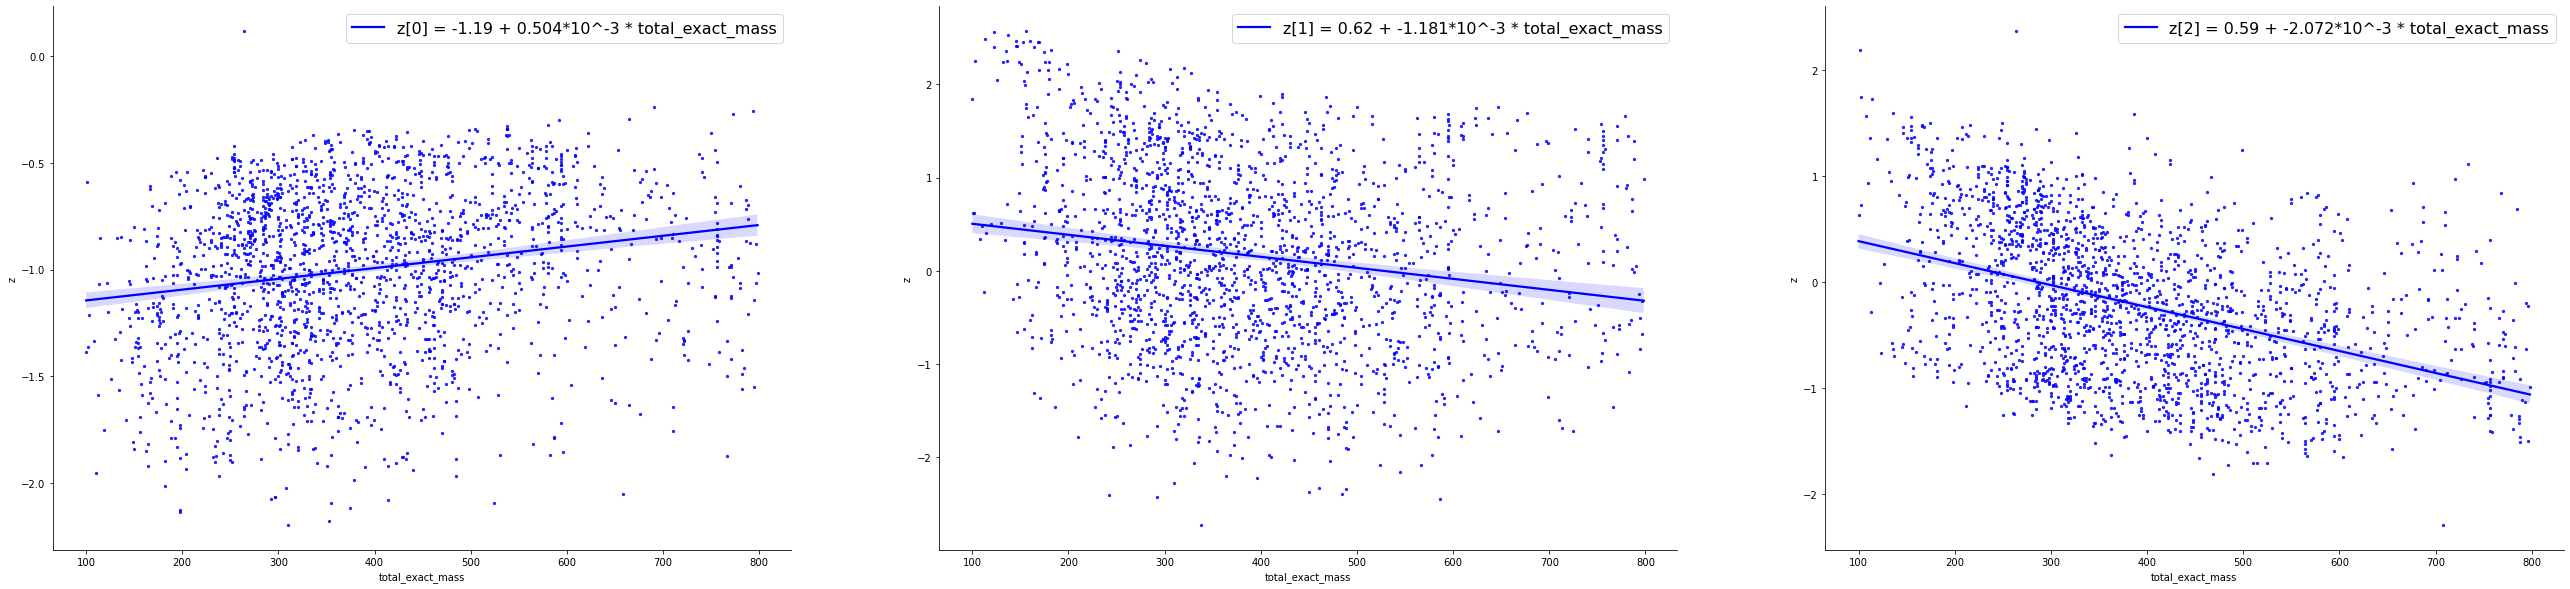

-------------------------------------------
d:\Workspace\SpecVAE\.model\MoNA\betavae_capacity_nextron\betavae_score\betavae_capacity_100-400-200-50-3-50-200-400-100_03 (24-12-2021_09-47-19)
Encode N=2020 instances from MoNA dataset...
torch.Size([2020, 3])
collision_energy
r^2 5.524619650643103e-10
RMSE 0.39394038723622254
explained variance 5.559138216426618e-08
Pearson nan
Spearman nan
-----------------
r^2 -3.450831753681882e-08
RMSE 0.3712022821567741
explained variance -5.306525197035228e-08
Pearson nan
Spearman nan
-----------------
r^2 -1.251015069314576e-09
RMSE 0.9628091423506911
explained variance 3.418955540901436e-08
Pearson nan
Spearman nan
-----------------


d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:187: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double

<Figure size 432x288 with 0 Axes>

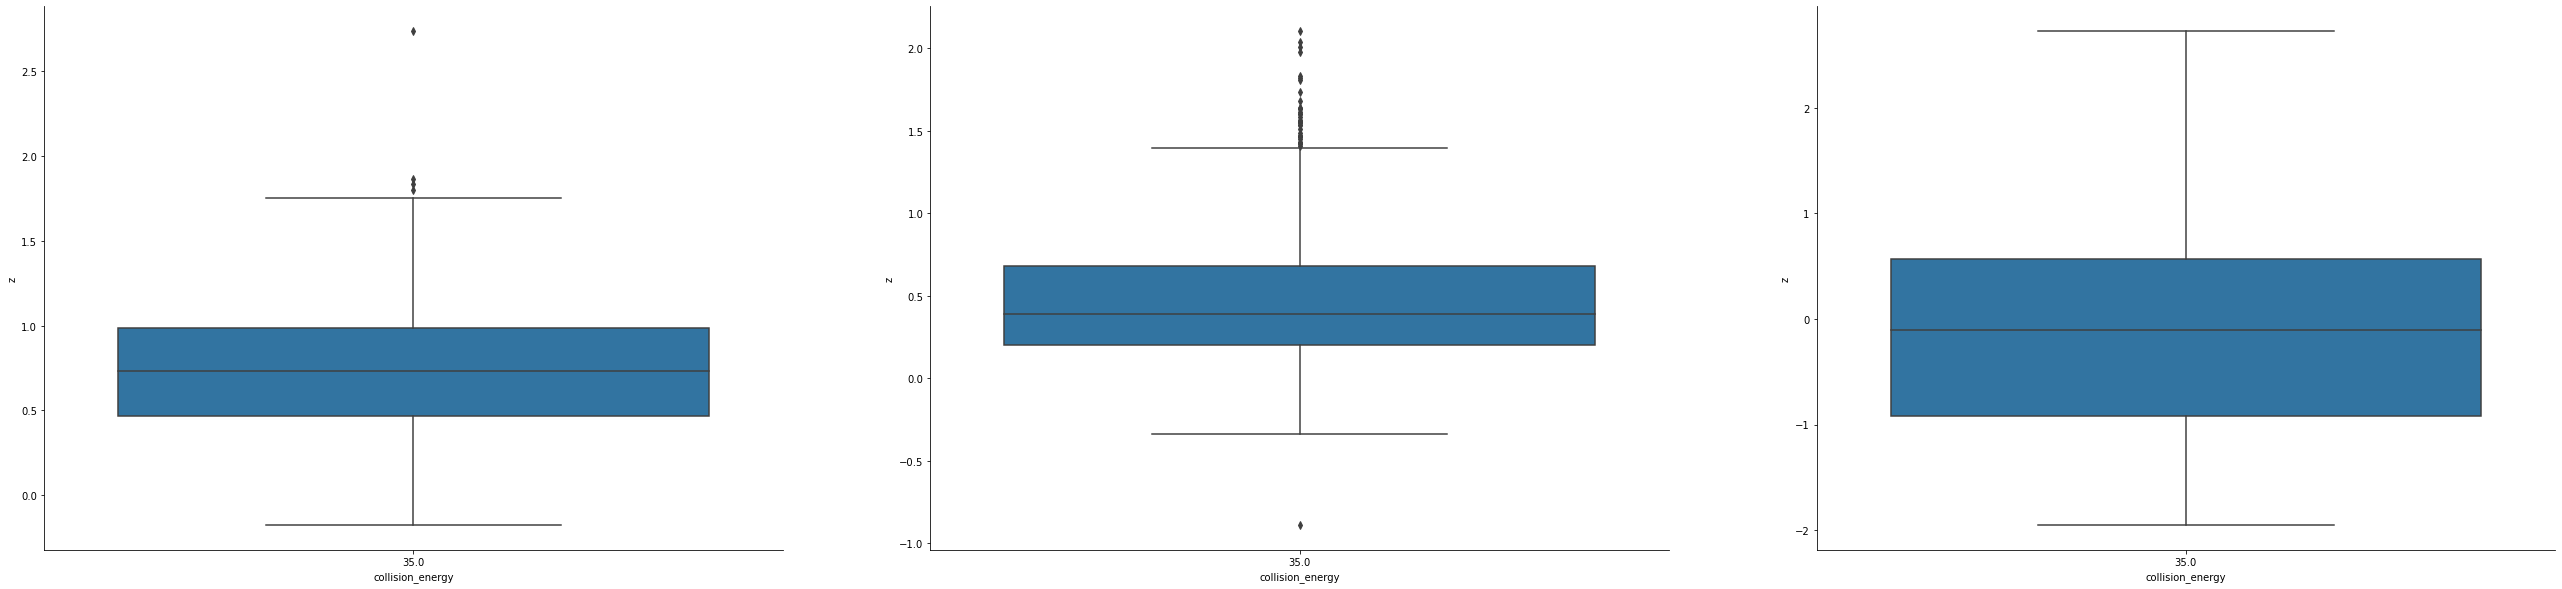

total_exact_mass
r^2 0.07721568198649542
RMSE 0.37842568898975515
explained variance 0.07721573277554794
Pearson 0.2778770977908981
Spearman 0.3172923175810199
-----------------
r^2 0.27757783395716296
RMSE 0.315504938553781
explained variance 0.2775778205512226
Pearson 0.5268565828446443
Spearman 0.5742015936233861
-----------------
r^2 0.003317404471161467
RMSE 0.9612108013860218
explained variance 0.0033174397941612144
Pearson 0.05759692455354254
Spearman 0.08098337296902282
-----------------


<Figure size 432x288 with 0 Axes>

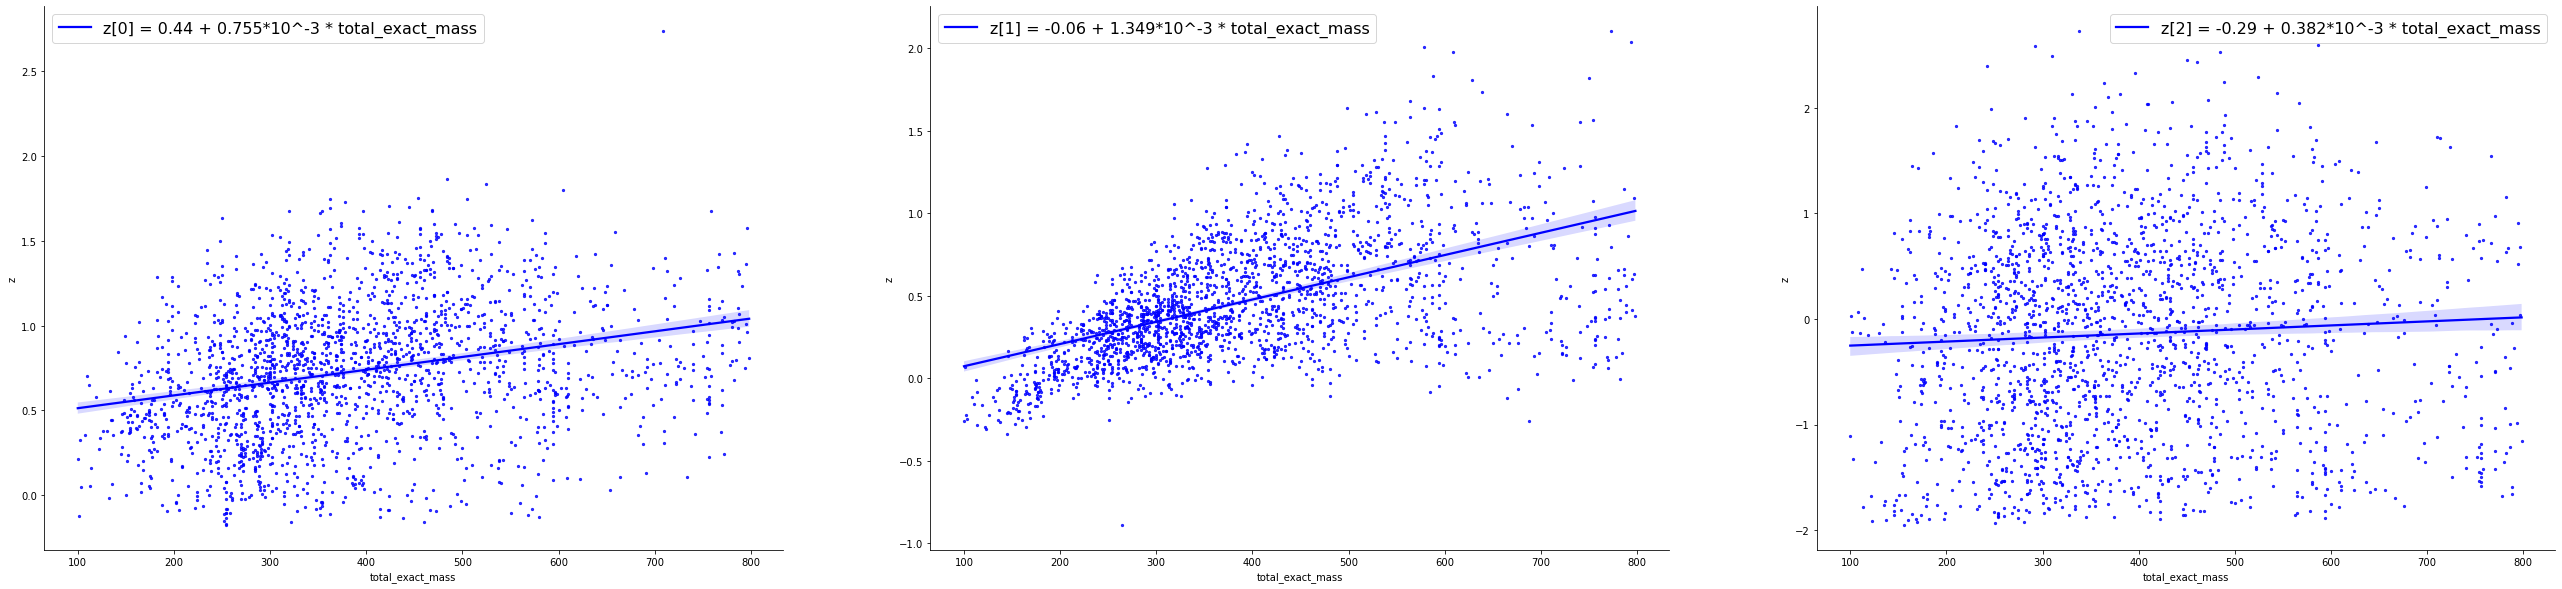

-------------------------------------------
d:\Workspace\SpecVAE\.model\MoNA\betavae_capacity_nextron\betavae_score\betavae_capacity_100-1600-3-1600-100_04 (24-12-2021_08-02-44)
Encode N=2020 instances from MoNA dataset...
torch.Size([2020, 3])
collision_energy
r^2 -1.7453098966058178e-09
RMSE 0.5006161964004462
explained variance 1.655688131041444e-08
Pearson nan
Spearman nan
-----------------
r^2 9.599339101384885e-10
RMSE 0.7234964015113673
explained variance -1.1952944634074925e-08
Pearson nan
Spearman nan
-----------------
r^2 -1.1465888016815029e-08
RMSE 0.12764011728275243
explained variance 3.986427421498462e-08
Pearson nan
Spearman nan
-----------------


d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:187: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double

<Figure size 432x288 with 0 Axes>

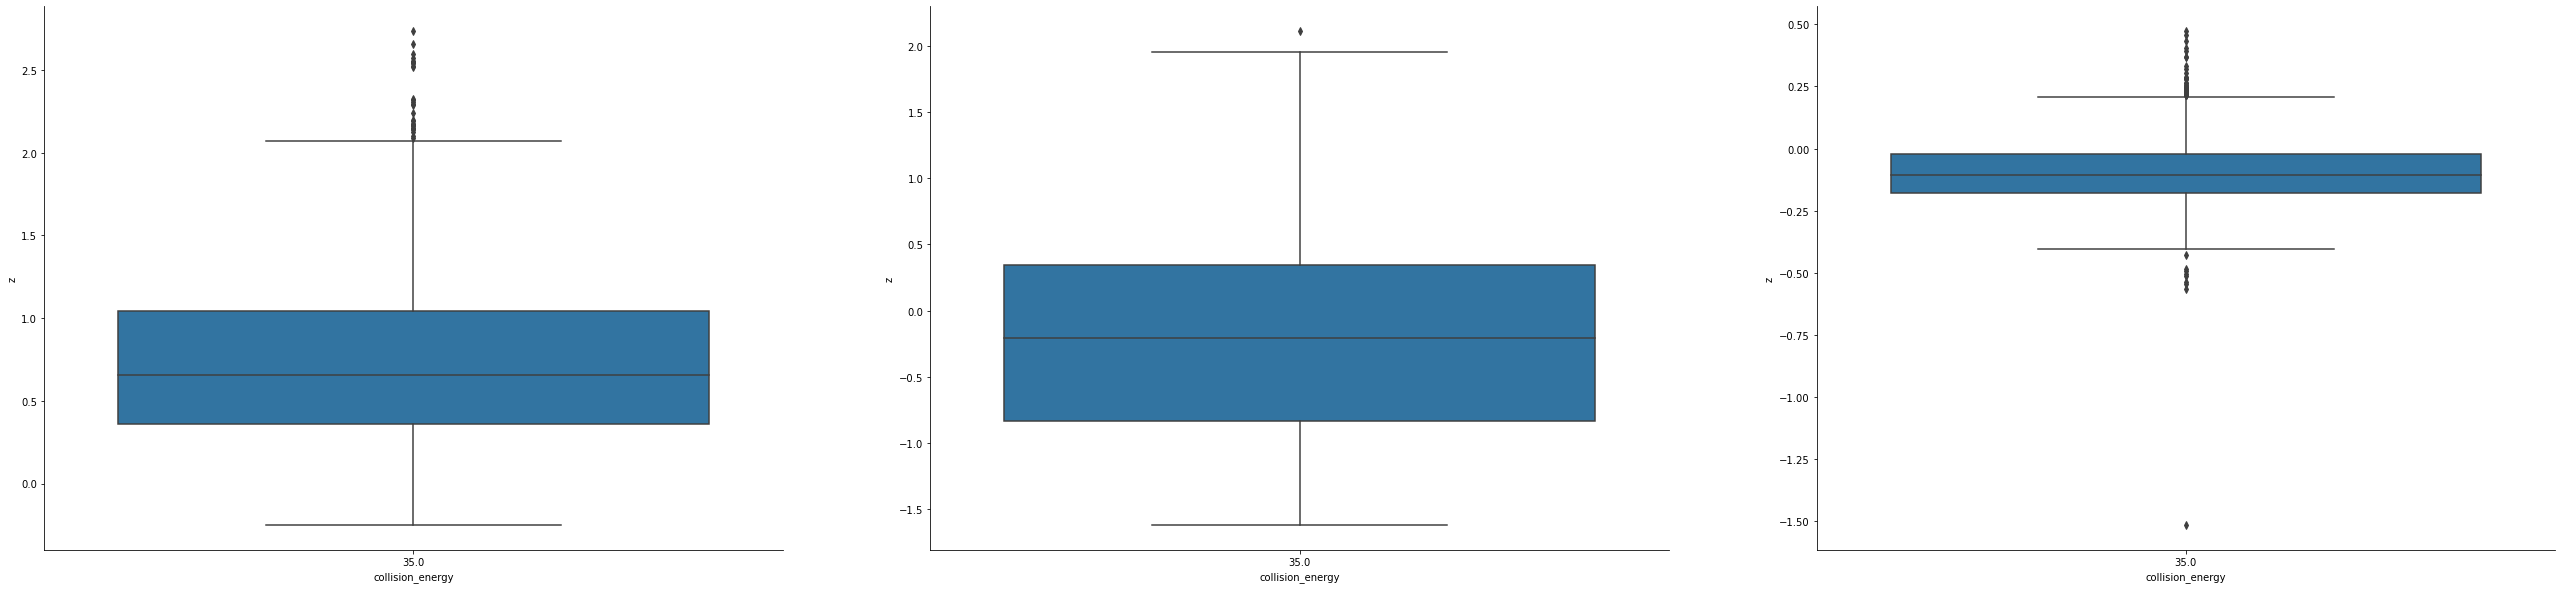

total_exact_mass
r^2 0.06736980109210078
RMSE 0.48345898151588657
explained variance 0.06736981816127707
Pearson 0.25955693541076796
Spearman 0.3106631114079365
-----------------
r^2 0.009686333584385642
RMSE 0.7199838615033309
explained variance 0.009686320796585601
Pearson -0.09841916802000546
Spearman -0.08357250993520207
-----------------
r^2 0.02539156556223887
RMSE 0.12600920594717288
explained variance 0.025391615589047345
Pearson 0.15934734618747126
Spearman 0.19950869618109882
-----------------


<Figure size 432x288 with 0 Axes>

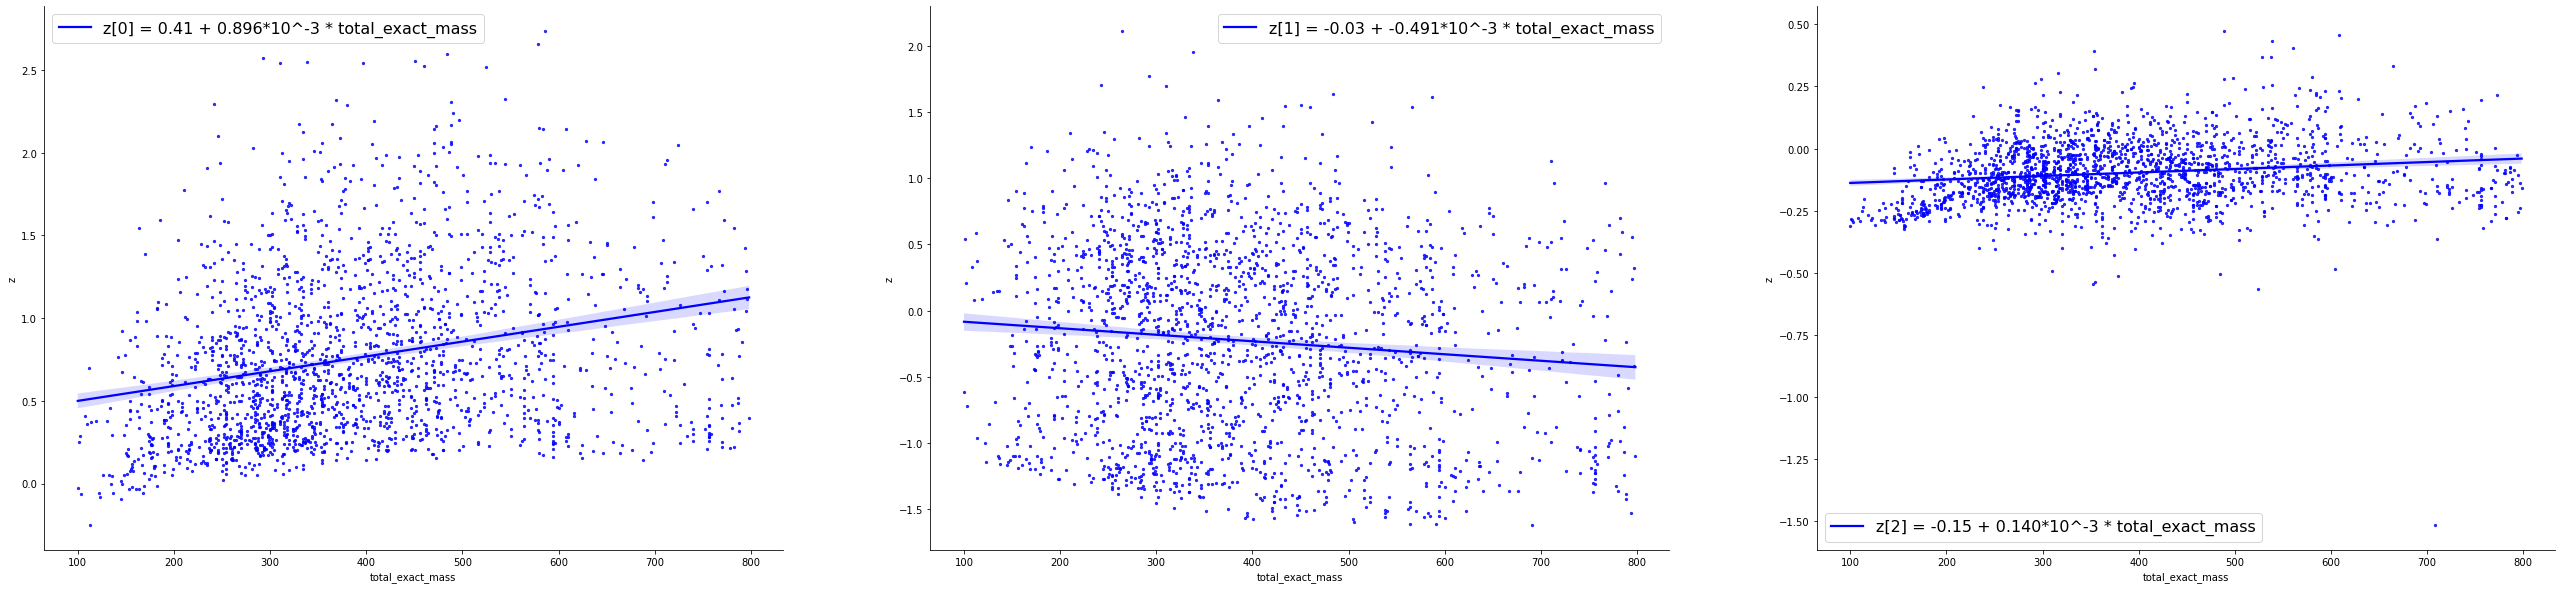

-------------------------------------------
d:\Workspace\SpecVAE\.model\MoNA\betavae_capacity_nextron\betavae_score\betavae_capacity_100-400-100-3-400-100_05 (24-12-2021_10-57-01)
Encode N=2020 instances from MoNA dataset...
torch.Size([2020, 3])
collision_energy
r^2 1.7059998969060075e-09
RMSE 0.5563992987912569
explained variance 8.778219584559821e-08
Pearson nan
Spearman nan
-----------------
r^2 2.7970413762901103e-09
RMSE 0.2830884970874378
explained variance 4.203167913718886e-08
Pearson nan
Spearman nan
-----------------
r^2 2.703778312351801e-10
RMSE 0.0052383411076949524
explained variance 5.712315731543072e-08
Pearson nan
Spearman nan
-----------------


d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:187: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double

<Figure size 432x288 with 0 Axes>

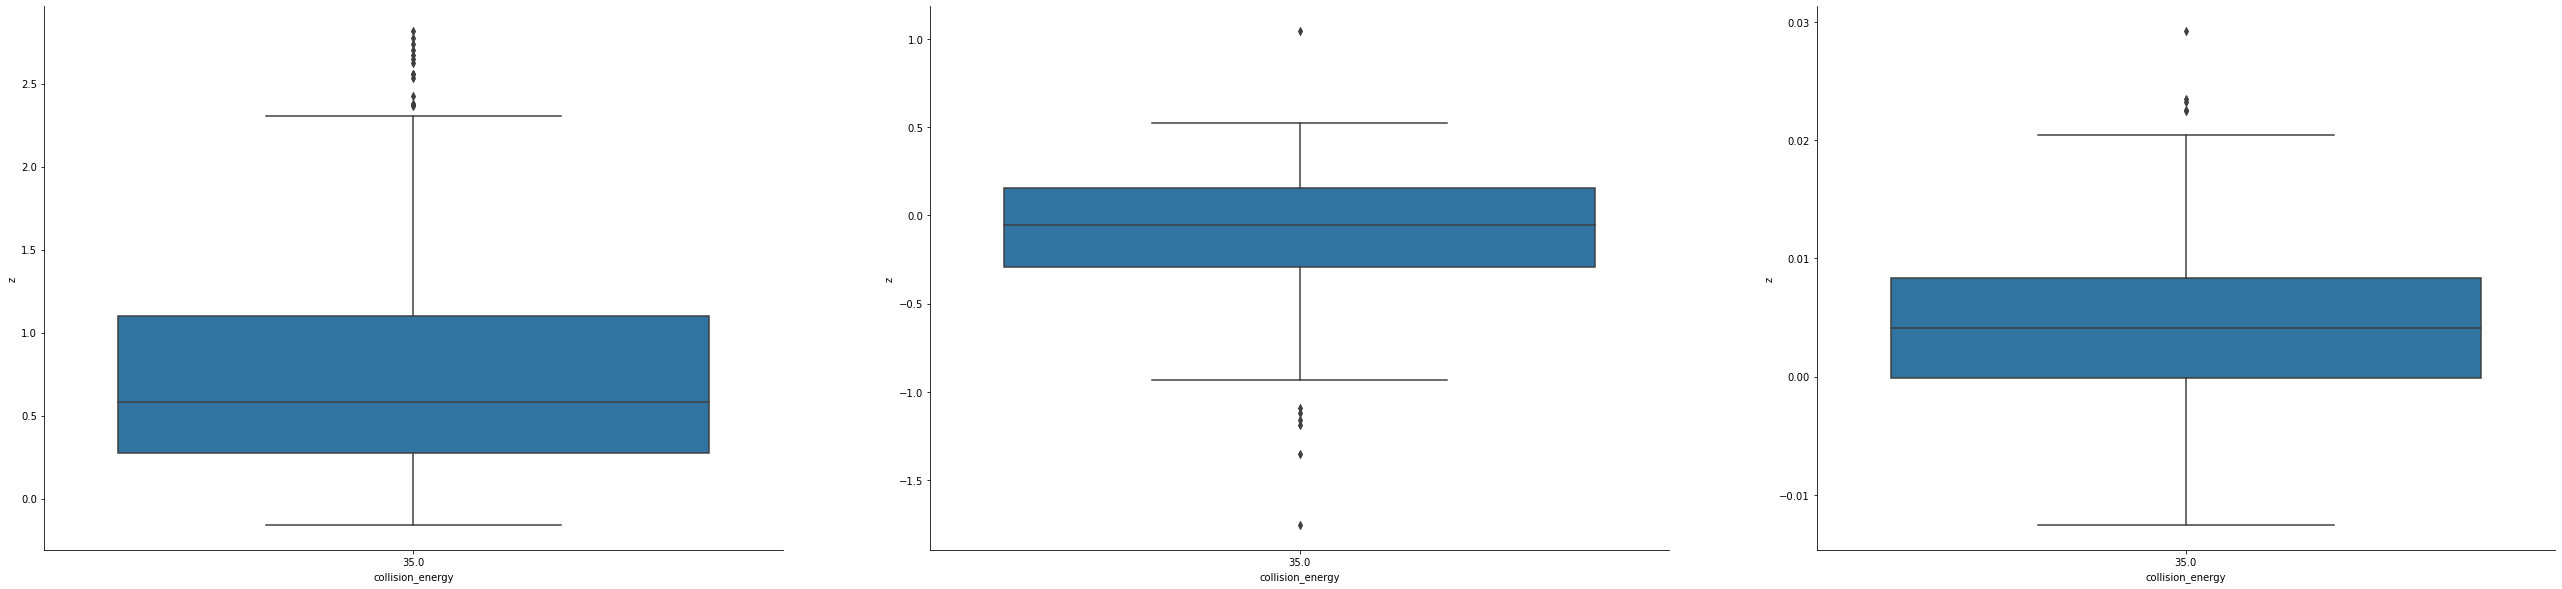

total_exact_mass
r^2 0.020201745436497
RMSE 0.550750506337021
explained variance 0.020201829773803914
Pearson 0.14213283844685967
Spearman 0.20511632148516637
-----------------
r^2 0.11424980438838206
RMSE 0.2664267651808323
explained variance 0.11424983914047038
Pearson -0.3380085825994691
Spearman -0.3320525701809953
-----------------
r^2 0.13363840258285786
RMSE 0.0048757718082037315
explained variance 0.1336384518379229
Pearson 0.36556586595114826
Spearman 0.3699862494827164
-----------------


<Figure size 432x288 with 0 Axes>

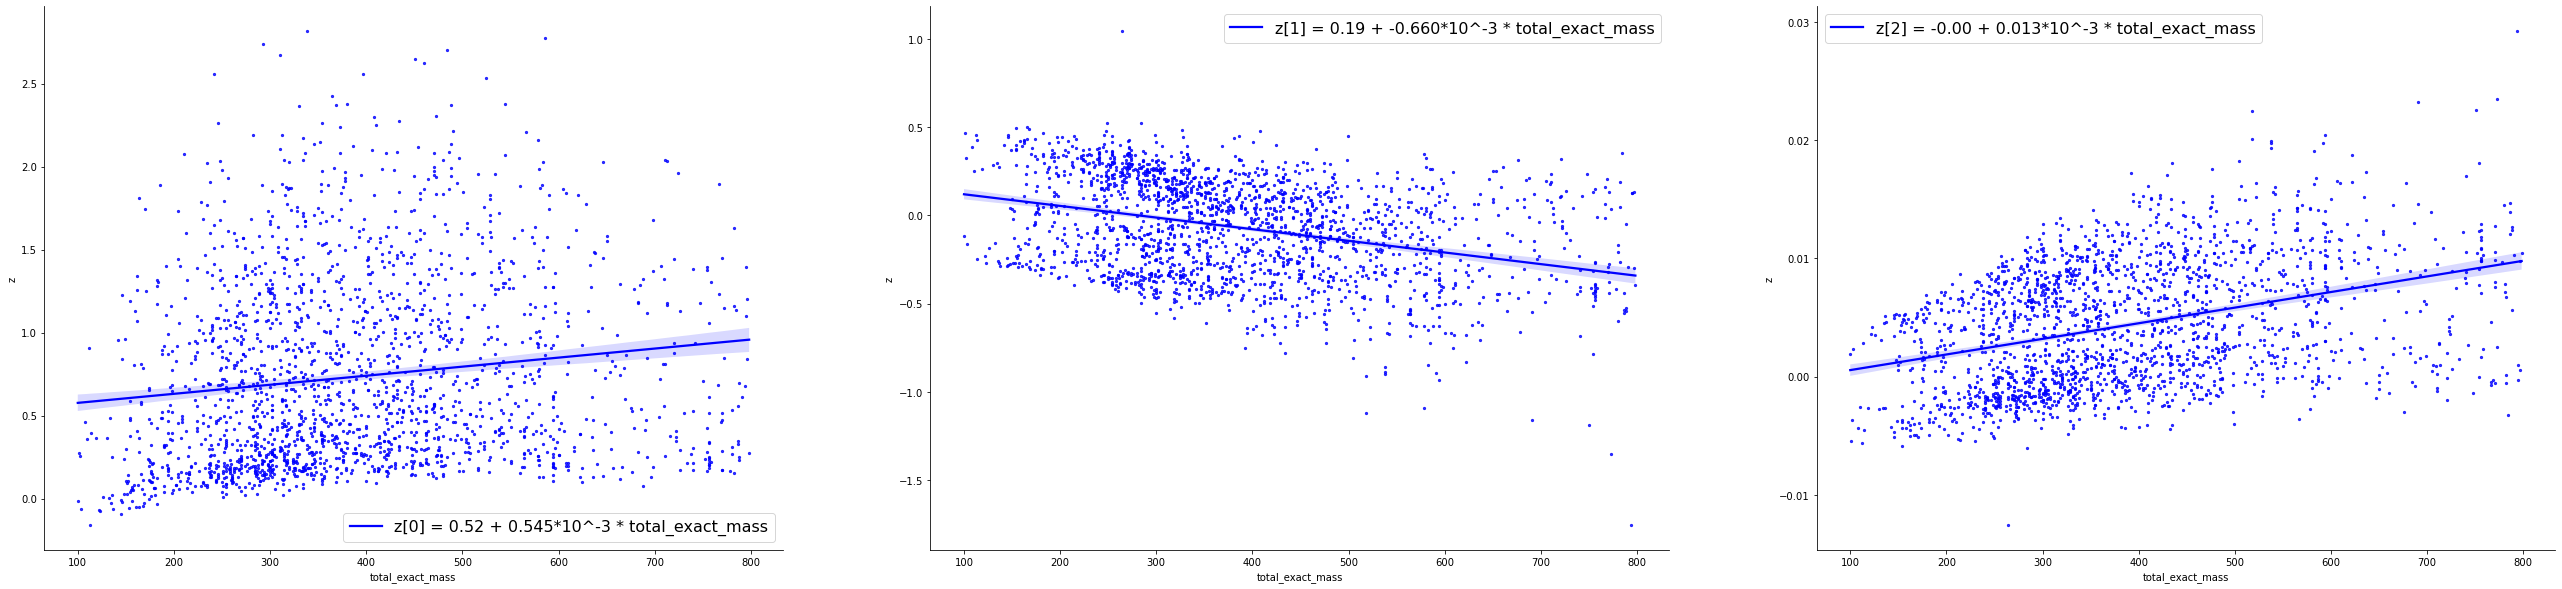

-------------------------------------------
d:\Workspace\SpecVAE\.model\MoNA\betavae_capacity_nextron\betavae_score\betavae_capacity_100-400-100-3-100-400-100_06 (24-12-2021_08-41-33)
Encode N=2020 instances from MoNA dataset...
torch.Size([2020, 3])
collision_energy
r^2 -1.1152351708787478e-08
RMSE 0.5094651228082928
explained variance -1.0477918754858706e-07
Pearson nan
Spearman nan
-----------------
r^2 4.5837340589827136e-09
RMSE 0.0034353416856058015
explained variance -1.436039620550389e-08
Pearson nan
Spearman nan
-----------------
r^2 -1.3691114908453983e-10
RMSE 0.006307373968703753
explained variance -4.8544401831662753e-08
Pearson nan
Spearman nan
-----------------


d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:187: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double

<Figure size 432x288 with 0 Axes>

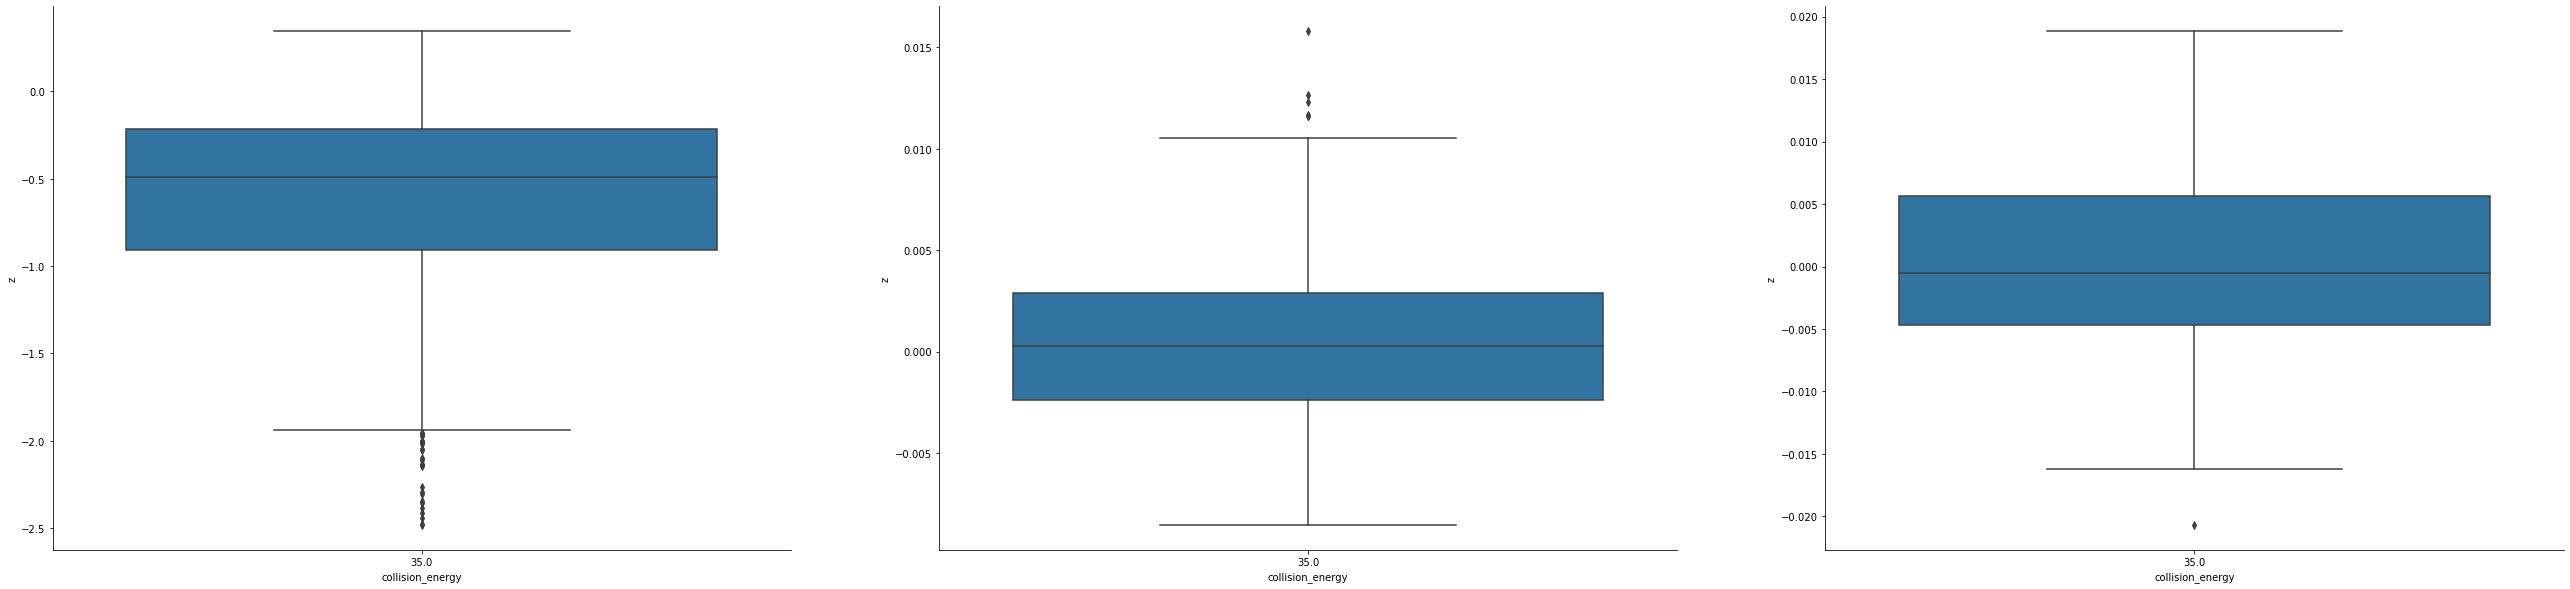

total_exact_mass
r^2 0.03207329886647525
RMSE 0.5012284237018838
explained variance 0.0320732082425621
Pearson -0.17909022770976166
Spearman -0.24116789294759985
-----------------
r^2 0.13361926016010783
RMSE 0.003197601469534873
explained variance 0.1336192437472783
Pearson 0.3655396779952199
Spearman 0.35877458181335786
-----------------
r^2 0.03796821470932732
RMSE 0.006186475423576089
explained variance 0.037968168139782765
Pearson -0.19485434262812815
Spearman -0.2013021004436663
-----------------


<Figure size 432x288 with 0 Axes>

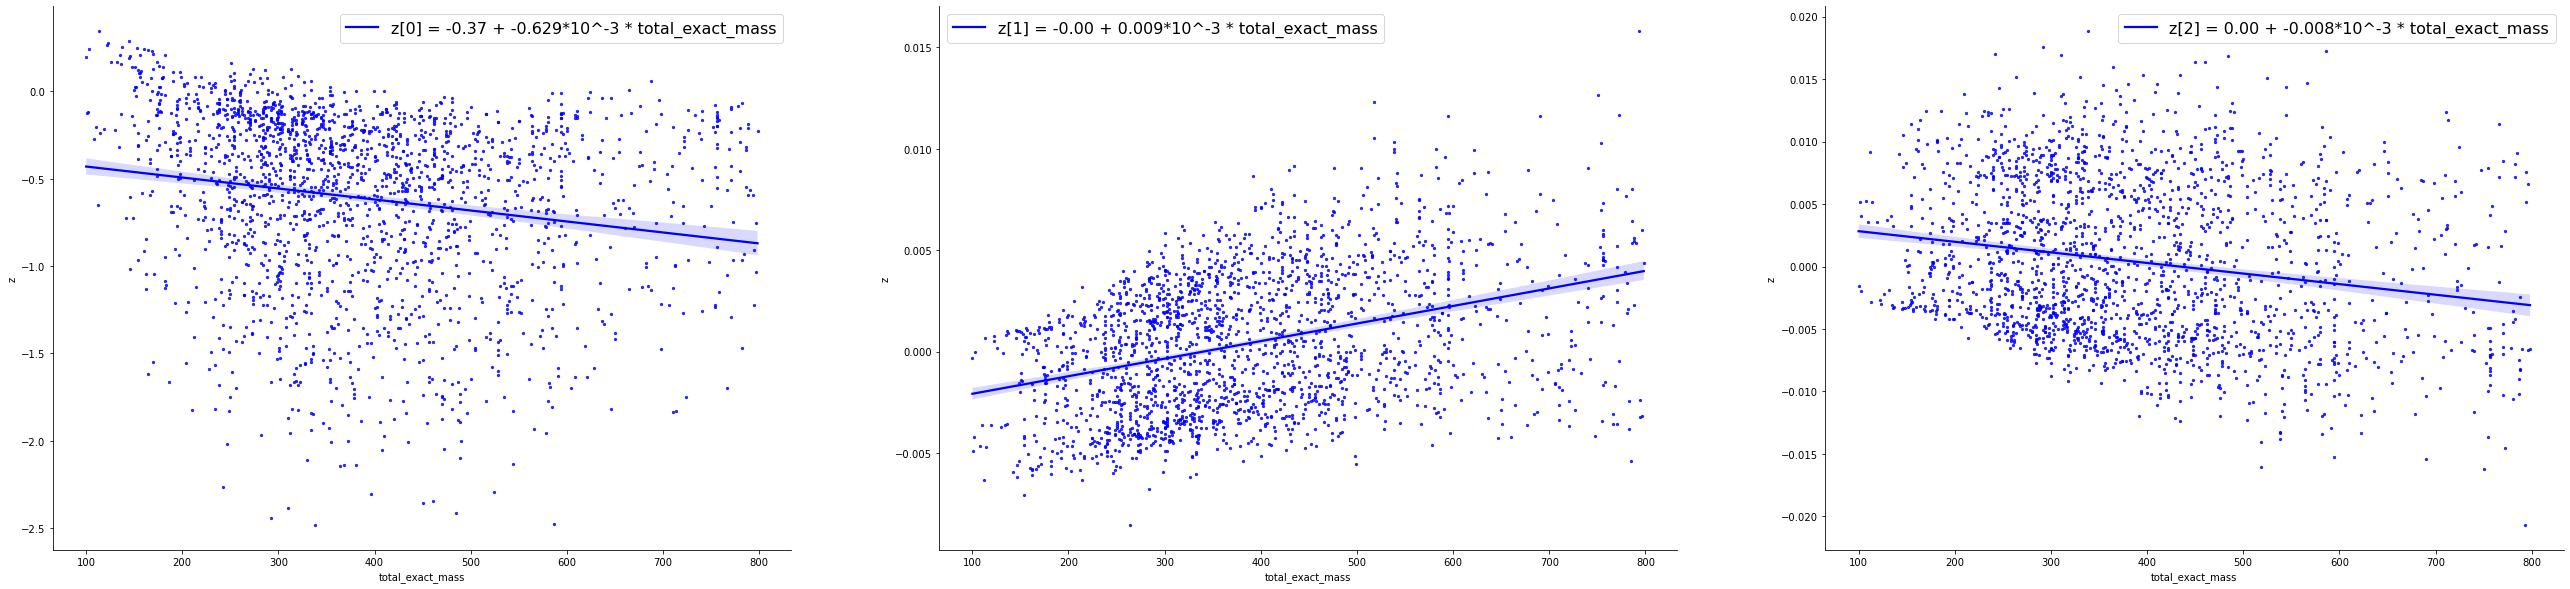

-------------------------------------------
d:\Workspace\SpecVAE\.model\MoNA\betavae_capacity_nextron\factorvae_score\betavae_capacity_100-100-90-50-3-50-90-100-100_01 (24-12-2021_09-48-37)
Encode N=2020 instances from MoNA dataset...
torch.Size([2020, 3])
collision_energy
r^2 -5.20971266126935e-10
RMSE 0.4724469569588173
explained variance 2.4688966981933902e-08
Pearson nan
Spearman nan
-----------------
r^2 -1.9337067502789296e-09
RMSE 0.615774836518459
explained variance -1.598906340660733e-08
Pearson nan
Spearman nan
-----------------
r^2 -4.030078493144629e-09
RMSE 0.849190913355075
explained variance -3.027930839394344e-08
Pearson nan
Spearman nan
-----------------


d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:187: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double

<Figure size 432x288 with 0 Axes>

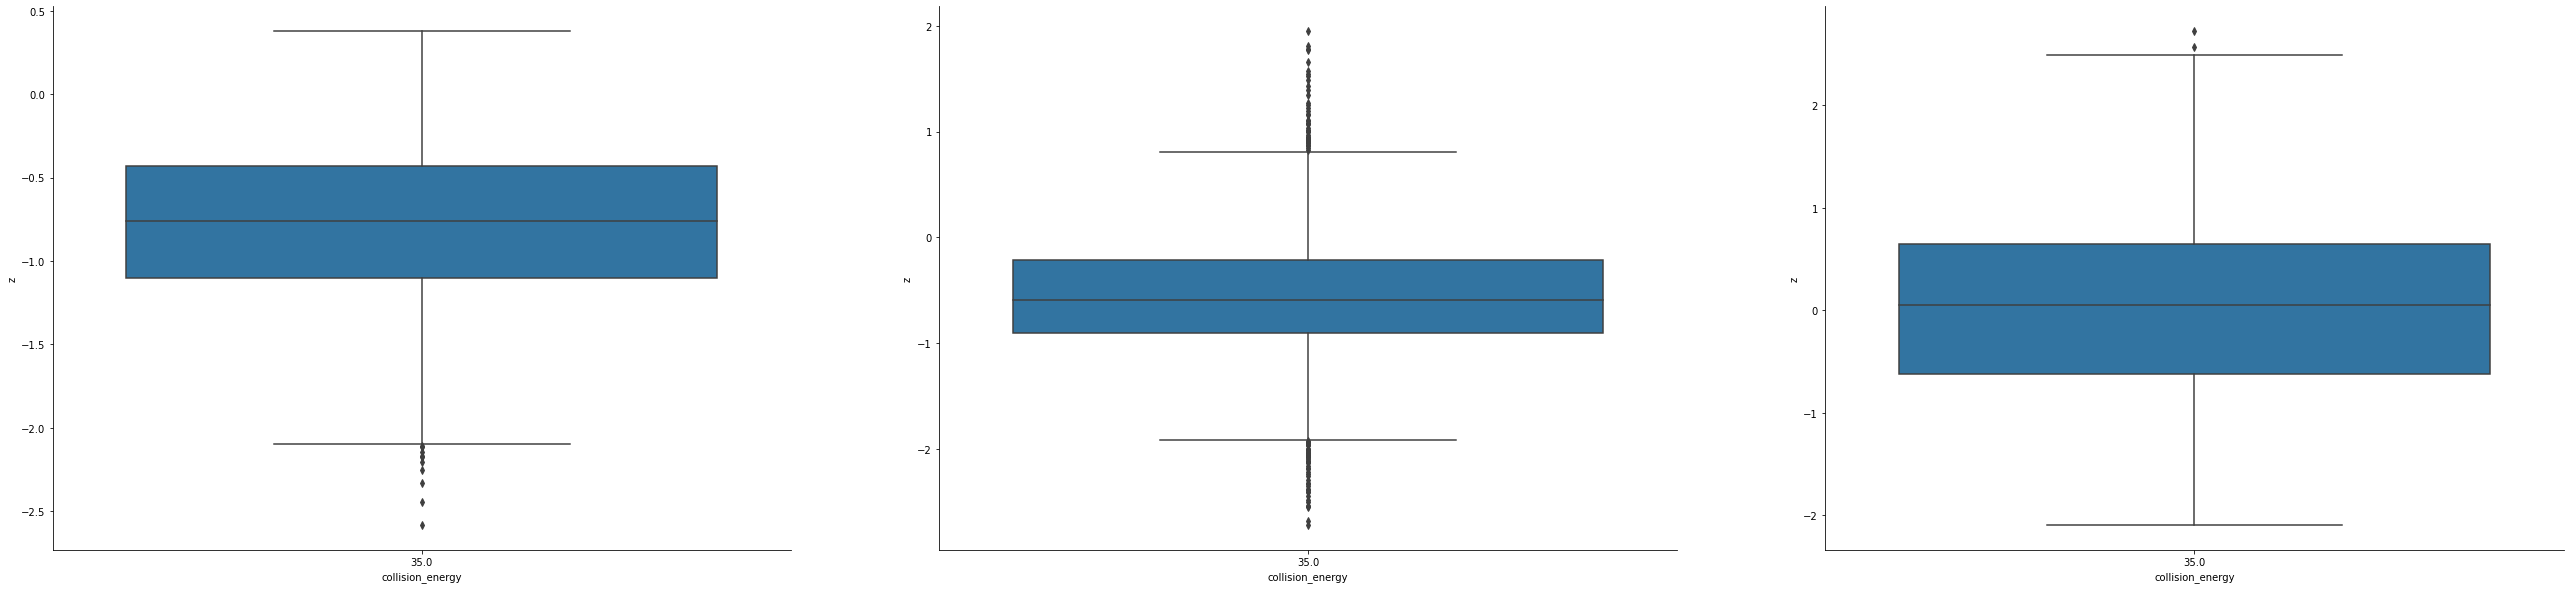

total_exact_mass
r^2 0.12815104968161728
RMSE 0.44113719810275603
explained variance 0.12815107166087558
Pearson -0.35798191314063016
Spearman -0.39717518384377176
-----------------
r^2 0.024207090496919603
RMSE 0.6082761187947601
explained variance 0.024207076781802228
Pearson 0.15558628597603627
Spearman 0.20276606287620347
-----------------
r^2 0.007587582916154467
RMSE 0.845963123981879
explained variance 0.007587556866092804
Pearson -0.0871067558554117
Spearman -0.0684668240385073
-----------------


<Figure size 432x288 with 0 Axes>

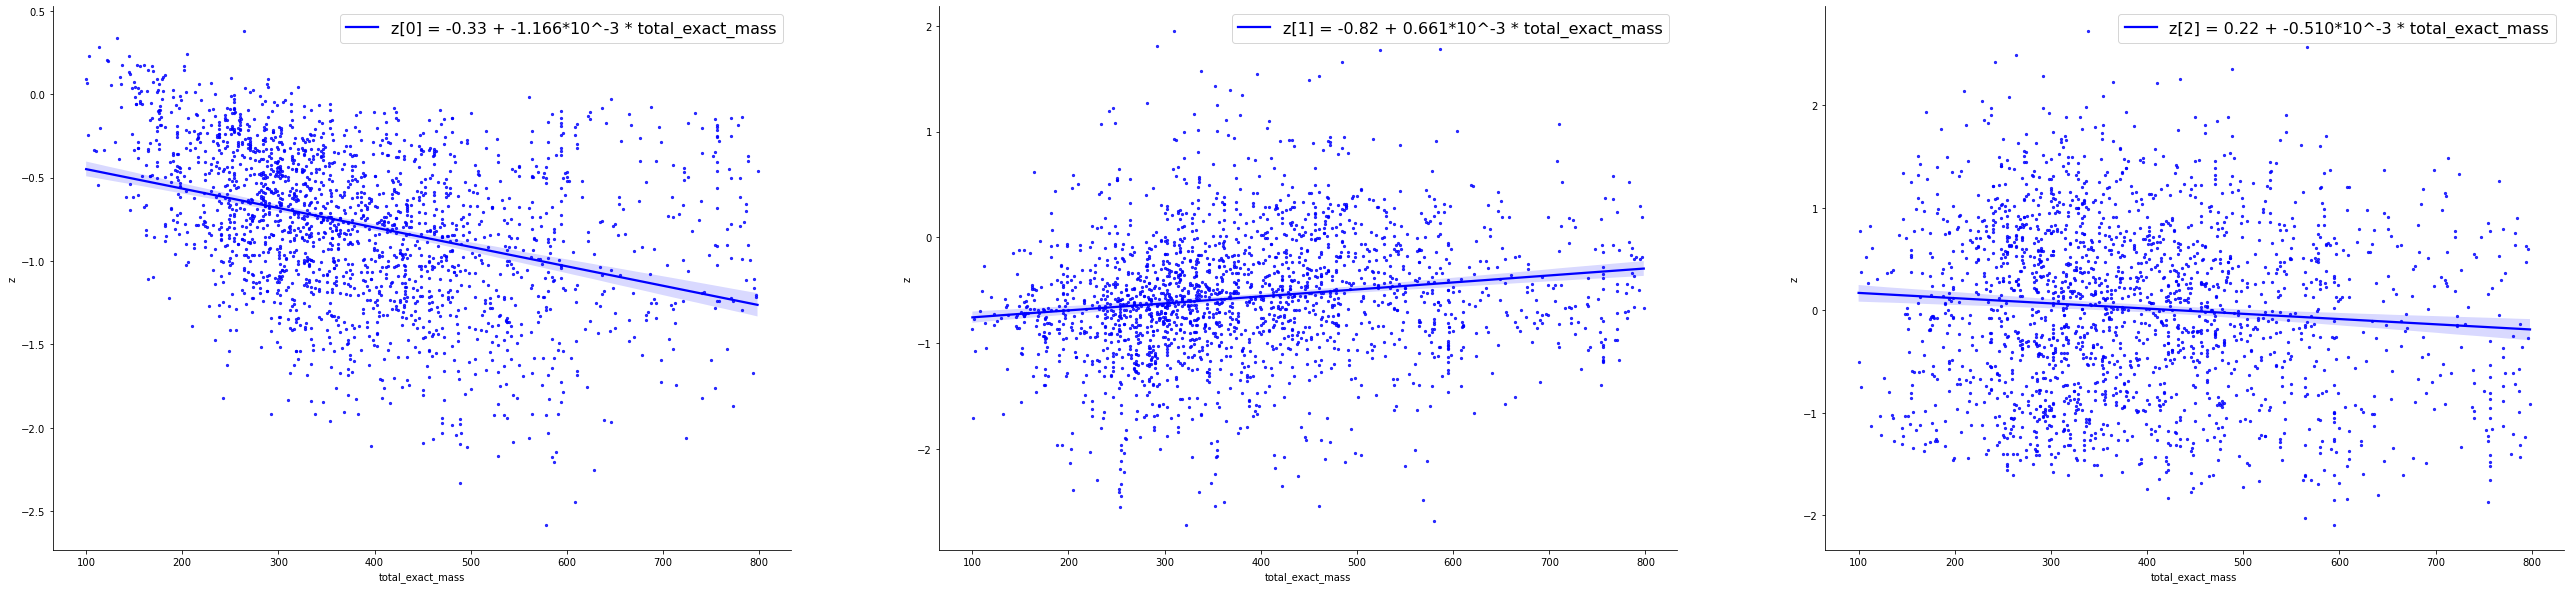

-------------------------------------------
d:\Workspace\SpecVAE\.model\MoNA\betavae_capacity_nextron\factorvae_score\betavae_capacity_100-1600-100-3-1600-100_02 (24-12-2021_10-51-41)
Encode N=2020 instances from MoNA dataset...
torch.Size([2020, 3])
collision_energy
r^2 5.123414248409119e-09
RMSE 0.41132537063043734
explained variance -8.682255359104829e-09
Pearson nan
Spearman nan
-----------------
r^2 4.747906734436924e-09
RMSE 0.9727648198862009
explained variance 2.6120321461320373e-08
Pearson nan
Spearman nan
-----------------
r^2 -3.585601193734078e-08
RMSE 0.4237430480348816
explained variance -7.149246084026117e-08
Pearson nan
Spearman nan
-----------------


d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:187: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double

<Figure size 432x288 with 0 Axes>

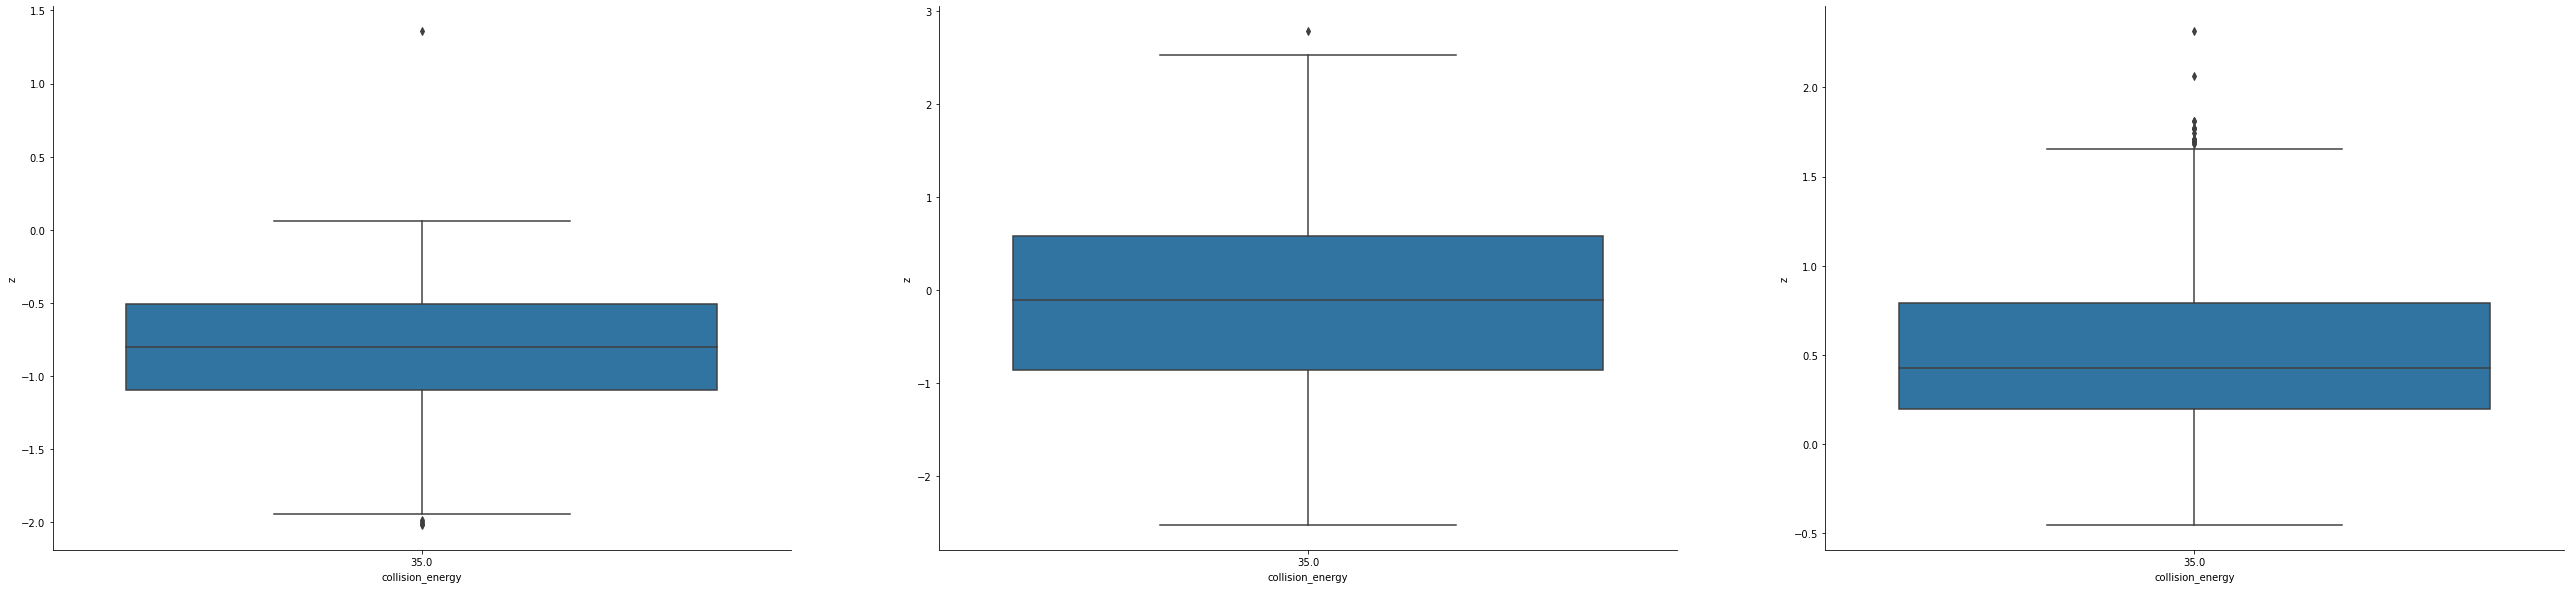

total_exact_mass
r^2 0.01715959543095691
RMSE 0.4077810124638873
explained variance 0.017159581862186912
Pearson 0.1309946197195081
Spearman 0.1354866714822288
-----------------
r^2 0.017357229866493462
RMSE 0.9642856159392219
explained variance 0.017357250867942375
Pearson 0.1317468223563562
Spearman 0.15204991463504972
-----------------
r^2 0.28738091032545865
RMSE 0.3577101838096063
explained variance 0.28738088493024583
Pearson -0.5360792253735789
Spearman -0.5727386580083541
-----------------


<Figure size 432x288 with 0 Axes>

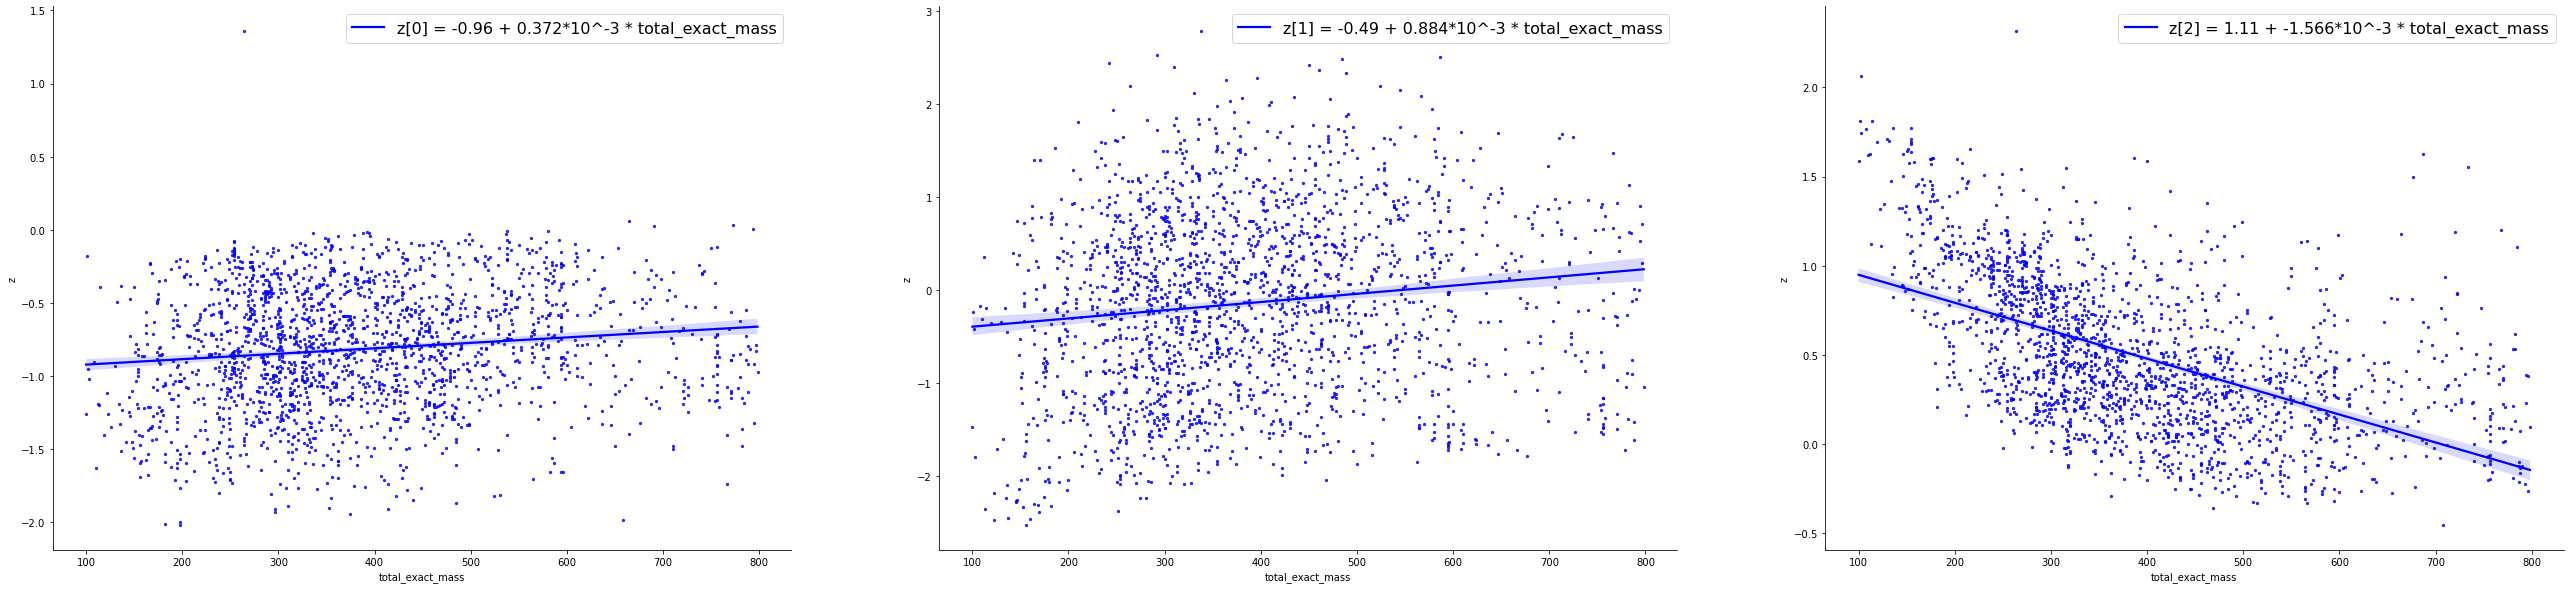

-------------------------------------------
d:\Workspace\SpecVAE\.model\MoNA\betavae_capacity_nextron\factorvae_score\betavae_capacity_100-800-100-3-800-100_03 (24-12-2021_11-16-41)
Encode N=2020 instances from MoNA dataset...
torch.Size([2020, 3])
collision_energy
r^2 6.301411614728636e-10
RMSE 0.9746381904331268
explained variance 4.081098259334226e-08
Pearson nan
Spearman nan
-----------------
r^2 7.410817515207668e-10
RMSE 0.37769938295648314
explained variance -4.1031641417887954e-08
Pearson nan
Spearman nan
-----------------
r^2 -7.569411764052347e-11
RMSE 0.33907888942924735
explained variance -1.703310914535905e-08
Pearson nan
Spearman nan
-----------------


d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:187: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double

<Figure size 432x288 with 0 Axes>

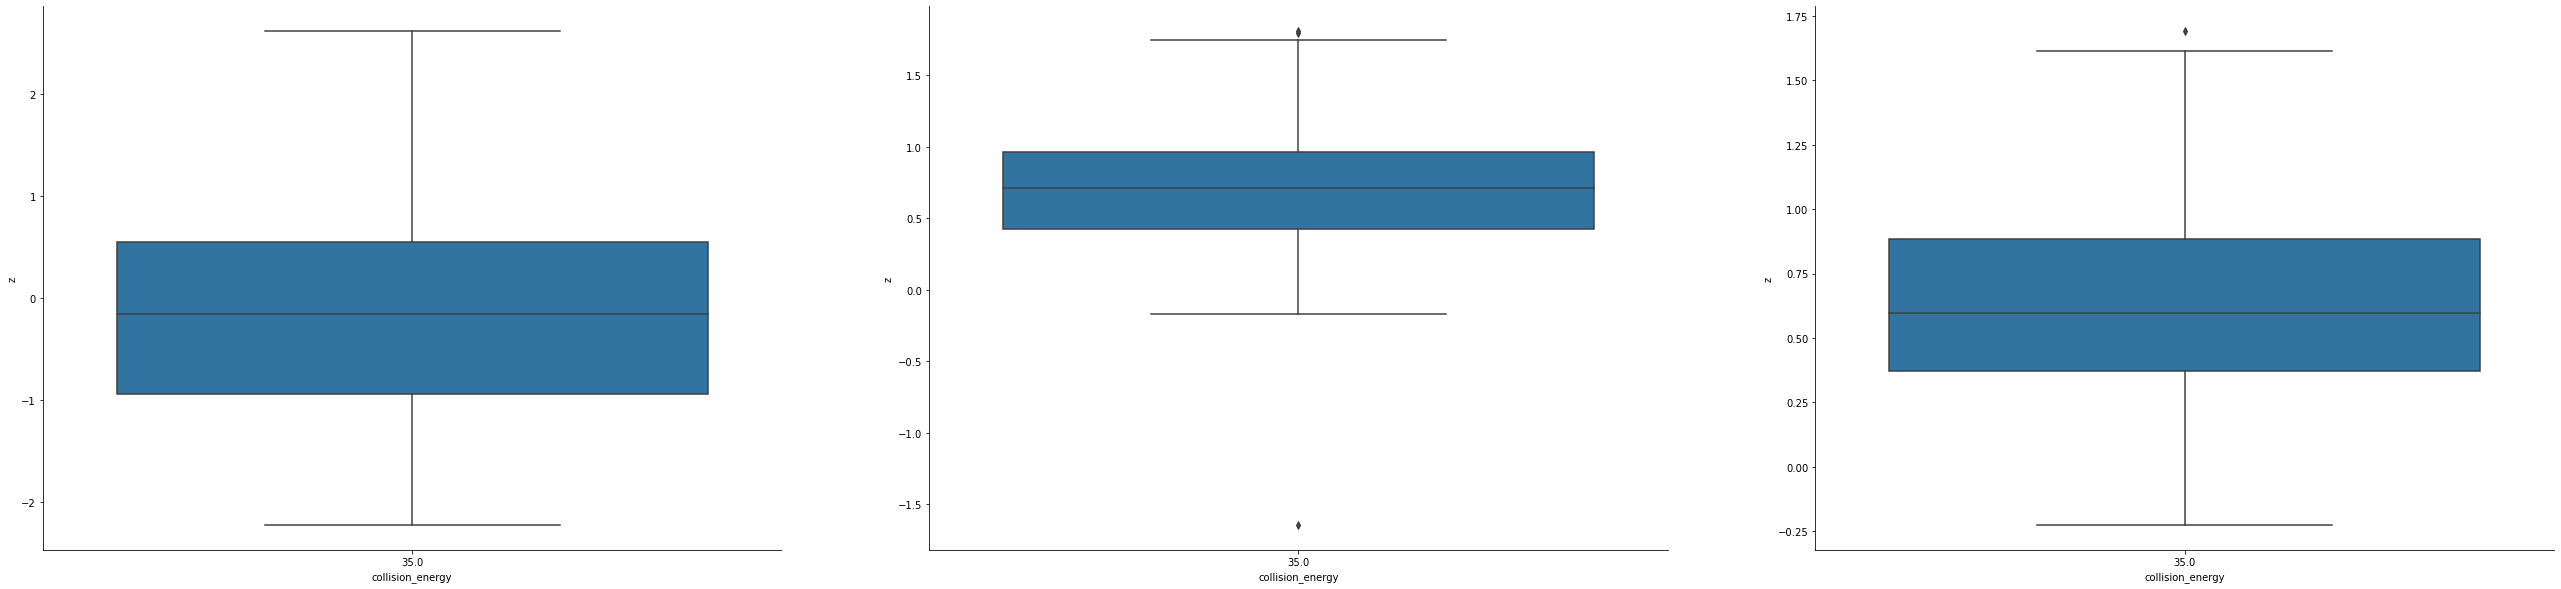

total_exact_mass
r^2 0.015283077065721407
RMSE 0.9671617798242222
explained variance 0.015283116632475946
Pearson 0.12362474042525076
Spearman 0.14893135151226808
-----------------
r^2 0.0050186582630454835
RMSE 0.3767504189021216
explained variance 0.005018616699965284
Pearson -0.07084248390396164
Spearman -0.06820845207757356
-----------------
r^2 0.30554476501036143
RMSE 0.2825679364794657
explained variance 0.30554475323419583
Pearson -0.5527610379385722
Spearman -0.5981218082797555
-----------------


<Figure size 432x288 with 0 Axes>

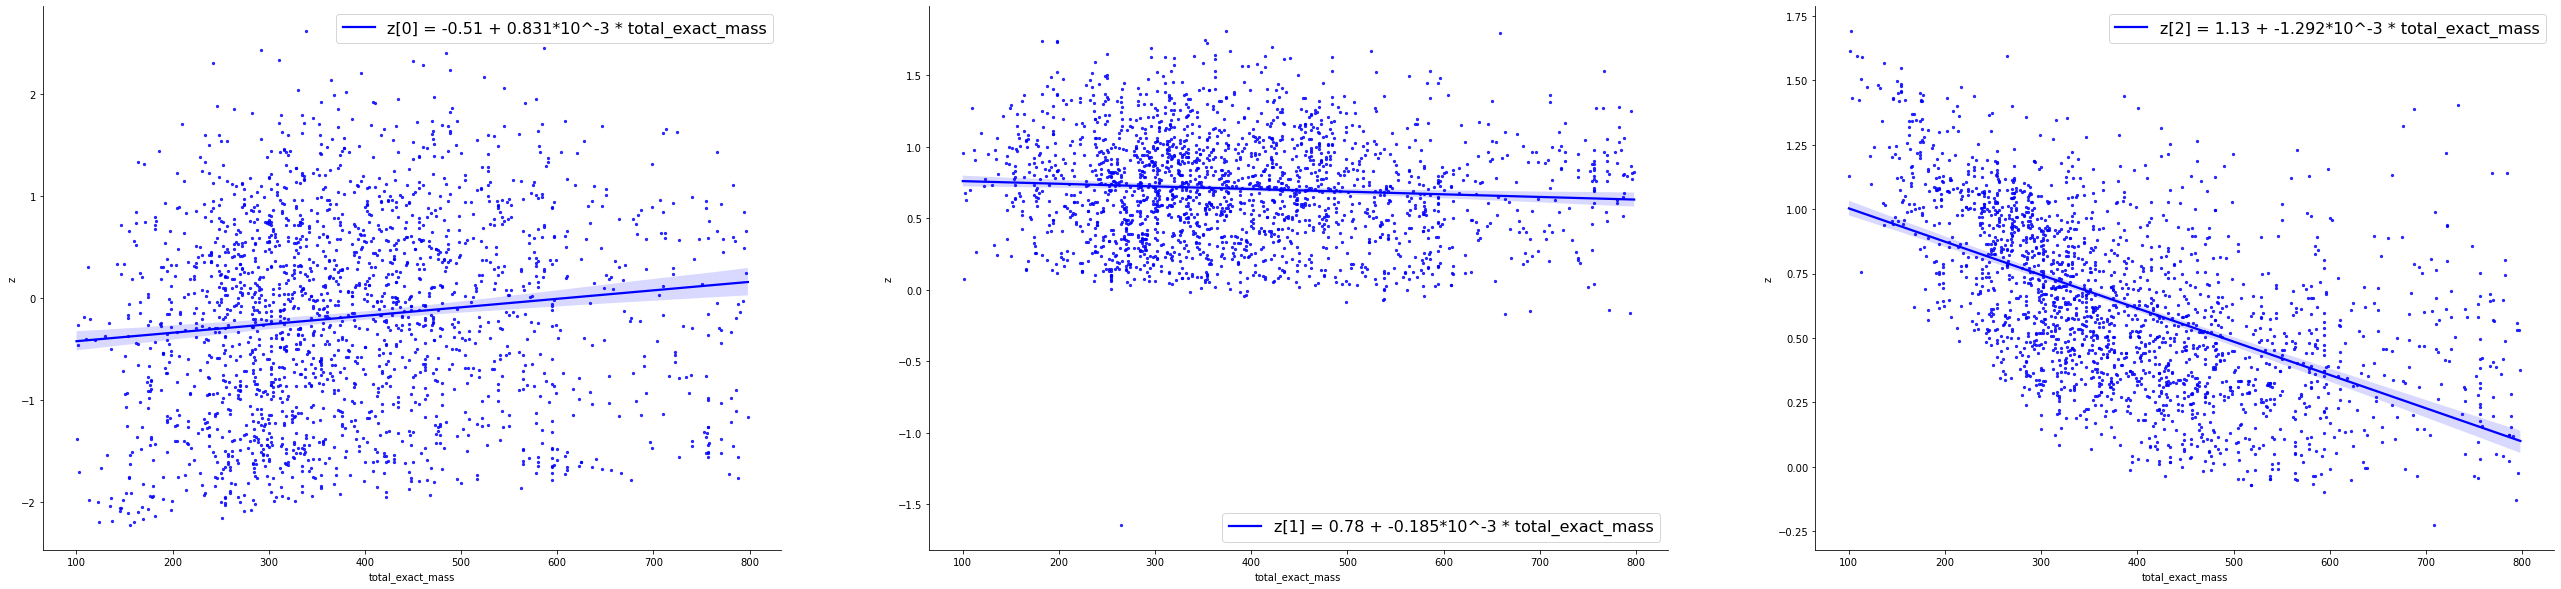

-------------------------------------------
d:\Workspace\SpecVAE\.model\MoNA\betavae_capacity_nextron\factorvae_score\betavae_capacity_100-1600-3-1600-100_04 (24-12-2021_08-02-44)
Encode N=2020 instances from MoNA dataset...
torch.Size([2020, 3])
collision_energy
r^2 -1.7453098966058178e-09
RMSE 0.5006161964004462
explained variance 1.655688131041444e-08
Pearson nan
Spearman nan
-----------------
r^2 9.599339101384885e-10
RMSE 0.7234964015113673
explained variance -1.1952944634074925e-08
Pearson nan
Spearman nan
-----------------
r^2 -1.1465888016815029e-08
RMSE 0.12764011728275243
explained variance 3.986427421498462e-08
Pearson nan
Spearman nan
-----------------


d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:187: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double

<Figure size 432x288 with 0 Axes>

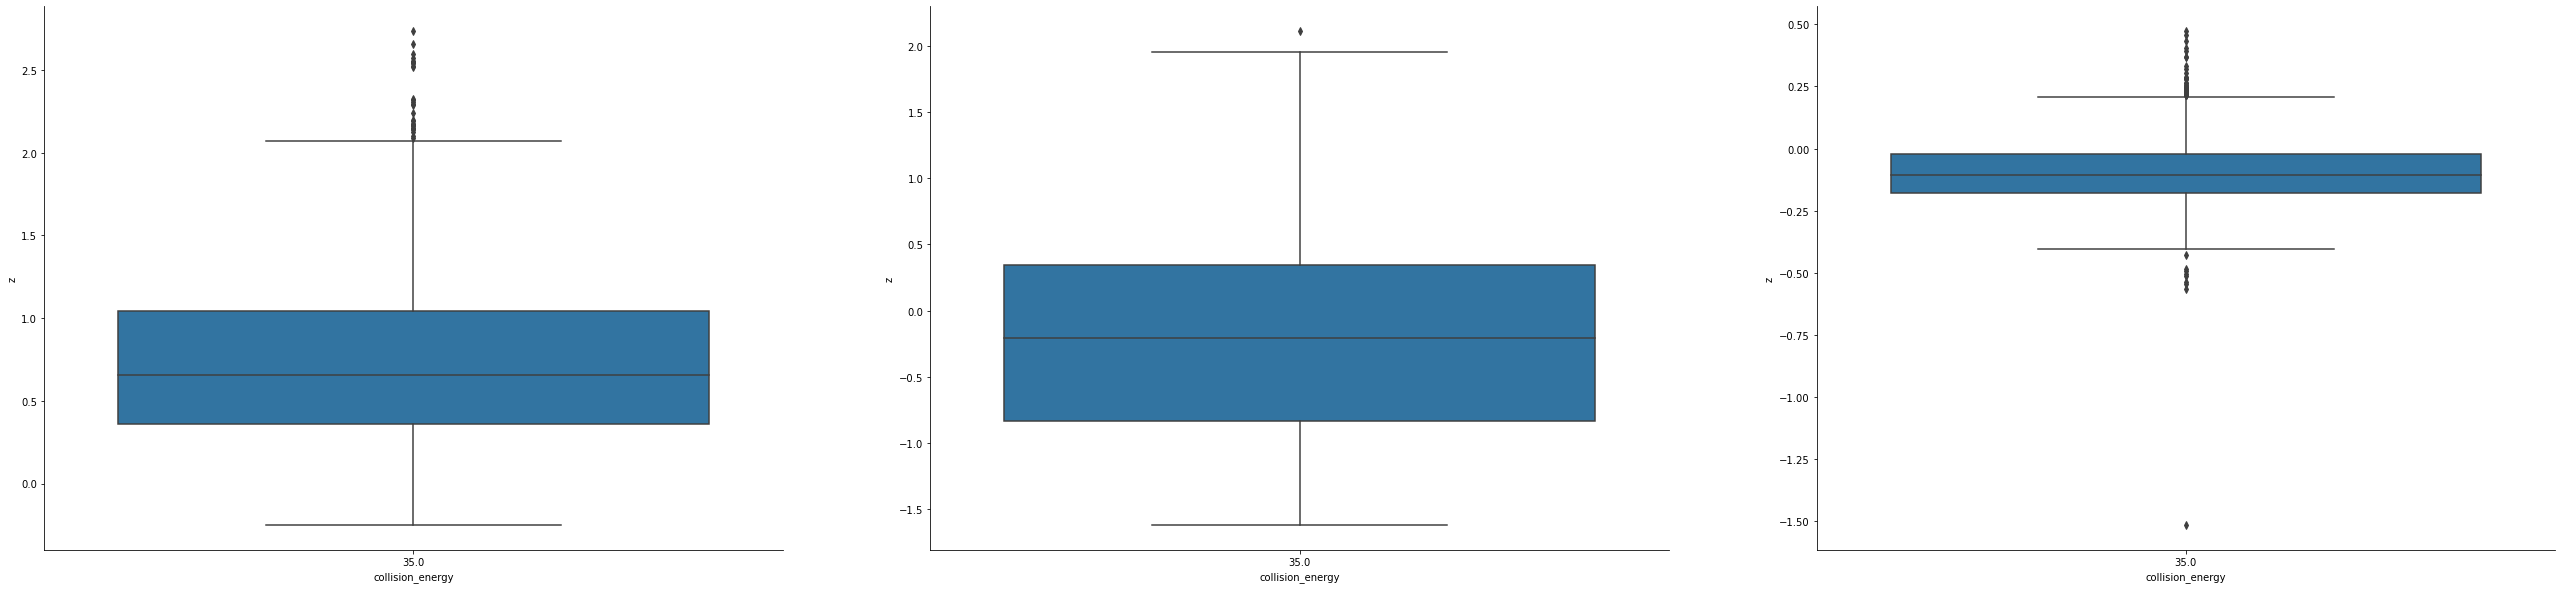

total_exact_mass
r^2 0.06736980109210078
RMSE 0.48345898151588657
explained variance 0.06736981816127707
Pearson 0.25955693541076796
Spearman 0.3106631114079365
-----------------
r^2 0.009686333584385642
RMSE 0.7199838615033309
explained variance 0.009686320796585601
Pearson -0.09841916802000546
Spearman -0.08357250993520207
-----------------
r^2 0.02539156556223887
RMSE 0.12600920594717288
explained variance 0.025391615589047345
Pearson 0.15934734618747126
Spearman 0.19950869618109882
-----------------


<Figure size 432x288 with 0 Axes>

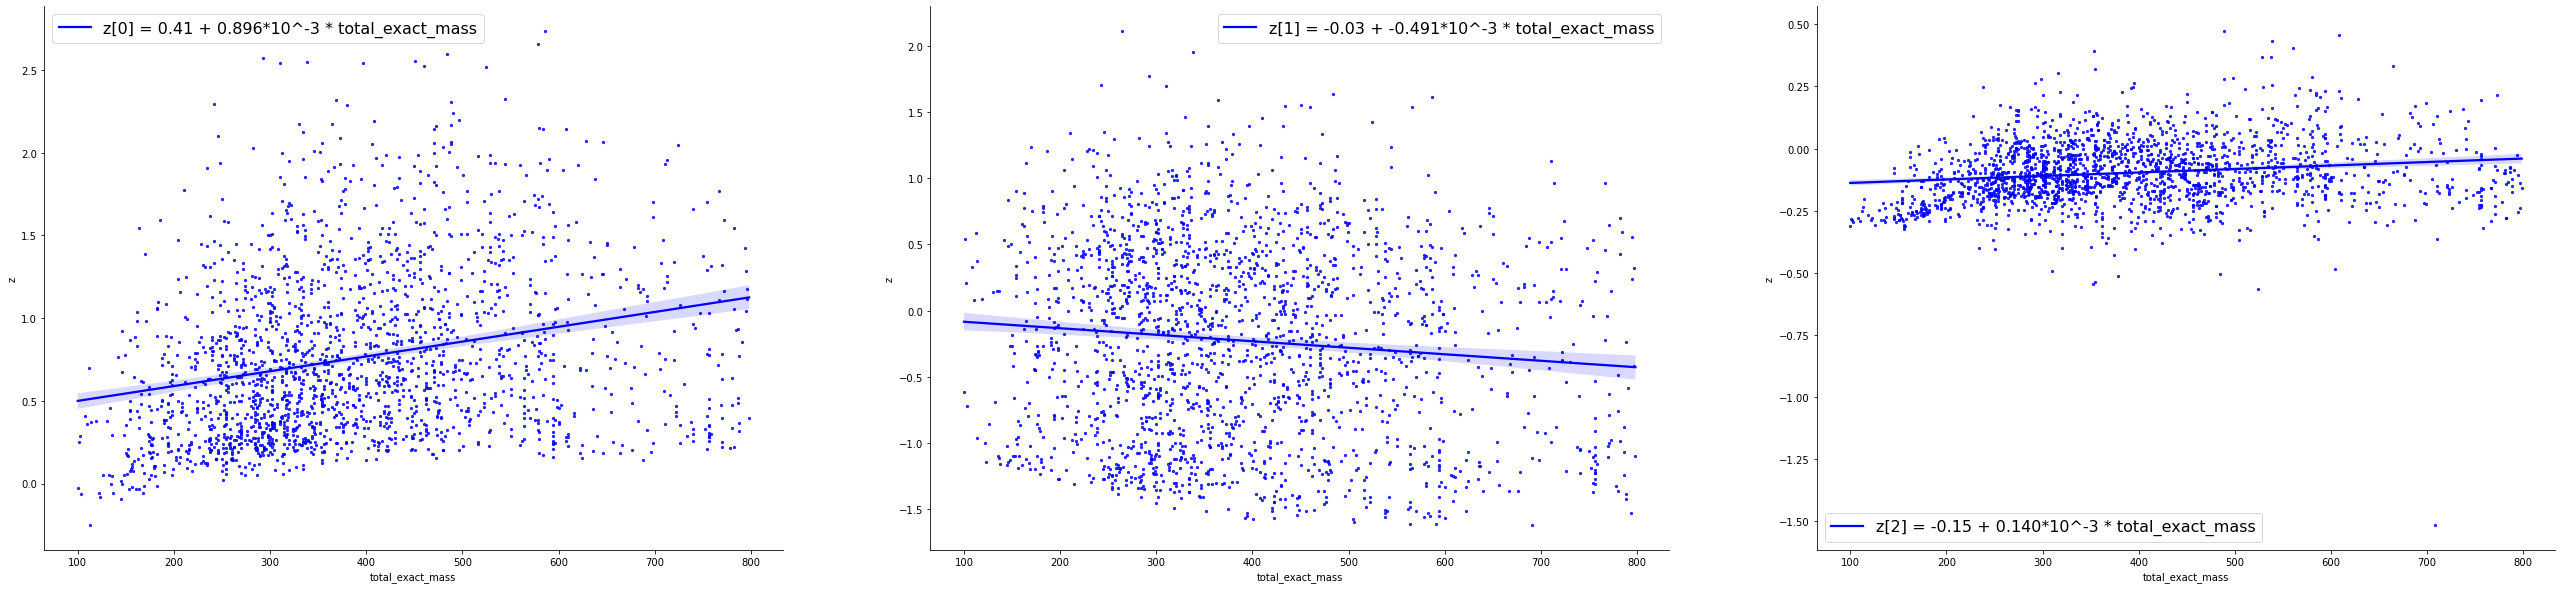

-------------------------------------------
d:\Workspace\SpecVAE\.model\MoNA\betavae_capacity_nextron\factorvae_score\betavae_capacity_100-400-200-50-3-50-200-400-100_05 (24-12-2021_09-23-23)
Encode N=2020 instances from MoNA dataset...
torch.Size([2020, 3])
collision_energy
r^2 8.990671540587414e-10
RMSE 0.5128058516418403
explained variance 3.8086960141292536e-08
Pearson nan
Spearman nan
-----------------
r^2 3.9121729189517396e-09
RMSE 0.26405269223919775
explained variance -3.015199090405929e-08
Pearson nan
Spearman nan
-----------------
r^2 6.236624550126635e-10
RMSE 0.013102170589854358
explained variance -6.489591641845038e-08
Pearson nan
Spearman nan
-----------------


d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:187: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double

<Figure size 432x288 with 0 Axes>

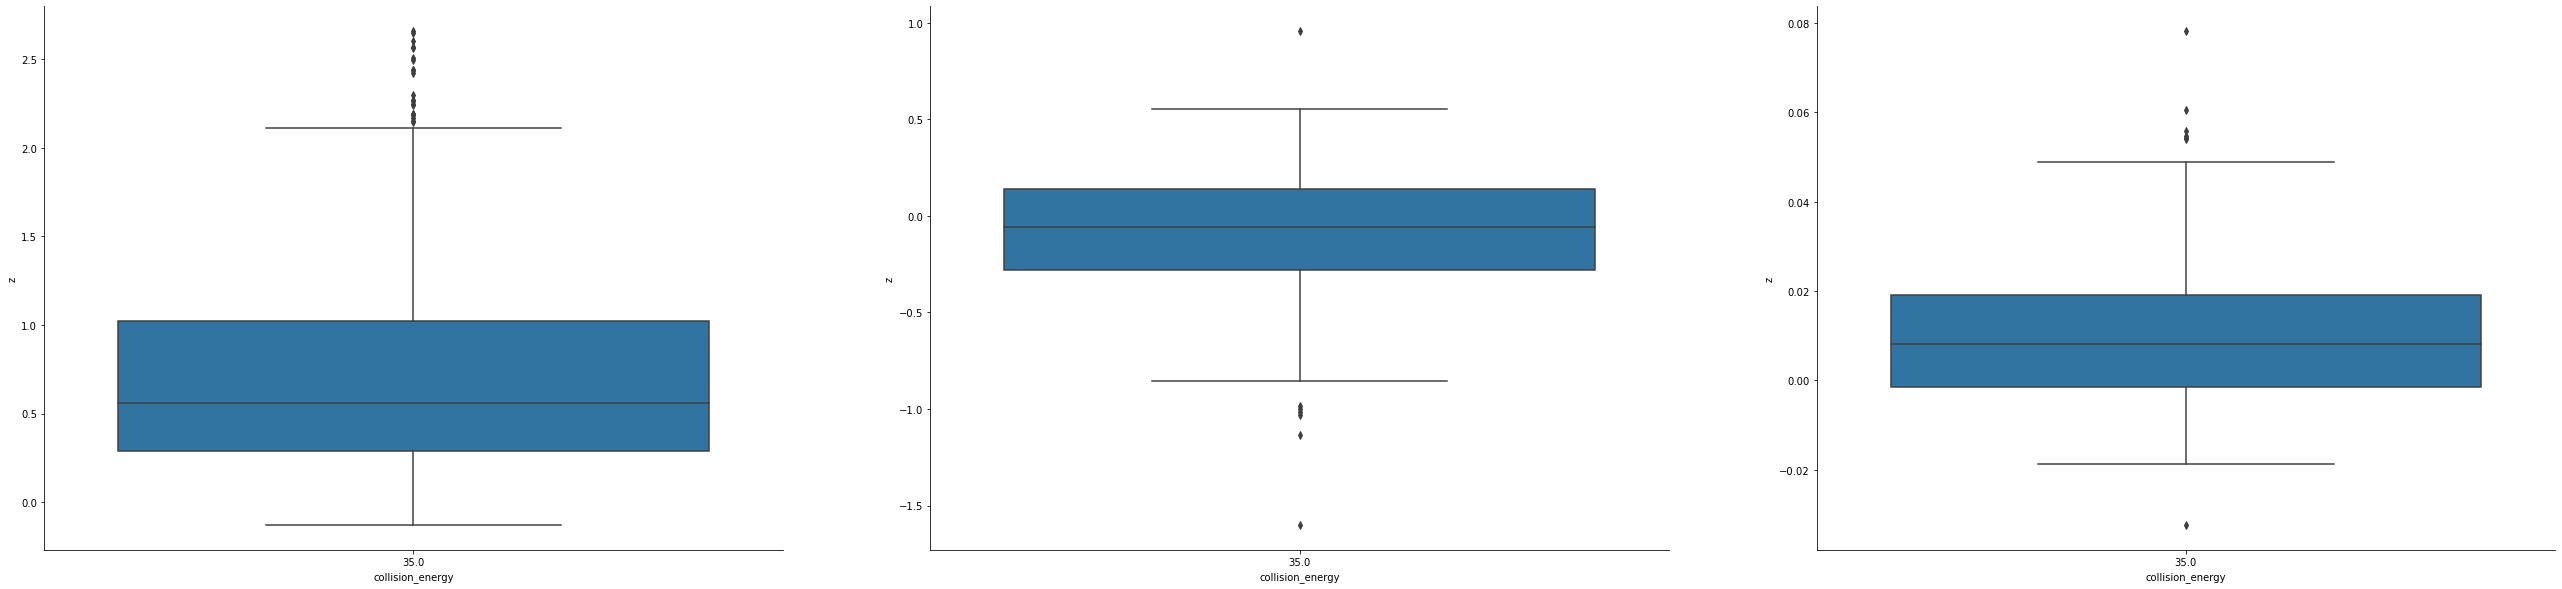

total_exact_mass
r^2 0.024235026295944984
RMSE 0.5065538082825439
explained variance 0.024235062582588562
Pearson 0.15567602711614495
Spearman 0.21905765055187884
-----------------
r^2 0.11298634142220476
RMSE 0.24868852950125772
explained variance 0.11298631120682623
Pearson -0.3361344045944331
Spearman -0.32781771998892
-----------------
r^2 0.12673842622031206
RMSE 0.01224377739070846
explained variance 0.12673836900458135
Pearson 0.3560034068315801
Spearman 0.35238986802738514
-----------------


<Figure size 432x288 with 0 Axes>

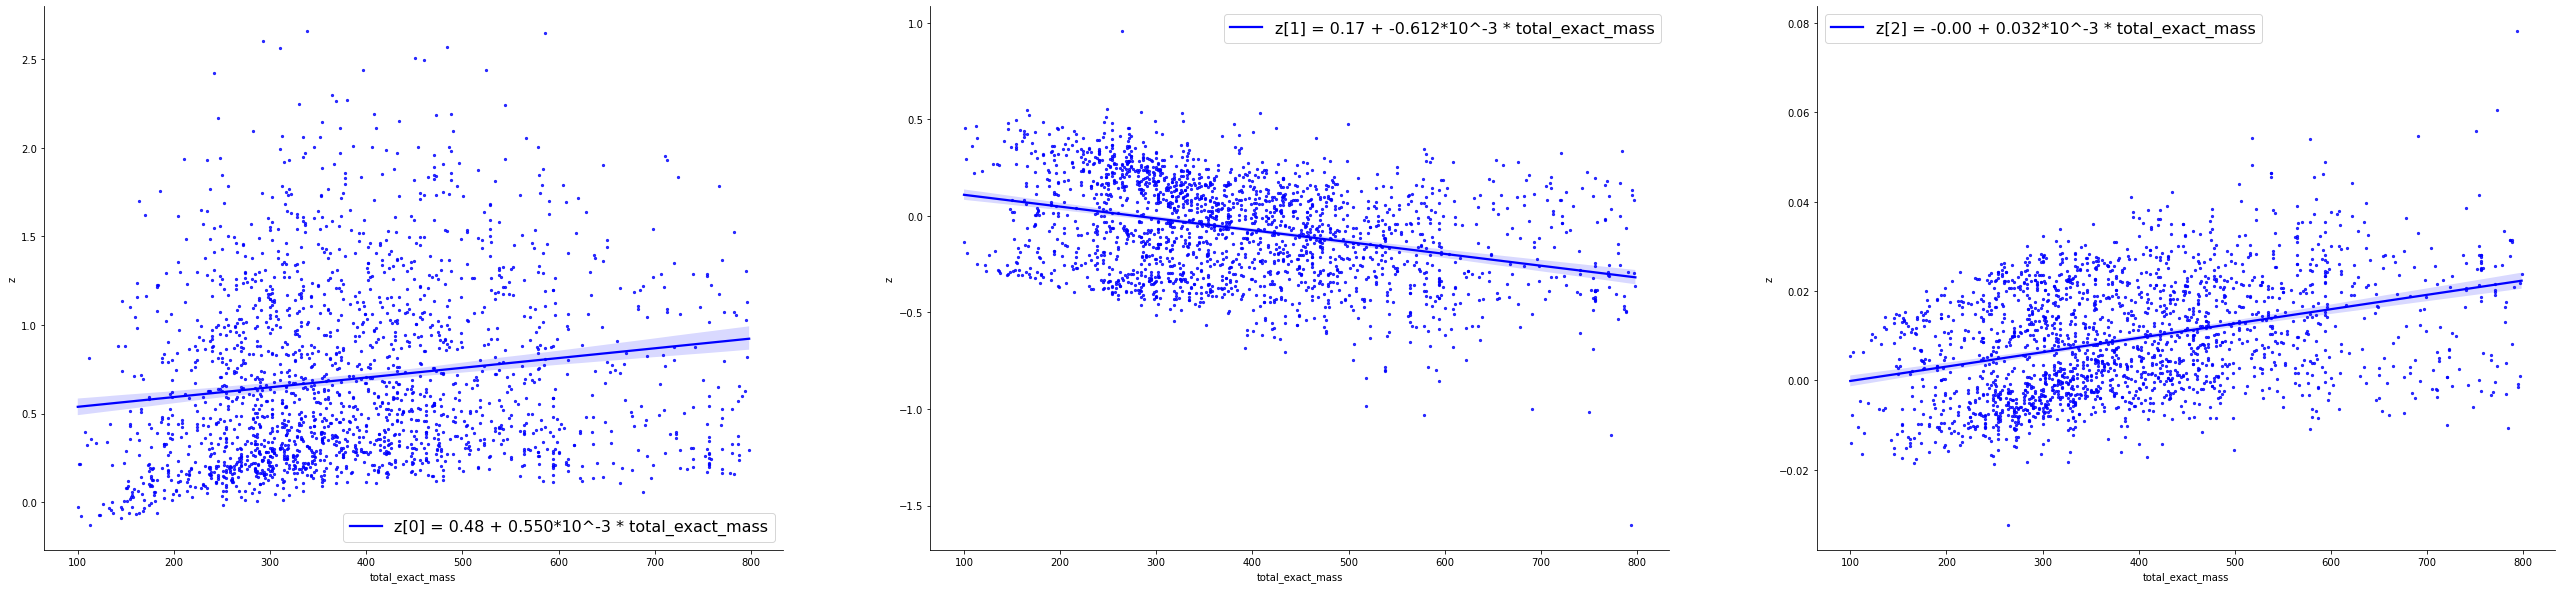

-------------------------------------------
d:\Workspace\SpecVAE\.model\MoNA\betavae_capacity_nextron\factorvae_score\betavae_capacity_100-1600-100-3-100-1600-100_06 (24-12-2021_08-25-38)
Encode N=2020 instances from MoNA dataset...
torch.Size([2020, 3])
collision_energy
r^2 -6.195821633525611e-11
RMSE 0.004197744664064381
explained variance 6.943339481146893e-08
Pearson nan
Spearman nan
-----------------
r^2 -1.3763146178291663e-10
RMSE 0.0017403750564796703
explained variance 3.371977908006585e-08
Pearson nan
Spearman nan
-----------------
r^2 6.650752171211138e-10
RMSE 0.5023463853625675
explained variance -4.285004640003365e-08
Pearson nan
Spearman nan
-----------------


d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:187: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
d:\Workspace\anaconda3\envs\specvae\lib\site-packages\scipy\stats\_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double

<Figure size 432x288 with 0 Axes>

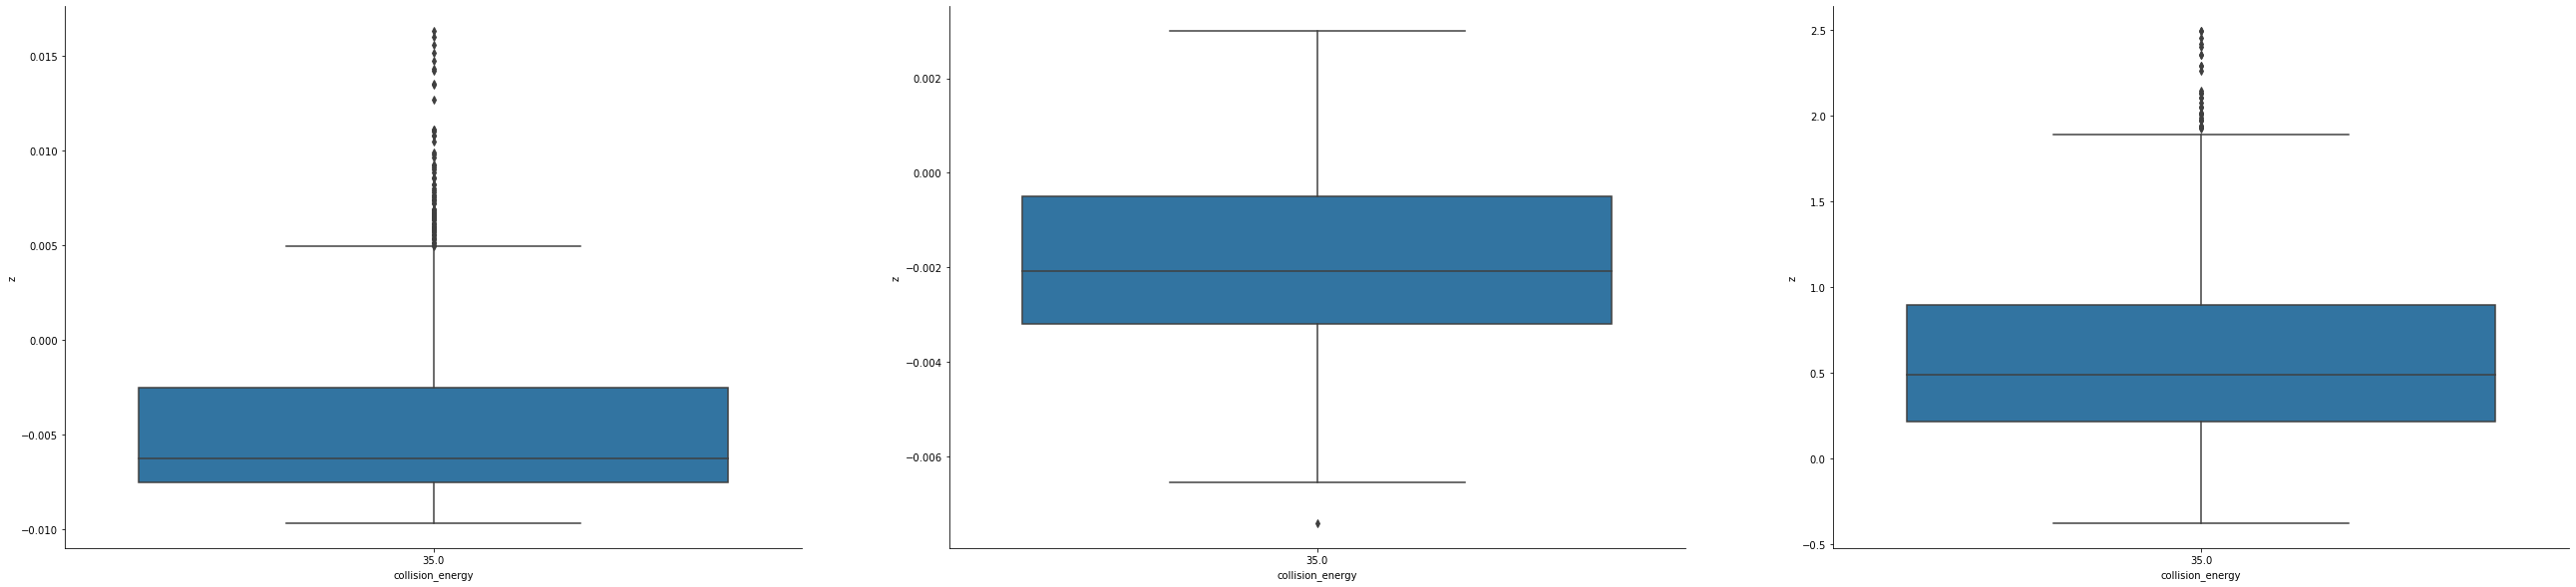

total_exact_mass
r^2 3.390201066089116e-05
RMSE 0.004197673507339072
explained variance 3.397150365791468e-05
Pearson 0.0058225486358624776
Spearman -0.11205902213929267
-----------------
r^2 0.03682908172271515
RMSE 0.0017080262101678582
explained variance 0.03682911433318836
Pearson -0.1919090457880443
Spearman -0.214074088891931
-----------------
r^2 0.03420322494999406
RMSE 0.49368070912115947
explained variance 0.03420318292322999
Pearson 0.18494113741314172
Spearman 0.2470306792530434
-----------------


<Figure size 432x288 with 0 Axes>

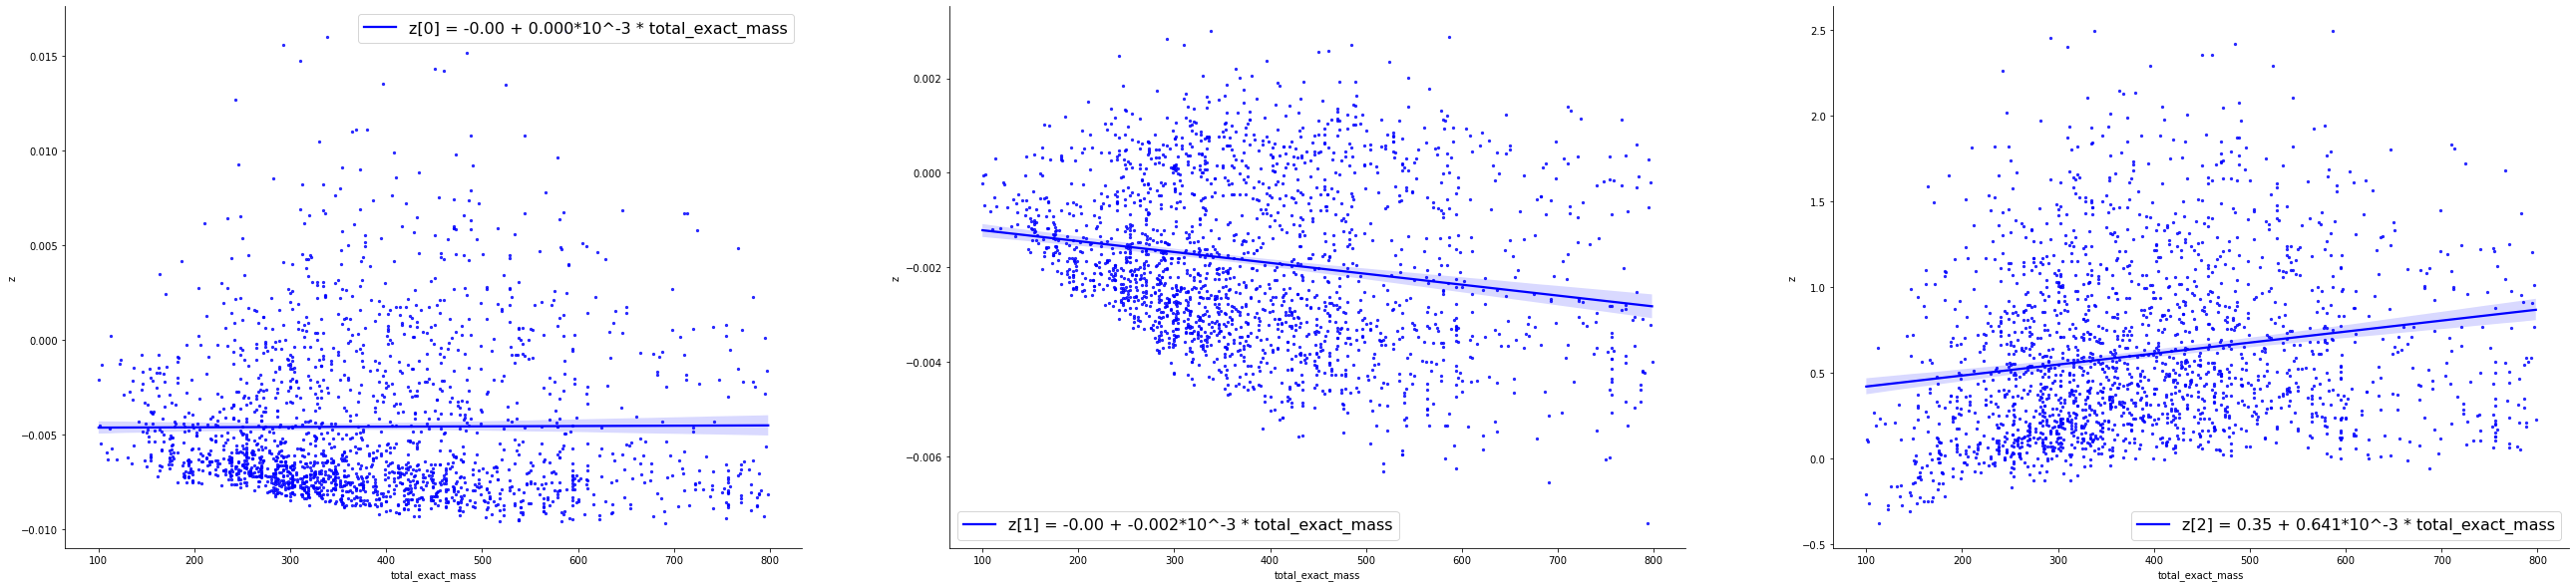

<Figure size 432x288 with 0 Axes>

In [286]:
from scipy import stats
from specvae.jointvae import JointVAE
from specvae.vae import SpecVEA
# cc = model.config['cont_capacity']
# cols, vals = ['model_name', 'min_capacity', 'max_capacity', 'num_iter', 'gamma_z'], [model_name] + cc

from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression


for model_path in model_dirs:
    print("-------------------------------------------")
    print(model_path)

    model = load_model(model_path, device)
    data = preload_data_as_tensor(df, input_columns=model.config['input_columns'], types=model.config['types'], transform=model.transform)
    data_np = evaluate_model(model, df, data)

    for target_column in labels:
        print(target_column)

        if isinstance(model, SpecVEA):
            n_dim = data_np['z'].shape[1]
        elif isinstance(model, JointVAE):
            n_dim = model.config['latent_spec']['cont']

        def plot_reg(df, ax, data_np, dim=0):
            df['z'] = data_np['z'][:,dim]
            slope, intercept, r_value, p_value, std_err = stats.linregress(df[target_column], df['z'])

            x, y = df[target_column].to_numpy().reshape(-1,1), df['z'].to_numpy().reshape(-1,1)
            reg = LinearRegression().fit(x, y)
            y_ = reg.predict(x)
            r2_value = r2_score(y, y_)
            rmse_value = mean_squared_error(y, y_, squared=False)
            exp_variance_value = explained_variance_score(y, y_)
            pearson_value, pp = stats.pearsonr(df[target_column], df['z'])
            spearman_value, sp = stats.spearmanr(df[target_column], df['z'])

            print("r^2", r2_value)
            print("RMSE", rmse_value)
            print("explained variance", exp_variance_value)
            print("Pearson", pearson_value)
            print("Spearman", spearman_value)
            print("-----------------")
            
            # cols.append('%s_dim%d_slope' % (target_column, dim))
            # vals.append(slope)
            # cols.append('%s_dim%d_std' % (target_column, dim))
            # vals.append(std_err)

            if target_column == 'collision_energy':
                sns.boxplot(x=target_column, y='z', data=df, ax=ax)
            else:
                sns.regplot(x=target_column, y='z',
                    data=df, color='blue', scatter_kws={'s': 5}, ax=ax,
                    line_kws={'label':"z[{0}] = {1:.2f} + {2:.3f}*10^-3 * {3}".format(dim, intercept, slope * 1000., target_column)})
                ax.legend(fontsize=16)
        
        fig, axs = plt.subplots(1, n_dim, figsize=(15 * n_dim, 10))
        if n_dim == 1:
            plot_reg(df, axs, data_np, 0)
        else:
            for dim, ax in enumerate(axs):
                plot_reg(df, ax, data_np, dim)

        sns.despine(right = True)
        plt.show()
        plt.clf()


In [287]:
# df2 = pd.DataFrame([vals], columns=cols)
# df2

In [288]:
# stats_file = "d:\\Workspace\\SpecVAE\\.model\\MoNA\\joint_vae_%d_stats.csv" % n_dim
# if os.path.exists(stats_file):
#     df = pd.read_csv(stats_file, index_col=0)
#     df = pd.concat([df, df2], ignore_index=True)
#     df.to_csv(stats_file)
# else:
#     df2.to_csv(stats_file)